# Import Library
import library yang dibutuhkan terlebih dahulu untuk pengolahan dan visualisasi data.

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Observation
Upload dataset yang akan digunakan dan observasi.

In [4]:
df = pd.read_csv('train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning
## 1. Melihat jumlah data null pada dataset

In [6]:
print(df.isna().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<div style="text-align: justify"> Dapat terlihat beberapa kolom memiliki nilai NA yang memiliki makna, seperti kolom Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, dan MiscFeature. Kolom ini tidak perlu dihapus dan tidak perlu di-<i>imputing</i>.<p><p>
    
 
<div style="text-align: justify">Beberapa kolom memiliki nilai NA yang berarti <i>missing values</i> seperti LotFrontage, Electrical, dan GarageYrBlt. Kolom-kolom tersebut harus di-<i>imputing</i>. Kasus khusus mengenai ada 81 observasi yang memiliki data NA pada kolom GarageType yang berarti "tidak memiliki garage" sedemikian sehingga terdapat <i>missing values</i> pada kolom GarageYrBlt (yang berisi data kapan garasi dibangun) pada observasi yang sama. Maka, kolom ini harus di-<i>imputing</i> dengan menggunakan mean supaya rata-rata data pada kolom tersebut tidak berubah.

## 2. Melihat jumlah data duplikat pada dataset

In [7]:
df.duplicated().sum()

0

## 3. Menghapus kolom ‘ID’ dari DataFrame secara permanen

In [8]:
df.drop('Id', axis=1, inplace=True)

In [9]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

## 4. Deletion
Deletion dilakukan pada observasi dengan nilai NaN yang sedikit pada suatu kolom, yaitu pada kolom Electrical, MasVnrType, dan MasVnrArea

In [10]:
df[df['Electrical'].isna()]
df[df['MasVnrType'].isna()]
df[df['MasVnrArea'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234           60       RL          NaN     7851   Pave   NaN      Reg   
529           20       RL          NaN    32668   Pave   NaN      IR1   
650           60       FV         65.0     8125   Pave   NaN      Reg   
936           20       RL         67.0    10083   Pave   NaN      Reg   
973           20       FV         95.0    11639   Pave   NaN      Reg   
977          120       FV         35.0     4274   Pave  Pave      IR1   
1243          20       RL        107.0    13891   Pave   NaN      Reg   
1278          60       RL         75.0     9473   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
234          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
529          Lvl    AllPub   CulDSac  ...        0    NaN   NaN         NaN   
650          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
936          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
973          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
977          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1243         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1278         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
234        0      5    2010        WD         Normal     216500  
529        0      3    2007        WD         Alloca     200624  
650        0      5    2008        WD         Normal     205950  
936        0      8    2009        WD         Normal     184900  
973        0     12    2008       New        Partial     182000  
977        0     11    2007       New        Partial     199900  
1243       0      9    2006       New        Partial     465000  
1278       0      3    2008        WD         Normal     237000  

[8 rows x 80 columns]

In [11]:
df4 = df.drop([234,529,650,936,973,977,1243,1278],axis=0)

## 5. Membuat kolom MSSubClass menjadi kolom yang berisi data kategorik
Pada kolom MSSubClass, berdasarkan penjelasan data description tugas 2, berisi data kategorik (bukan numerik) sehingga perlu diubah ke kategorik.

In [12]:
df4['MSSubClass'] = df4.MSSubClass.astype('object')
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1452 non-null   object 
 1   MSZoning       1452 non-null   object 
 2   LotFrontage    1195 non-null   float64
 3   LotArea        1452 non-null   int64  
 4   Street         1452 non-null   object 
 5   Alley          90 non-null     object 
 6   LotShape       1452 non-null   object 
 7   LandContour    1452 non-null   object 
 8   Utilities      1452 non-null   object 
 9   LotConfig      1452 non-null   object 
 10  LandSlope      1452 non-null   object 
 11  Neighborhood   1452 non-null   object 
 12  Condition1     1452 non-null   object 
 13  Condition2     1452 non-null   object 
 14  BldgType       1452 non-null   object 
 15  HouseStyle     1452 non-null   object 
 16  OverallQual    1452 non-null   int64  
 17  OverallCond    1452 non-null   int64  
 18  YearBuil

## 6. Memisahkan antara kolom yang berisi data numerik dan berisi data kategorik
Sebelum itu, kita perlu reindex dataframe supaya tidak hancur ketika digabungkan kembali

In [13]:
df6 = df4.reset_index()
df6.drop('index', axis=1, inplace=True)
df6

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            60       RL         65.0     8450   Pave   NaN      Reg   
1            20       RL         80.0     9600   Pave   NaN      Reg   
2            60       RL         68.0    11250   Pave   NaN      IR1   
3            70       RL         60.0     9550   Pave   NaN      IR1   
4            60       RL         84.0    14260   Pave   NaN      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1447         60       RL         62.0     7917   Pave   NaN      Reg   
1448         20       RL         85.0    13175   Pave   NaN      Reg   
1449         70       RL         66.0     9042   Pave   NaN      Reg   
1450         20       RL         68.0     9717   Pave   NaN      Reg   
1451         20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1447         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1448         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1449         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1450         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1451         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1447       0      8    2007        WD         Normal     175000  
1448       0      2    2010        WD         Normal     210000  
1449    2500      5    2010        WD         Normal     266500  
1450       0      4    2010        WD         Normal     142125  
1451       0      6    2008        WD         Normal     147500  

[1452 rows x 80 columns]

### 6.1 Mengambil kolom-kolom numerik
Mengambil kolom-kolom numerik dan mengubahnya menjadi float untuk semua tipe data numerik.

In [14]:
kolom_numerik = df6.select_dtypes(include=['float64','int64'])
kolom_numerik = kolom_numerik.astype('float64')
kolom_numerik

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0   8450.0          7.0          5.0     2003.0        2003.0   
1            80.0   9600.0          6.0          8.0     1976.0        1976.0   
2            68.0  11250.0          7.0          5.0     2001.0        2002.0   
3            60.0   9550.0          7.0          5.0     1915.0        1970.0   
4            84.0  14260.0          8.0          5.0     2000.0        2000.0   
...           ...      ...          ...          ...        ...           ...   
1447         62.0   7917.0          6.0          5.0     1999.0        2000.0   
1448         85.0  13175.0          6.0          6.0     1978.0        1988.0   
1449         66.0   9042.0          7.0          9.0     1941.0        2006.0   
1450         68.0   9717.0          5.0          6.0     1950.0        1996.0   
1451         75.0   9937.0          5.0          6.0     1965.0        1965.0   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0          196.0       706.0         0.0      150.0  ...         0.0   
1            0.0       978.0         0.0      284.0  ...       298.0   
2          162.0       486.0         0.0      434.0  ...         0.0   
3            0.0       216.0         0.0      540.0  ...         0.0   
4          350.0       655.0         0.0      490.0  ...       192.0   
...          ...         ...         ...        ...  ...         ...   
1447         0.0         0.0         0.0      953.0  ...         0.0   
1448       119.0       790.0       163.0      589.0  ...       349.0   
1449         0.0       275.0         0.0      877.0  ...         0.0   
1450         0.0        49.0      1029.0        0.0  ...       366.0   
1451         0.0       830.0       290.0      136.0  ...       736.0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            61.0            0.0        0.0          0.0       0.0      0.0   
1             0.0            0.0        0.0          0.0       0.0      0.0   
2            42.0            0.0        0.0          0.0       0.0      0.0   
3            35.0          272.0        0.0          0.0       0.0      0.0   
4            84.0            0.0        0.0          0.0       0.0      0.0   
...           ...            ...        ...          ...       ...      ...   
1447         40.0            0.0        0.0          0.0       0.0      0.0   
1448          0.0            0.0        0.0          0.0       0.0      0.0   
1449         60.0            0.0        0.0          0.0       0.0   2500.0   
1450          0.0          112.0        0.0          0.0       0.0      0.0   
1451         68.0            0.0        0.0          0.0       0.0      0.0   

      MoSold  YrSold  SalePrice  
0        2.0  2008.0   208500.0  
1        5.0  2007.0   181500.0  
2        9.0  2008.0   223500.0  
3        2.0  2006.0   140000.0  
4       12.0  2008.0   250000.0  
...      ...     ...        ...  
1447     8.0  2007.0   175000.0  
1448     2.0  2010.0   210000.0  
1449     5.0  2010.0   266500.0  
1450     4.0  2010.0   142125.0  
1451     6.0  2008.0   147500.0  

[1452 rows x 36 columns]

### 6.2 Mengambil kolom-kolom kategorik

In [15]:
kolom_kategorik = df6.select_dtypes(include=['object'])
kolom_kategorik

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0            60       RL   Pave   NaN      Reg         Lvl    AllPub   
1            20       RL   Pave   NaN      Reg         Lvl    AllPub   
2            60       RL   Pave   NaN      IR1         Lvl    AllPub   
3            70       RL   Pave   NaN      IR1         Lvl    AllPub   
4            60       RL   Pave   NaN      IR1         Lvl    AllPub   
...         ...      ...    ...   ...      ...         ...       ...   
1447         60       RL   Pave   NaN      Reg         Lvl    AllPub   
1448         20       RL   Pave   NaN      Reg         Lvl    AllPub   
1449         70       RL   Pave   NaN      Reg         Lvl    AllPub   
1450         20       RL   Pave   NaN      Reg         Lvl    AllPub   
1451         20       RL   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... GarageType GarageFinish GarageQual  \
0       Inside       Gtl      CollgCr  ...     Attchd          RFn         TA   
1          FR2       Gtl      Veenker  ...     Attchd          RFn         TA   
2       Inside       Gtl      CollgCr  ...     Attchd          RFn         TA   
3       Corner       Gtl      Crawfor  ...     Detchd          Unf         TA   
4          FR2       Gtl      NoRidge  ...     Attchd          RFn         TA   
...        ...       ...          ...  ...        ...          ...        ...   
1447    Inside       Gtl      Gilbert  ...     Attchd          RFn         TA   
1448    Inside       Gtl       NWAmes  ...     Attchd          Unf         TA   
1449    Inside       Gtl      Crawfor  ...     Attchd          RFn         TA   
1450    Inside       Gtl        NAmes  ...     Attchd          Unf         TA   
1451    Inside       Gtl      Edwards  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1447         TA          Y    NaN    NaN         NaN       WD        Normal  
1448         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1449         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1450         TA          Y    NaN    NaN         NaN       WD        Normal  
1451         TA          Y    NaN    NaN         NaN       WD        Normal  

[1452 rows x 44 columns]

## 7. Encoding kolom-kolom kategorik
### 7.1 Dengan menggunakan Label Encoding
Label Encoding adalah mengubah data yang bersifat kategorik ke numerik dengan syarat data tersebut bersifat hierarkis atau bertingkat sedemikian sehingga dapat diubah menjadi gambar berikut ini
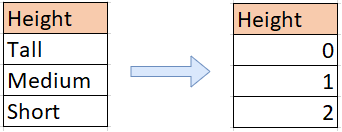
<div style="text-align: justify">Label encoding digunakan untuk kolom-kolom yang memiliki data kategorik yang bersifat hierarkis atau bertingkat. Berdasarkan deskripsi data tugas 2, kolom-kolom yang akan di*encoding* dengan menggunakan Label Encoding adalah LotShape, LandContour, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageCond, PavedDrive, PoolQC, dan Fence.</div>

Panduan : https://vitalflux.com/labelencoder-example-single-multiple-columns/

Dengan menggunakan library sklearn LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
kolom_LE=['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

In [18]:
le = LabelEncoder()
kolom_kategorik[kolom_LE] = kolom_kategorik[kolom_LE].apply(le.fit_transform)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [19]:
kolom_kategorik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1452 non-null   object
 1   MSZoning       1452 non-null   object
 2   Street         1452 non-null   object
 3   Alley          90 non-null     object
 4   LotShape       1452 non-null   int32 
 5   LandContour    1452 non-null   int32 
 6   Utilities      1452 non-null   int32 
 7   LotConfig      1452 non-null   object
 8   LandSlope      1452 non-null   int32 
 9   Neighborhood   1452 non-null   object
 10  Condition1     1452 non-null   object
 11  Condition2     1452 non-null   object
 12  BldgType       1452 non-null   object
 13  HouseStyle     1452 non-null   object
 14  RoofStyle      1452 non-null   object
 15  RoofMatl       1452 non-null   object
 16  Exterior1st    1452 non-null   object
 17  Exterior2nd    1452 non-null   object
 18  MasVnrType     1452 non-null

Mengambil kolom-kolom yang telah diencoding dengan LabelEncoder

In [20]:
LabelEncodedKolom = kolom_kategorik.select_dtypes(include=['int32','int64','float64'])
LabelEncodedKolom = LabelEncodedKolom.astype('float64')
LabelEncodedKolom

LotShape  LandContour  Utilities  LandSlope  ExterQual  ExterCond  \
0          3.0          3.0        0.0        0.0        2.0        4.0   
1          3.0          3.0        0.0        0.0        3.0        4.0   
2          0.0          3.0        0.0        0.0        2.0        4.0   
3          0.0          3.0        0.0        0.0        3.0        4.0   
4          0.0          3.0        0.0        0.0        2.0        4.0   
...        ...          ...        ...        ...        ...        ...   
1447       3.0          3.0        0.0        0.0        3.0        4.0   
1448       3.0          3.0        0.0        0.0        3.0        4.0   
1449       3.0          3.0        0.0        0.0        0.0        2.0   
1450       3.0          3.0        0.0        0.0        3.0        4.0   
1451       3.0          3.0        0.0        0.0        2.0        4.0   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  ...  Electrical  \
0          2.0       3.0           3.0           2.0  ...         4.0   
1          2.0       3.0           1.0           0.0  ...         4.0   
2          2.0       3.0           2.0           2.0  ...         4.0   
3          3.0       1.0           3.0           0.0  ...         4.0   
4          2.0       3.0           0.0           2.0  ...         4.0   
...        ...       ...           ...           ...  ...         ...   
1447       2.0       3.0           3.0           5.0  ...         4.0   
1448       2.0       3.0           3.0           0.0  ...         4.0   
1449       3.0       1.0           3.0           2.0  ...         4.0   
1450       3.0       3.0           2.0           2.0  ...         0.0   
1451       3.0       3.0           3.0           1.0  ...         4.0   

      KitchenQual  Functional  FireplaceQu  GarageFinish  GarageQual  \
0             2.0         6.0          5.0           1.0         4.0   
1             3.0         6.0          4.0           1.0         4.0   
2             2.0         6.0          4.0           1.0         4.0   
3             2.0         6.0          2.0           2.0         4.0   
4             2.0         6.0          4.0           1.0         4.0   
...           ...         ...          ...           ...         ...   
1447          3.0         6.0          4.0           1.0         4.0   
1448          3.0         2.0          4.0           2.0         4.0   
1449          2.0         6.0          2.0           1.0         4.0   
1450          2.0         6.0          5.0           2.0         4.0   
1451          3.0         6.0          5.0           0.0         4.0   

      GarageCond  PavedDrive  PoolQC  Fence  
0            4.0         2.0     3.0    4.0  
1            4.0         2.0     3.0    4.0  
2            4.0         2.0     3.0    4.0  
3            4.0         2.0     3.0    4.0  
4            4.0         2.0     3.0    4.0  
...          ...         ...     ...    ...  
1447         4.0         2.0     3.0    4.0  
1448         4.0         2.0     3.0    2.0  
1449         4.0         2.0     3.0    0.0  
1450         4.0         2.0     3.0    4.0  
1451         4.0         2.0     3.0    4.0  

[1452 rows x 22 columns]

### 7.2 Dengan menggunakan One-Hot-Encoding
One-Hot-Encoding adalah metode encoding dengan cara menambah kolom yang berisi nilai kategorik untuk setiap kolom. Kolom tersebut akan berisi nilai 0 atau 1.
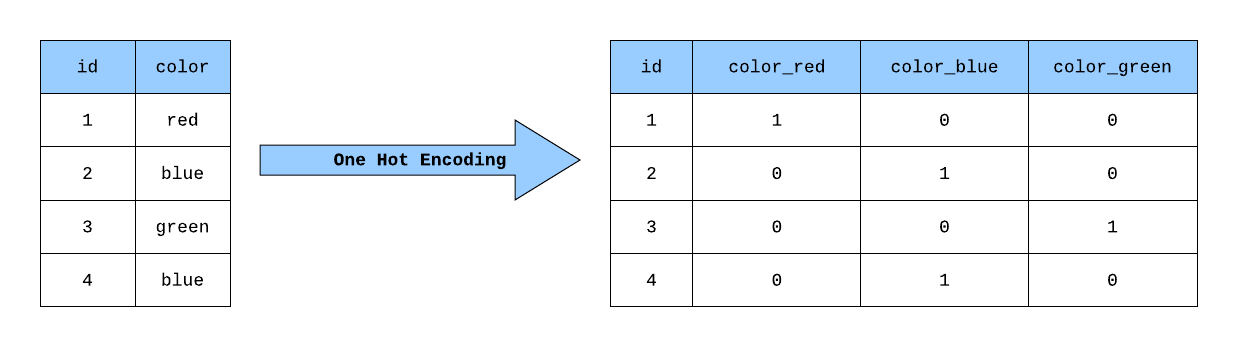
Kolom-kolom sisa yang belum diencode akan diencode dengan menggunakan metode One-Hot-Encoding

Mengambil kolom-kolom sisa

In [21]:
SisaKolom = kolom_kategorik.select_dtypes(include=['object'])
SisaKolom

MSSubClass MSZoning Street Alley LotConfig Neighborhood Condition1  \
0            60       RL   Pave   NaN    Inside      CollgCr       Norm   
1            20       RL   Pave   NaN       FR2      Veenker      Feedr   
2            60       RL   Pave   NaN    Inside      CollgCr       Norm   
3            70       RL   Pave   NaN    Corner      Crawfor       Norm   
4            60       RL   Pave   NaN       FR2      NoRidge       Norm   
...         ...      ...    ...   ...       ...          ...        ...   
1447         60       RL   Pave   NaN    Inside      Gilbert       Norm   
1448         20       RL   Pave   NaN    Inside       NWAmes       Norm   
1449         70       RL   Pave   NaN    Inside      Crawfor       Norm   
1450         20       RL   Pave   NaN    Inside        NAmes       Norm   
1451         20       RL   Pave   NaN    Inside      Edwards       Norm   

     Condition2 BldgType HouseStyle  ... Exterior1st Exterior2nd MasVnrType  \
0          Norm     1Fam     2Story  ...     VinylSd     VinylSd    BrkFace   
1          Norm     1Fam     1Story  ...     MetalSd     MetalSd       None   
2          Norm     1Fam     2Story  ...     VinylSd     VinylSd    BrkFace   
3          Norm     1Fam     2Story  ...     Wd Sdng     Wd Shng       None   
4          Norm     1Fam     2Story  ...     VinylSd     VinylSd    BrkFace   
...         ...      ...        ...  ...         ...         ...        ...   
1447       Norm     1Fam     2Story  ...     VinylSd     VinylSd       None   
1448       Norm     1Fam     1Story  ...     Plywood     Plywood      Stone   
1449       Norm     1Fam     2Story  ...     CemntBd     CmentBd       None   
1450       Norm     1Fam     1Story  ...     MetalSd     MetalSd       None   
1451       Norm     1Fam     1Story  ...     HdBoard     HdBoard       None   

     Foundation Heating CentralAir GarageType MiscFeature SaleType  \
0         PConc    GasA          Y     Attchd         NaN       WD   
1        CBlock    GasA          Y     Attchd         NaN       WD   
2         PConc    GasA          Y     Attchd         NaN       WD   
3        BrkTil    GasA          Y     Detchd         NaN       WD   
4         PConc    GasA          Y     Attchd         NaN       WD   
...         ...     ...        ...        ...         ...      ...   
1447      PConc    GasA          Y     Attchd         NaN       WD   
1448     CBlock    GasA          Y     Attchd         NaN       WD   
1449      Stone    GasA          Y     Attchd        Shed       WD   
1450     CBlock    GasA          Y     Attchd         NaN       WD   
1451     CBlock    GasA          Y     Attchd         NaN       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1447        Normal  
1448        Normal  
1449        Normal  
1450        Normal  
1451        Normal  

[1452 rows x 22 columns]

Dengan menggunakan library sklearn OneHotEncoder

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
ohe = OneHotEncoder(sparse=False)

In [24]:
OneHotEncodedKolom = pd.DataFrame(ohe.fit_transform(SisaKolom), columns=ohe.get_feature_names(SisaKolom.columns))
OneHotEncodedKolom

MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0.0            0.0            0.0            0.0   
1               1.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
1447            0.0            0.0            0.0            0.0   
1448            1.0            0.0            0.0            0.0   
1449            0.0            0.0            0.0            0.0   
1450            1.0            0.0            0.0            0.0   
1451            1.0            0.0            0.0            0.0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0               0.0            1.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            1.0            0.0            0.0   
3               0.0            0.0            1.0            0.0   
4               0.0            1.0            0.0            0.0   
...             ...            ...            ...            ...   
1447            0.0            1.0            0.0            0.0   
1448            0.0            0.0            0.0            0.0   
1449            0.0            0.0            1.0            0.0   
1450            0.0            0.0            0.0            0.0   
1451            0.0            0.0            0.0            0.0   

      MSSubClass_80  MSSubClass_85  ...  SaleType_ConLw  SaleType_New  \
0               0.0            0.0  ...             0.0           0.0   
1               0.0            0.0  ...             0.0           0.0   
2               0.0            0.0  ...             0.0           0.0   
3               0.0            0.0  ...             0.0           0.0   
4               0.0            0.0  ...             0.0           0.0   
...             ...            ...  ...             ...           ...   
1447            0.0            0.0  ...             0.0           0.0   
1448            0.0            0.0  ...             0.0           0.0   
1449            0.0            0.0  ...             0.0           0.0   
1450            0.0            0.0  ...             0.0           0.0   
1451            0.0            0.0  ...             0.0           0.0   

      SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0              0.0          1.0                    0.0                    0.0   
1              0.0          1.0                    0.0                    0.0   
2              0.0          1.0                    0.0                    0.0   
3              0.0          1.0                    1.0                    0.0   
4              0.0          1.0                    0.0                    0.0   
...            ...          ...                    ...                    ...   
1447           0.0          1.0                    0.0                    0.0   
1448           0.0          1.0                    0.0                    0.0   
1449           0.0          1.0                    0.0                    0.0   
1450           0.0          1.0                    0.0                    0.0   
1451           0.0          1.0                    0.0                    0.0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                      0.0                   0.0                   1.0   
1                      0.0                   0.0                   1.0   
2                      0.0                   0.0                   1.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   1.0   
...                    ...                   ...                   ...   
1447

Ganti semua kolom di OneHotEncodedKolom menjadi float64

In [25]:
OneHotEncodedKolom = OneHotEncodedKolom.astype('float64')
OneHotEncodedKolom

MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0.0            0.0            0.0            0.0   
1               1.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
1447            0.0            0.0            0.0            0.0   
1448            1.0            0.0            0.0            0.0   
1449            0.0            0.0            0.0            0.0   
1450            1.0            0.0            0.0            0.0   
1451            1.0            0.0            0.0            0.0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0               0.0            1.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            1.0            0.0            0.0   
3               0.0            0.0            1.0            0.0   
4               0.0            1.0            0.0            0.0   
...             ...            ...            ...            ...   
1447            0.0            1.0            0.0            0.0   
1448            0.0            0.0            0.0            0.0   
1449            0.0            0.0            1.0            0.0   
1450            0.0            0.0            0.0            0.0   
1451            0.0            0.0            0.0            0.0   

      MSSubClass_80  MSSubClass_85  ...  SaleType_ConLw  SaleType_New  \
0               0.0            0.0  ...             0.0           0.0   
1               0.0            0.0  ...             0.0           0.0   
2               0.0            0.0  ...             0.0           0.0   
3               0.0            0.0  ...             0.0           0.0   
4               0.0            0.0  ...             0.0           0.0   
...             ...            ...  ...             ...           ...   
1447            0.0            0.0  ...             0.0           0.0   
1448            0.0            0.0  ...             0.0           0.0   
1449            0.0            0.0  ...             0.0           0.0   
1450            0.0            0.0  ...             0.0           0.0   
1451            0.0            0.0  ...             0.0           0.0   

      SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0              0.0          1.0                    0.0                    0.0   
1              0.0          1.0                    0.0                    0.0   
2              0.0          1.0                    0.0                    0.0   
3              0.0          1.0                    1.0                    0.0   
4              0.0          1.0                    0.0                    0.0   
...            ...          ...                    ...                    ...   
1447           0.0          1.0                    0.0                    0.0   
1448           0.0          1.0                    0.0                    0.0   
1449           0.0          1.0                    0.0                    0.0   
1450           0.0          1.0                    0.0                    0.0   
1451           0.0          1.0                    0.0                    0.0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                      0.0                   0.0                   1.0   
1                      0.0                   0.0                   1.0   
2                      0.0                   0.0                   1.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   1.0   
...                    ...                   ...                   ...   
1447

## 8. Data Transformasi
Data Frame akan discaling supaya pada saat Imputasi menggunakan metode KNN hasilnya lebih akurat

Sebelum itu kita gabungkan terlebih dahulu kolom-kolom yang terpisah

In [26]:
df8 = pd.concat([kolom_numerik, OneHotEncodedKolom, LabelEncodedKolom],axis=1)
df.duplicated().sum()

0

Kemudian menggunakan library sklearn MinMaxScaler untuk menscaling semua data

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
df_scaled = pd.DataFrame(data=scaler.fit_transform(df8), columns=df8.columns)
df_scaled

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        0.150685  0.033420     0.666667        0.500   0.949275   
1        0.202055  0.038795     0.555556        0.875   0.753623   
2        0.160959  0.046507     0.666667        0.500   0.934783   
3        0.133562  0.038561     0.666667        0.500   0.311594   
4        0.215753  0.060576     0.777778        0.500   0.927536   
...           ...       ...          ...          ...        ...   
1447     0.140411  0.030929     0.555556        0.500   0.920290   
1448     0.219178  0.055505     0.555556        0.625   0.768116   
1449     0.154110  0.036187     0.666667        1.000   0.500000   
1450     0.160959  0.039342     0.444444        0.625   0.565217   
1451     0.184932  0.040370     0.444444        0.625   0.673913   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
0         0.883333    0.122500    0.125089    0.000000   0.064212  ...   
1         0.433333    0.000000    0.173281    0.000000   0.121575  ...   
2         0.866667    0.101250    0.086109    0.000000   0.185788  ...   
3         0.333333    0.000000    0.038271    0.000000   0.231164  ...   
4         0.833333    0.218750    0.116052    0.000000   0.209760  ...   
...            ...         ...         ...         ...        ...  ...   
1447      0.833333    0.000000    0.000000    0.000000   0.407962  ...   
1448      0.633333    0.074375    0.139972    0.110583   0.252140  ...   
1449      0.933333    0.000000    0.048724    0.000000   0.375428  ...   
1450      0.766667    0.000000    0.008682    0.698100   0.000000  ...   
1451      0.250000    0.000000    0.147059    0.196744   0.058219  ...   

      Electrical  KitchenQual  Functional  FireplaceQu  GarageFinish  \
0            0.8     0.666667    1.000000          1.0      0.333333   
1            0.8     1.000000    1.000000          0.8      0.333333   
2            0.8     0.666667    1.000000          0.8      0.333333   
3            0.8     0.666667    1.000000          0.4      0.666667   
4            0.8     0.666667    1.000000          0.8      0.333333   
...          ...          ...         ...          ...           ...   
1447         0.8     1.000000    1.000000          0.8      0.333333   
1448         0.8     1.000000    0.333333          0.8      0.666667   
1449         0.8     0.666667    1.000000          0.4      0.333333   
1450         0.0     0.666667    1.000000          1.0      0.666667   
1451         0.8     1.000000    1.000000          1.0      0.000000   

      GarageQual  GarageCond  PavedDrive  PoolQC  Fence  
0            0.8         0.8         1.0     1.0    1.0  
1            0.8         0.8         1.0     1.0    1.0  
2            0.8         0.8         1.0     1.0    1.0  
3            0.8         0.8         1.0     1.0    1.0  
4            0.8         0.8         1.0     1.0    1.0  
...          ...         ...         ...     ...    ...  
1447         0.8         0.8         1.0     1.0    1.0  
1448         0.8         0.8         1.0     1.0    0.5  
1449         0.8         0.8         1.0     1.0    0.0  
1450         0.8         0.8         1.0     1.0    1.0  
1451         0.8         0.8         1.0     1.0    1.0  

[1452 rows x 233 columns]

## 9. Imputasi
Imputasi adalah mengisi nilai-nilai yang hilang pada dataframe
### 9.1 Dengan menggunakan Imputer Mean
Seperti yang sudah dijelaskan sebelumnya, kolom GarageYrBlt harus dilakukan imputasi mean supaya rata-rata data pada kolom tersebut tidak berubah.

Dengan menggunakan library sklearn SimpleImputer

In [29]:
from sklearn.impute import SimpleImputer
meanimp = SimpleImputer(missing_values=np.NaN, strategy='mean')

Mengambil kolom GarageYrBlt

In [30]:
kolom_mean = pd.DataFrame(df_scaled["GarageYrBlt"])
kolom_mean.head()

GarageYrBlt
0     0.936364
1     0.690909
2     0.918182
3     0.890909
4     0.909091

In [31]:
kolom_meanimp = pd.DataFrame(data=meanimp.fit_transform(kolom_mean), columns=kolom_mean.columns)

Mengecek apakah sudah tidak ada missing value

In [32]:
print(kolom_meanimp.isna().sum().to_string())

GarageYrBlt    0


## 9.2 Dengan menggunakan Imputer KNN
Semua *missing values* akan di-*imputing* dengan menggunakan metode KNN-Imputing kecuali untuk kolom SalePrice yang merupakan fitur target dan kolom GarageYrBlt yang merupakan kasus khusus yang telah dijelaskan sebelumnya.

In [33]:
kolom_knn = df_scaled
kolom_knn.drop(['GarageYrBlt','SalePrice'], axis=1, inplace=True)
kolom_knn.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     0.150685  0.033420     0.666667        0.500   0.949275      0.883333   
1     0.202055  0.038795     0.555556        0.875   0.753623      0.433333   
2     0.160959  0.046507     0.666667        0.500   0.934783      0.866667   
3     0.133562  0.038561     0.666667        0.500   0.311594      0.333333   
4     0.215753  0.060576     0.777778        0.500   0.927536      0.833333   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  Electrical  \
0     0.12250    0.125089         0.0   0.064212  ...         0.8   
1     0.00000    0.173281         0.0   0.121575  ...         0.8   
2     0.10125    0.086109         0.0   0.185788  ...         0.8   
3     0.00000    0.038271         0.0   0.231164  ...         0.8   
4     0.21875    0.116052         0.0   0.209760  ...         0.8   

   KitchenQual  Functional  FireplaceQu  GarageFinish  GarageQual  GarageCond  \
0     0.666667         1.0          1.0      0.333333         0.8         0.8   
1     1.000000         1.0          0.8      0.333333         0.8         0.8   
2     0.666667         1.0          0.8      0.333333         0.8         0.8   
3     0.666667         1.0          0.4      0.666667         0.8         0.8   
4     0.666667         1.0          0.8      0.333333         0.8         0.8   

   PavedDrive  PoolQC  Fence  
0         1.0     1.0    1.0  
1         1.0     1.0    1.0  
2         1.0     1.0    1.0  
3         1.0     1.0    1.0  
4         1.0     1.0    1.0  

[5 rows x 231 columns]

K yang digunakan adalah akar dari banyaknya sampel, yaitu akar(1452) karena biasanya lebih akurat imputasinya

import library KNN-Imputer

In [34]:
from sklearn.impute import KNNImputer
k=math.floor(np.sqrt(1452))
knnimp = KNNImputer(n_neighbors=k)

In [35]:
kolom_knnimp = pd.DataFrame(data=knnimp.fit_transform(kolom_knn), columns=kolom_knn.columns)

Mengecek apakah sudah tidak ada missing value

In [36]:
print(kolom_knnimp.isna().sum().to_string())

LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
MSSubClass_20            0
MSSubClass_30            0
MSSubClass_40            0
M

## 10. Menggabungkan semua kolom yang akan diproses lebih lanjut

In [37]:
df_finalcleaning = pd.concat([kolom_knnimp,kolom_meanimp],axis=1)
df_finalcleaning

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        0.150685  0.033420     0.666667        0.500   0.949275   
1        0.202055  0.038795     0.555556        0.875   0.753623   
2        0.160959  0.046507     0.666667        0.500   0.934783   
3        0.133562  0.038561     0.666667        0.500   0.311594   
4        0.215753  0.060576     0.777778        0.500   0.927536   
...           ...       ...          ...          ...        ...   
1447     0.140411  0.030929     0.555556        0.500   0.920290   
1448     0.219178  0.055505     0.555556        0.625   0.768116   
1449     0.154110  0.036187     0.666667        1.000   0.500000   
1450     0.160959  0.039342     0.444444        0.625   0.565217   
1451     0.184932  0.040370     0.444444        0.625   0.673913   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
0         0.883333    0.122500    0.125089    0.000000   0.064212  ...   
1         0.433333    0.000000    0.173281    0.000000   0.121575  ...   
2         0.866667    0.101250    0.086109    0.000000   0.185788  ...   
3         0.333333    0.000000    0.038271    0.000000   0.231164  ...   
4         0.833333    0.218750    0.116052    0.000000   0.209760  ...   
...            ...         ...         ...         ...        ...  ...   
1447      0.833333    0.000000    0.000000    0.000000   0.407962  ...   
1448      0.633333    0.074375    0.139972    0.110583   0.252140  ...   
1449      0.933333    0.000000    0.048724    0.000000   0.375428  ...   
1450      0.766667    0.000000    0.008682    0.698100   0.000000  ...   
1451      0.250000    0.000000    0.147059    0.196744   0.058219  ...   

      KitchenQual  Functional  FireplaceQu  GarageFinish  GarageQual  \
0        0.666667    1.000000          1.0      0.333333         0.8   
1        1.000000    1.000000          0.8      0.333333         0.8   
2        0.666667    1.000000          0.8      0.333333         0.8   
3        0.666667    1.000000          0.4      0.666667         0.8   
4        0.666667    1.000000          0.8      0.333333         0.8   
...           ...         ...          ...           ...         ...   
1447     1.000000    1.000000          0.8      0.333333         0.8   
1448     1.000000    0.333333          0.8      0.666667         0.8   
1449     0.666667    1.000000          0.4      0.333333         0.8   
1450     0.666667    1.000000          1.0      0.666667         0.8   
1451     1.000000    1.000000          1.0      0.000000         0.8   

      GarageCond  PavedDrive  PoolQC  Fence  GarageYrBlt  
0            0.8         1.0     1.0    1.0     0.936364  
1            0.8         1.0     1.0    1.0     0.690909  
2            0.8         1.0     1.0    1.0     0.918182  
3            0.8         1.0     1.0    1.0     0.890909  
4            0.8         1.0     1.0    1.0     0.909091  
...          ...         ...     ...    ...          ...  
1447         0.8         1.0     1.0    1.0     0.900000  
1448         0.8         1.0     1.0    0.5     0.709091  
1449         0.8         1.0     1.0    0.0     0.372727  
1450         0.8         1.0     1.0    1.0     0.454545  
1451         0.8         1.0     1.0    1.0     0.590909  

[1452 rows x 232 columns]

# Feature Engineering
Sebelum itu, kita harus mendefinisikan fitur target sebagai Y

In [38]:
Y = df6['SalePrice']
Y = Y.astype('float64')
Y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1447    175000.0
1448    210000.0
1449    266500.0
1450    142125.0
1451    147500.0
Name: SalePrice, Length: 1452, dtype: float64

Y dibagi 100000 supaya plot lebih jelas

In [39]:
Yceper = Y/100000
Yceper.rename('SalePrice(100000)', inplace=True)
Yceper

0       2.08500
1       1.81500
2       2.23500
3       1.40000
4       2.50000
         ...   
1447    1.75000
1448    2.10000
1449    2.66500
1450    1.42125
1451    1.47500
Name: SalePrice(100000), Length: 1452, dtype: float64

Mencari fitur yang baik untuk dijadikan bahan modelling

Dengan menggunakan library sklearn SelectKBest untuk mencari k fitur terbaik yang akan digunakan dalam modelling dengan pendekatan regresi

In [40]:
from sklearn.feature_selection import f_regression, SelectKBest

In [41]:
kbest = SelectKBest(score_func=f_regression, k=10)
X = kbest.fit_transform(df_finalcleaning, Yceper)
bestfeatures = df_finalcleaning.columns[kbest.get_support()]
df_bestfeatures = df_finalcleaning[bestfeatures]
df_bestfeatures

OverallQual  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  GarageCars  \
0        0.666667     0.140098  0.119780   0.259231  0.666667        0.50   
1        0.555556     0.206547  0.212942   0.174830  0.666667        0.50   
2        0.666667     0.150573  0.134465   0.273549  0.666667        0.50   
3        0.666667     0.123732  0.143873   0.260550  0.333333        0.75   
4        0.777778     0.187398  0.186095   0.351168  0.666667        0.75   
...           ...          ...       ...        ...       ...         ...   
1447     0.555556     0.155974  0.142038   0.247362  0.666667        0.50   
1448     0.555556     0.252373  0.399036   0.327619  0.666667        0.50   
1449     0.666667     0.188543  0.195961   0.377920  0.666667        0.25   
1450     0.444444     0.176432  0.170721   0.140166  0.333333        0.25   
1451     0.444444     0.205565  0.211565   0.173700  0.333333        0.25   

      GarageArea  ExterQual  BsmtQual  KitchenQual  
0       0.386460   0.666667      0.50     0.666667  
1       0.324401   1.000000      0.50     1.000000  
2       0.428773   0.666667      0.50     0.666667  
3       0.452750   1.000000      0.75     0.666667  
4       0.589563   0.666667      0.50     0.666667  
...          ...        ...       ...          ...  
1447    0.324401   1.000000      0.50     1.000000  
1448    0.352609   1.000000      0.50     1.000000  
1449    0.177715   0.000000      0.75     0.666667  
1450    0.169252   1.000000      0.75     0.666667  
1451    0.194640   0.666667      0.75     1.000000  

[1452 rows x 10 columns]

# EDA
Sebelum itu kita cek terlebih dahulu apakah Yceper ada missing values atau tidak

In [42]:
Yceper.isna().sum()

0

Gabungkan df_bestfeatures dengan Yceper

In [43]:
df_bestfeatures['SalePrice(100000)'] = Yceper

<ipython-input-43-13bcd505331b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bestfeatures['SalePrice(100000)'] = Yceper


In [44]:
df_eda = df_bestfeatures
df_eda

OverallQual  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  GarageCars  \
0        0.666667     0.140098  0.119780   0.259231  0.666667        0.50   
1        0.555556     0.206547  0.212942   0.174830  0.666667        0.50   
2        0.666667     0.150573  0.134465   0.273549  0.666667        0.50   
3        0.666667     0.123732  0.143873   0.260550  0.333333        0.75   
4        0.777778     0.187398  0.186095   0.351168  0.666667        0.75   
...           ...          ...       ...        ...       ...         ...   
1447     0.555556     0.155974  0.142038   0.247362  0.666667        0.50   
1448     0.555556     0.252373  0.399036   0.327619  0.666667        0.50   
1449     0.666667     0.188543  0.195961   0.377920  0.666667        0.25   
1450     0.444444     0.176432  0.170721   0.140166  0.333333        0.25   
1451     0.444444     0.205565  0.211565   0.173700  0.333333        0.25   

      GarageArea  ExterQual  BsmtQual  KitchenQual  SalePrice(100000)  
0       0.386460   0.666667      0.50     0.666667            2.08500  
1       0.324401   1.000000      0.50     1.000000            1.81500  
2       0.428773   0.666667      0.50     0.666667            2.23500  
3       0.452750   1.000000      0.75     0.666667            1.40000  
4       0.589563   0.666667      0.50     0.666667            2.50000  
...          ...        ...       ...          ...                ...  
1447    0.324401   1.000000      0.50     1.000000            1.75000  
1448    0.352609   1.000000      0.50     1.000000            2.10000  
1449    0.177715   0.000000      0.75     0.666667            2.66500  
1450    0.169252   1.000000      0.75     0.666667            1.42125  
1451    0.194640   0.666667      0.75     1.000000            1.47500  

[1452 rows x 11 columns]

Melihat apakah ada duplikasi dan missing values pada df_eda

In [45]:
df_eda.duplicated().sum()

0

In [46]:
df_eda.isna().sum()

OverallQual          0
TotalBsmtSF          0
1stFlrSF             0
GrLivArea            0
FullBath             0
GarageCars           0
GarageArea           0
ExterQual            0
BsmtQual             0
KitchenQual          0
SalePrice(100000)    0
dtype: int64

Sudah tidak ada duplikasi dan missing values, sehingga kita langsung deskripsikan saja

In [47]:
df_eda.describe()

OverallQual  TotalBsmtSF     1stFlrSF    GrLivArea     FullBath  \
count  1452.000000  1452.000000  1452.000000  1452.000000  1452.000000   
mean      0.565886     0.172806     0.189828     0.222323     0.520891   
std       0.153477     0.071705     0.088348     0.099026     0.183410   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.444444     0.130074     0.125746     0.149586     0.333333   
50%       0.555556     0.162111     0.172556     0.212415     0.666667   
75%       0.666667     0.212316     0.242542     0.271665     0.666667   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        GarageCars   GarageArea    ExterQual     BsmtQual  KitchenQual  \
count  1452.000000  1452.000000  1452.000000  1452.000000  1452.000000   
mean      0.441288     0.333198     0.848026     0.576963     0.780762   
std       0.187124     0.150992     0.230558     0.224816     0.276568   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.231135     0.666667     0.500000     0.666667   
50%       0.500000     0.337094     1.000000     0.500000     1.000000   
75%       0.500000     0.406206     1.000000     0.750000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       SalePrice(100000)  
count        1452.000000  
mean            1.806151  
std             0.792855  
min             0.349000  
25%             1.299000  
50%             1.627000  
75%             2.140000  
max             7.550000

Membuat boxplot untuk df_eda

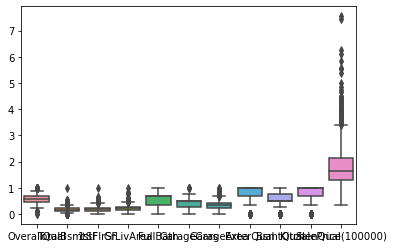

In [46]:
sns.boxplot(data=df_eda)
plt.show()

Terlihat banyak sekali outlier yang ada, namun outlier tersebut berguna untuk hasil modeling, jika dihilangkan akan mengakibatkan hasil yang berbeda sedemikian sehingga lebih baik tidak dihilangkan.

Melihat persebaran data df_finalcleaning

Persebaran data kategorik dengan menggunakan histogram

In [53]:
kolomdata

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Pave',
 'Alley_nan',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',

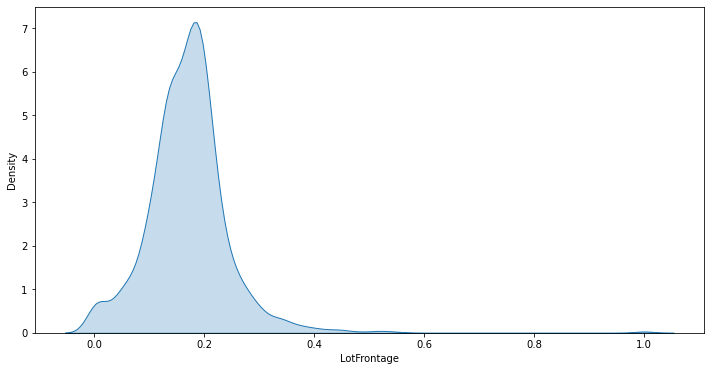

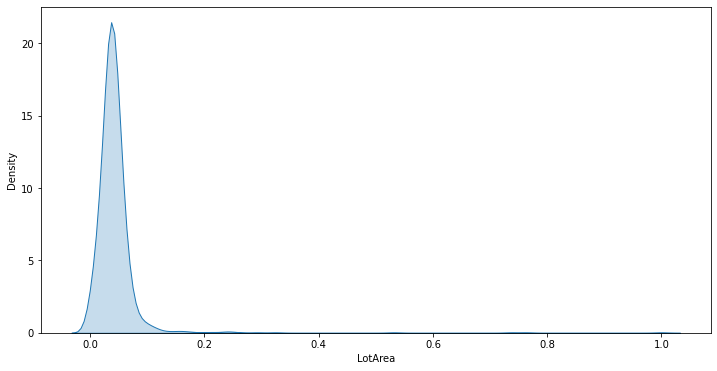

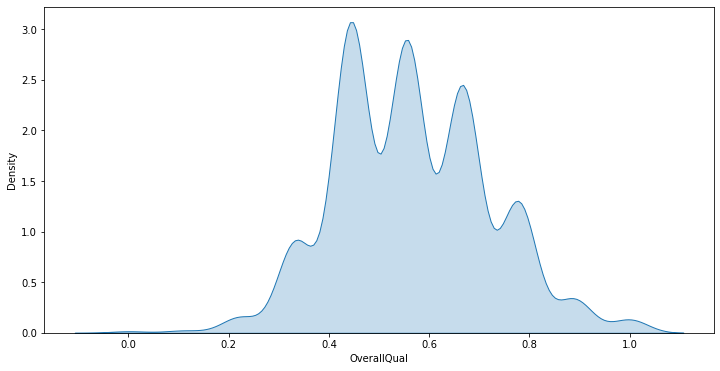

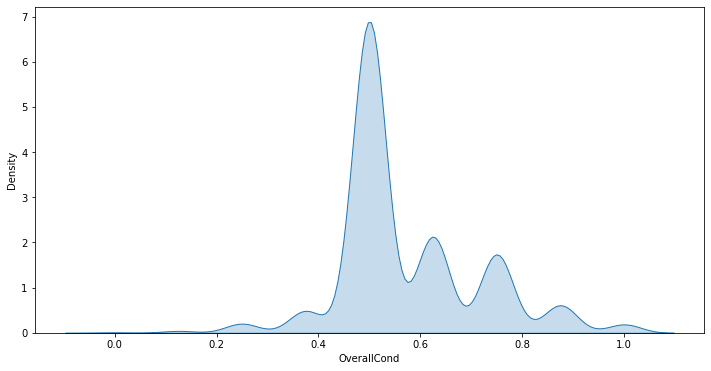

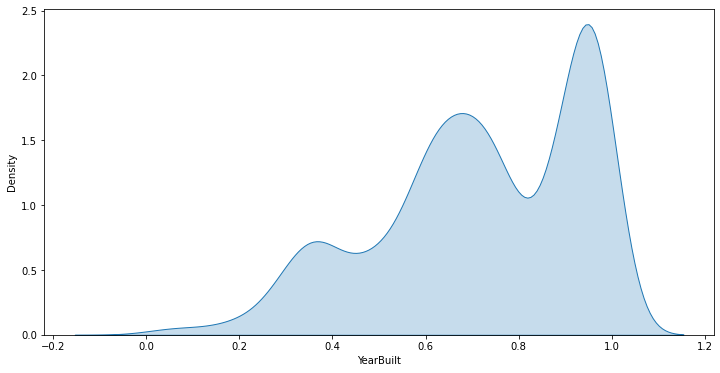

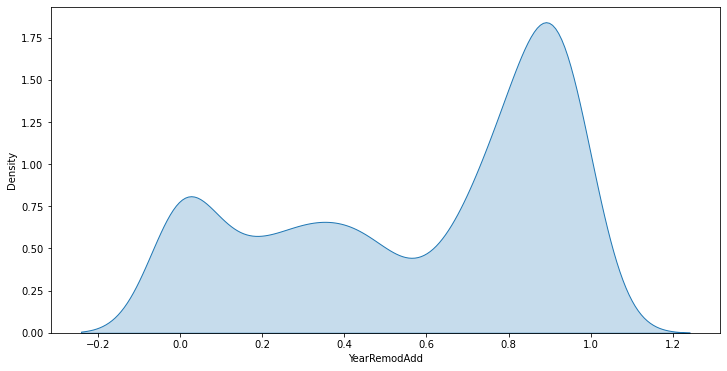

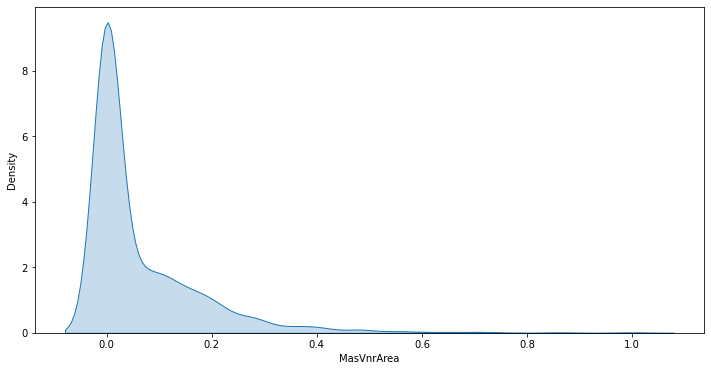

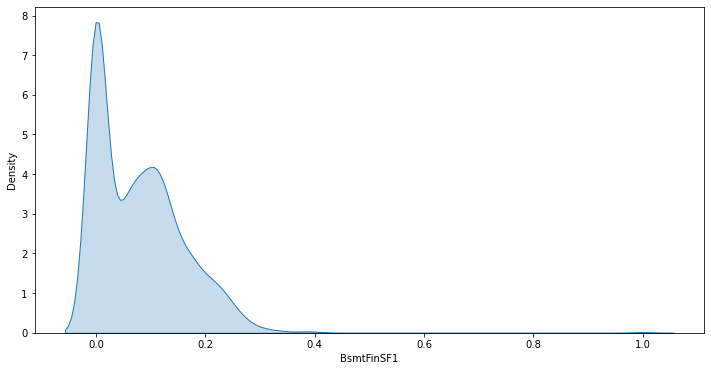

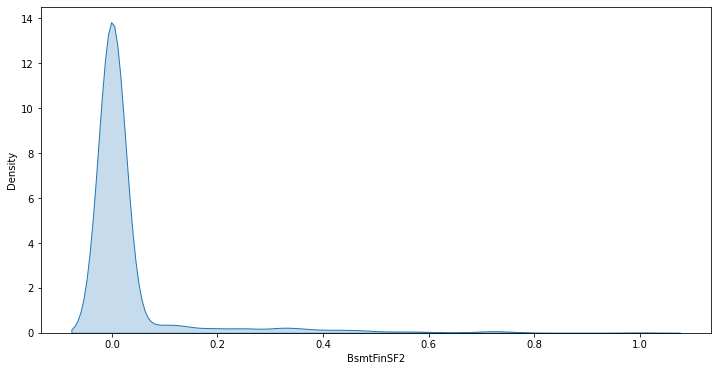

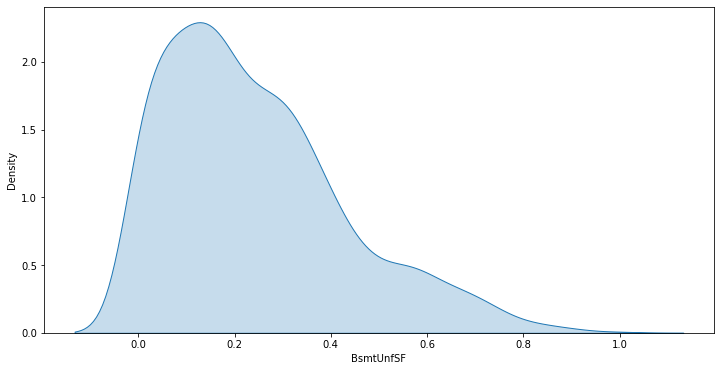

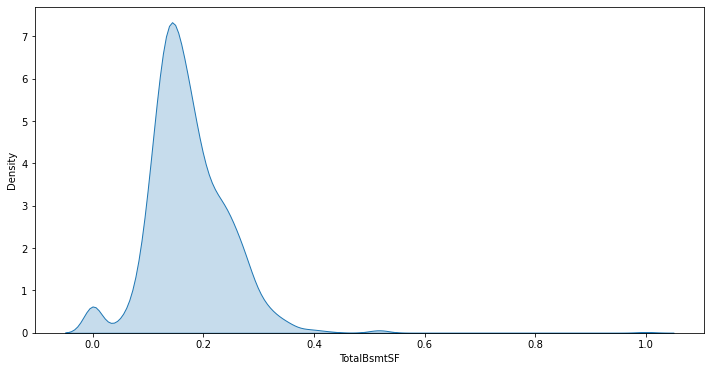

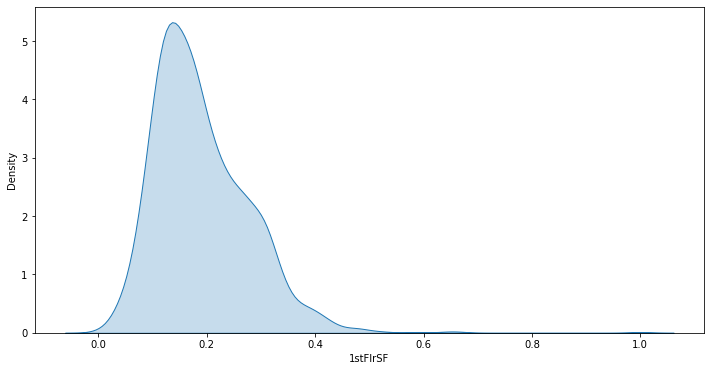

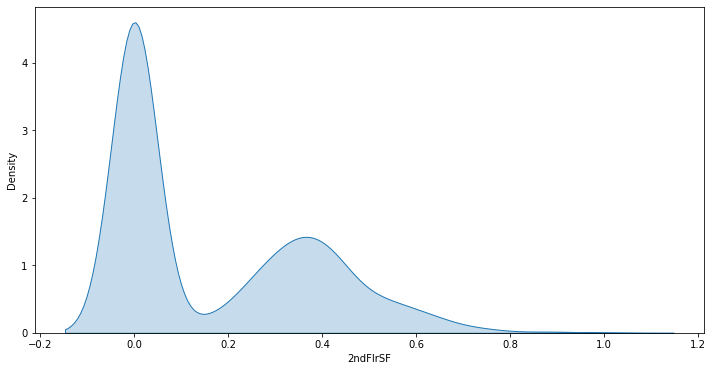

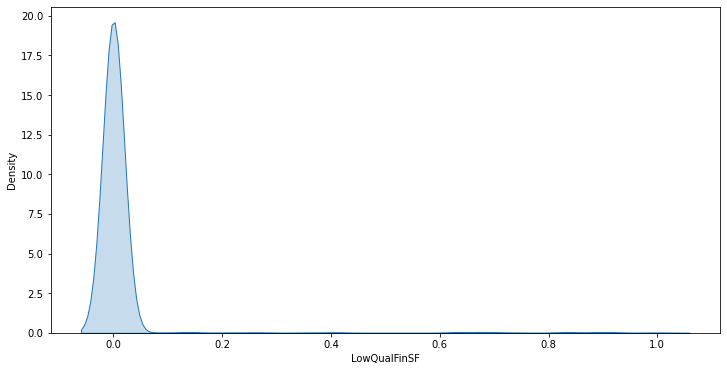

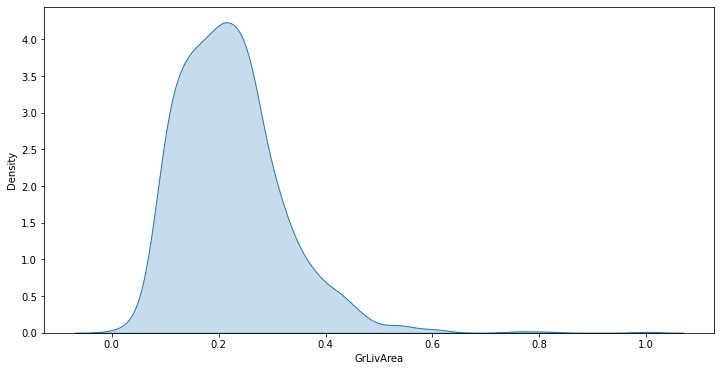

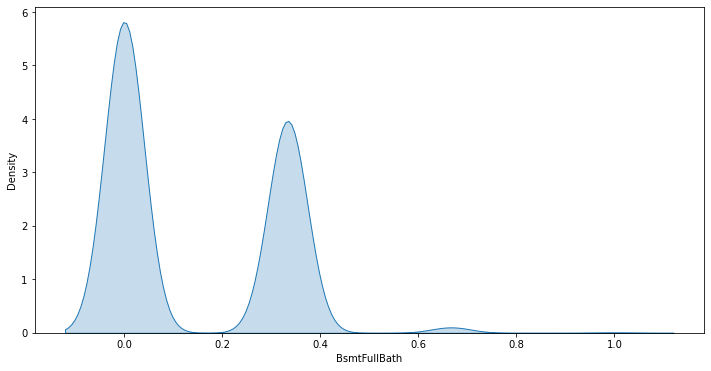

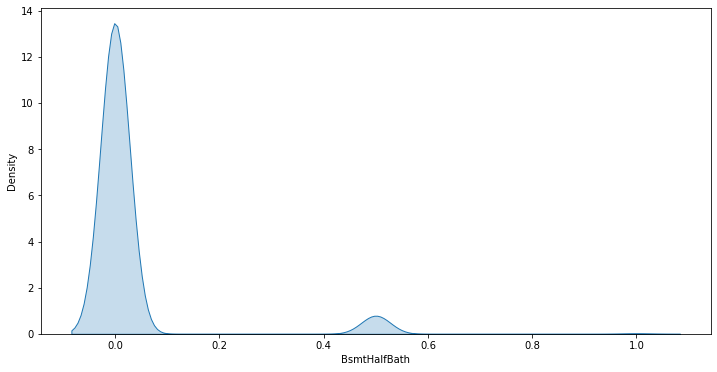

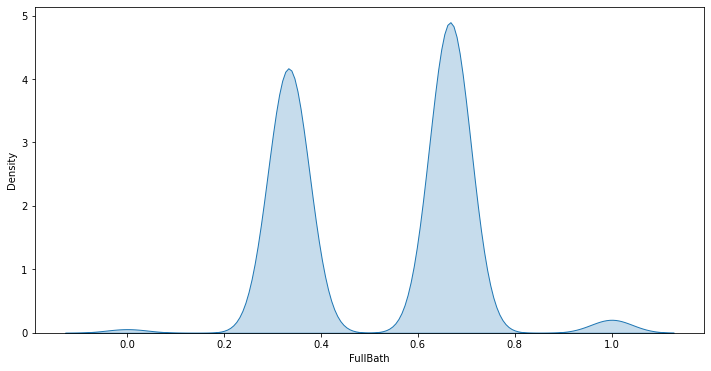

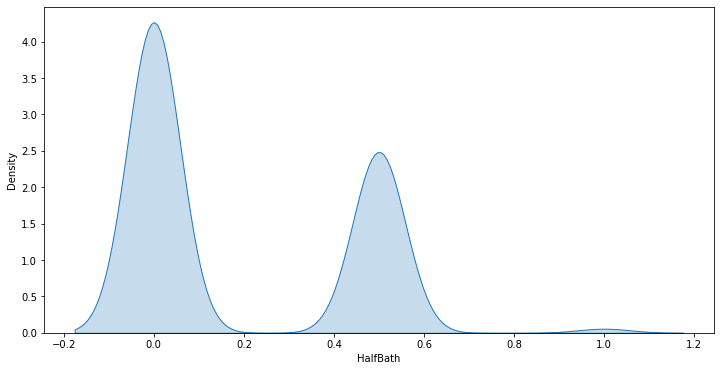

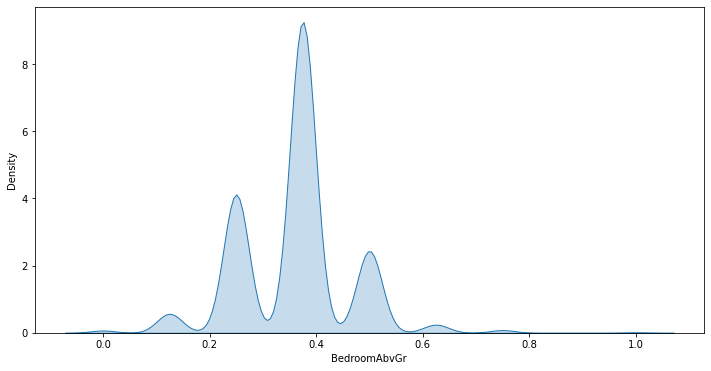

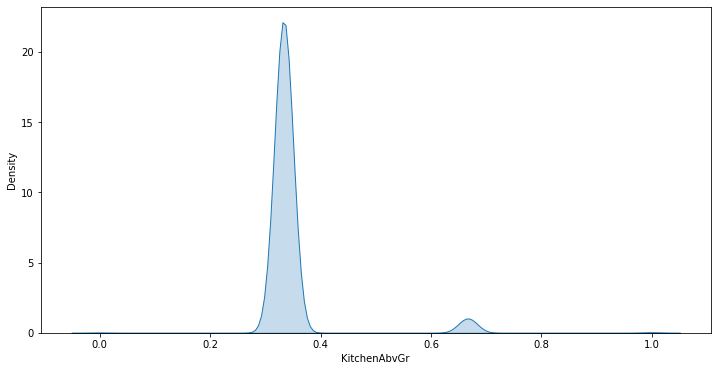

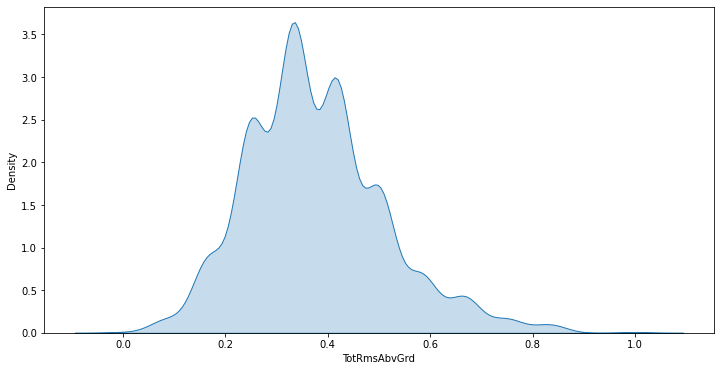

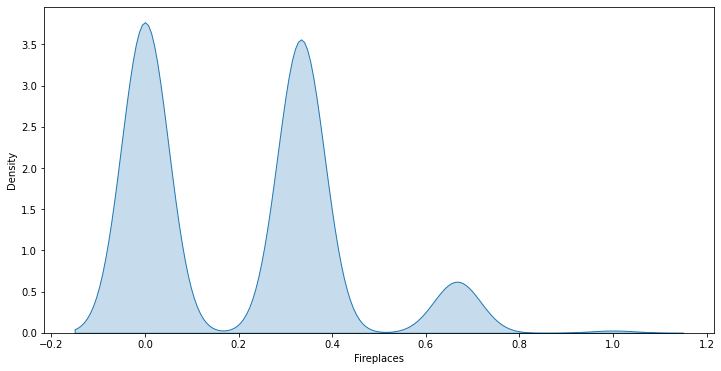

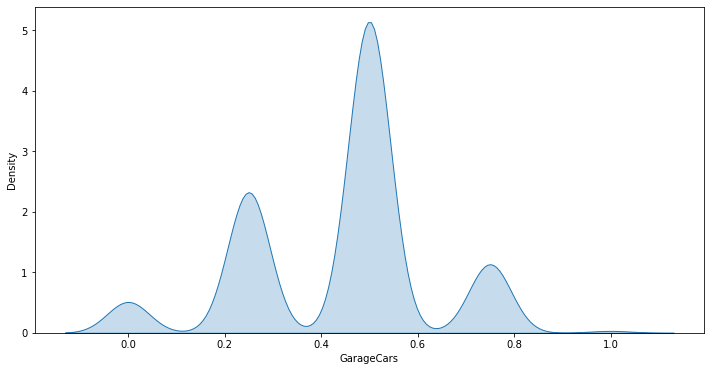

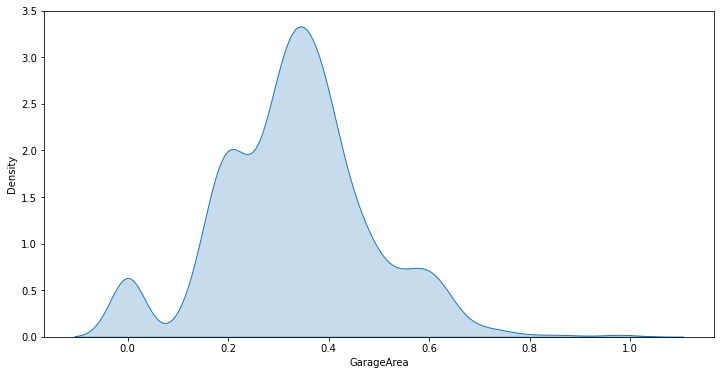

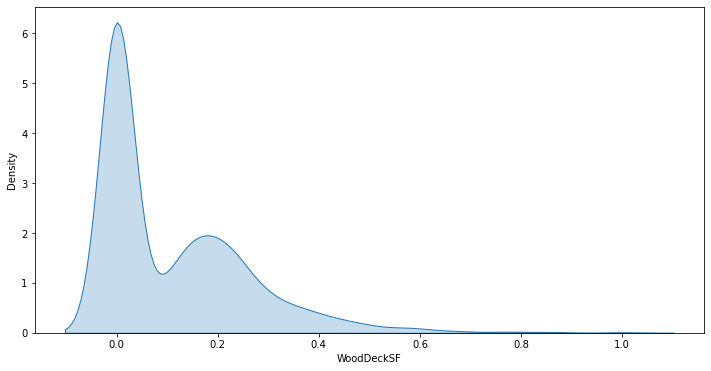

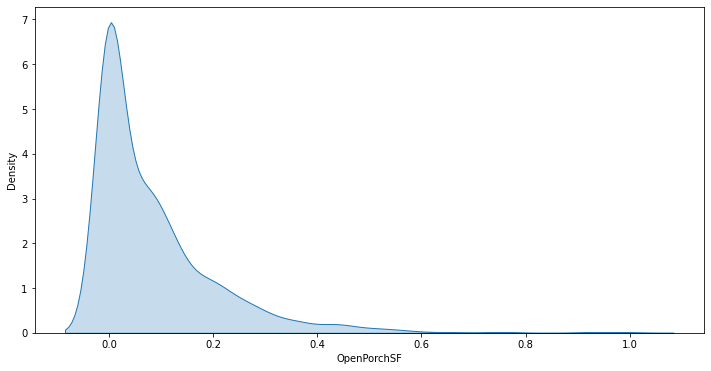

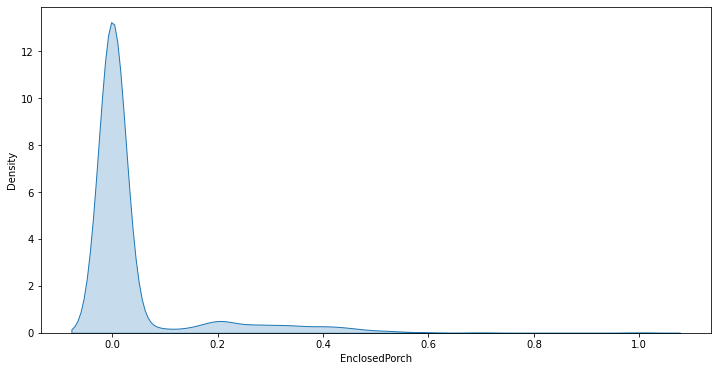

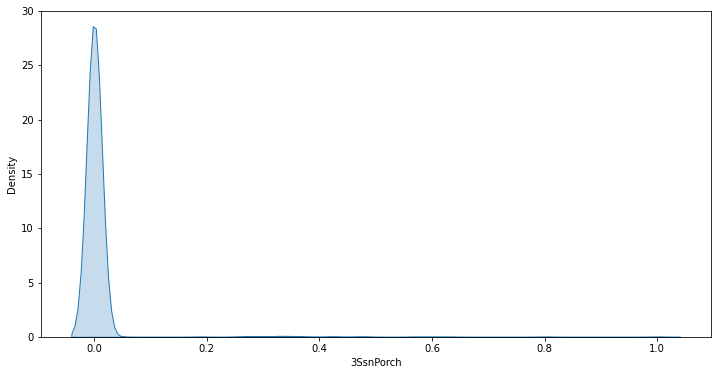

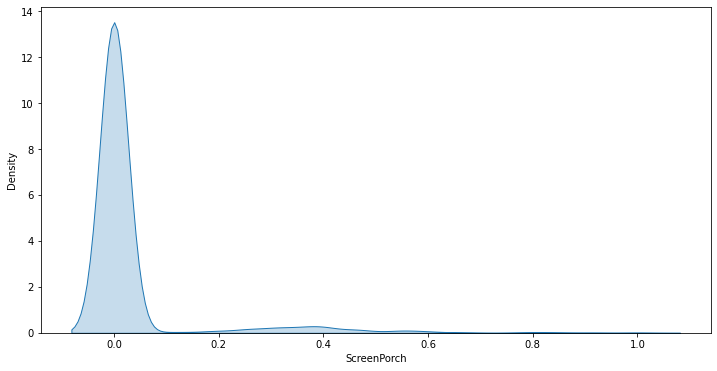

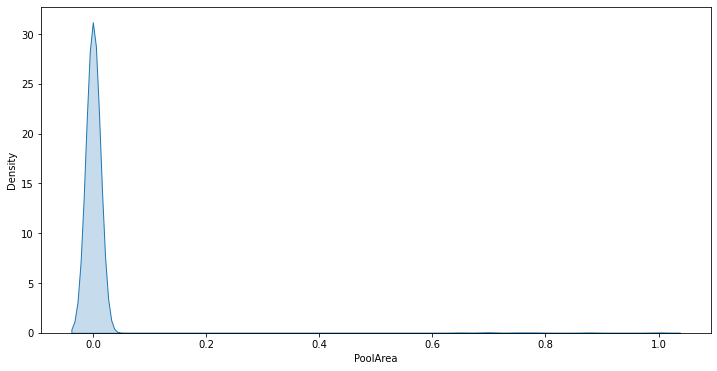

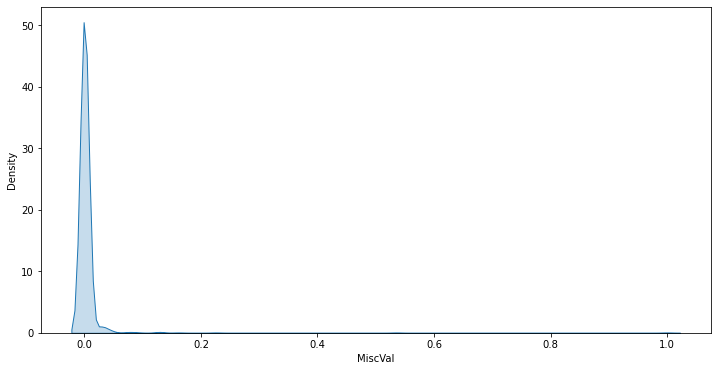

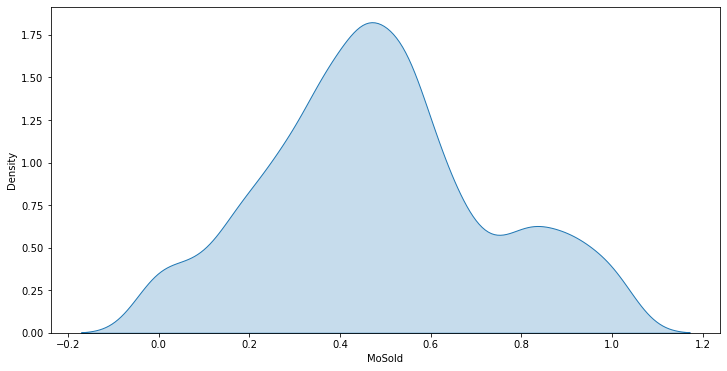

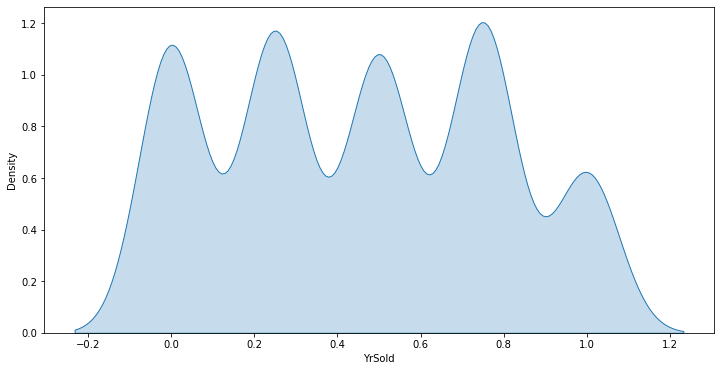

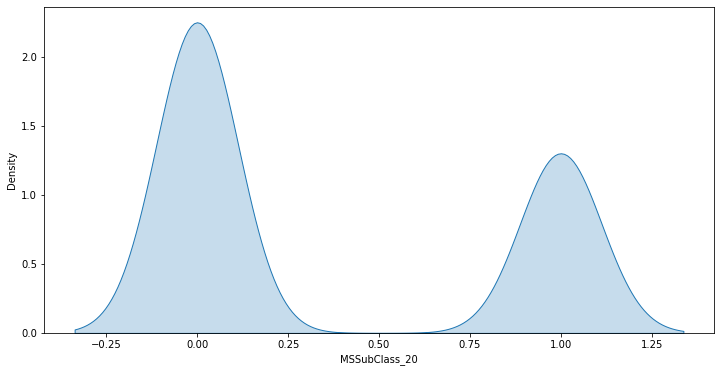

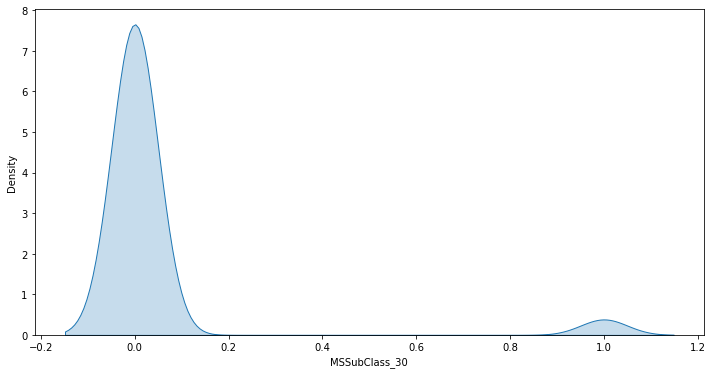

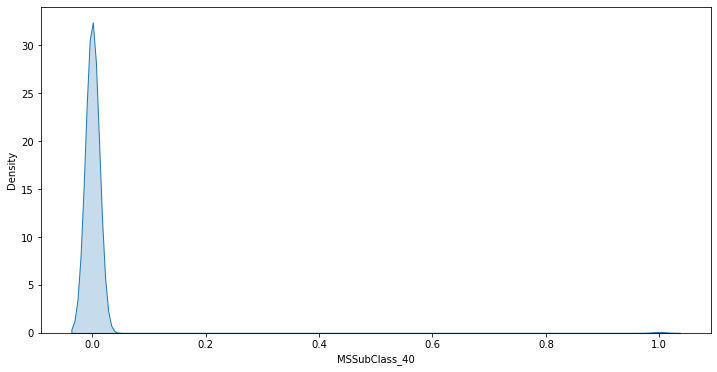

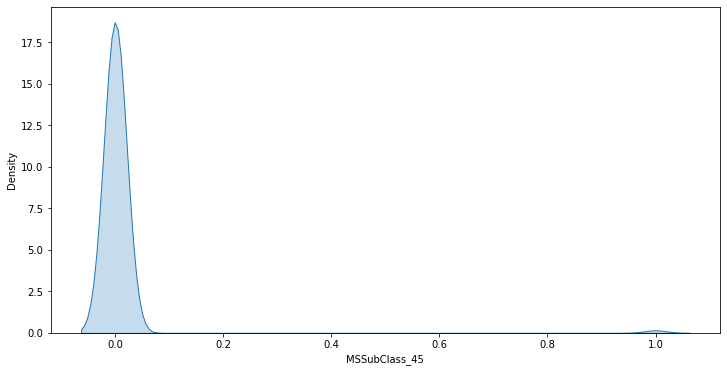

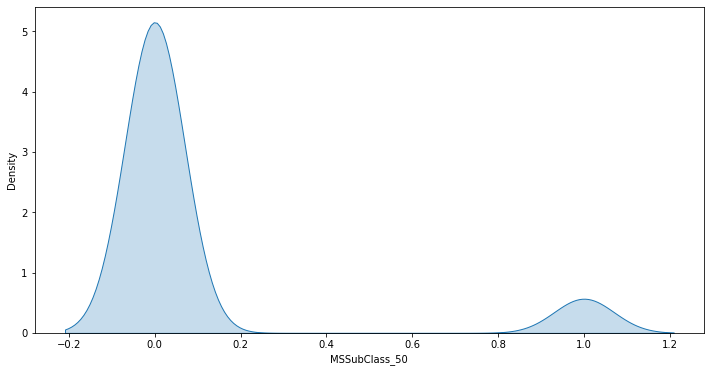

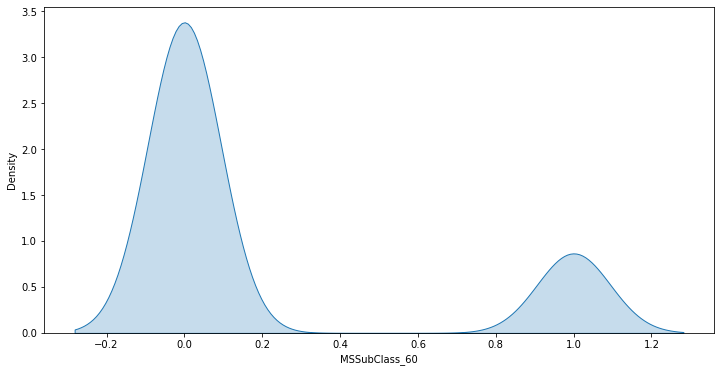

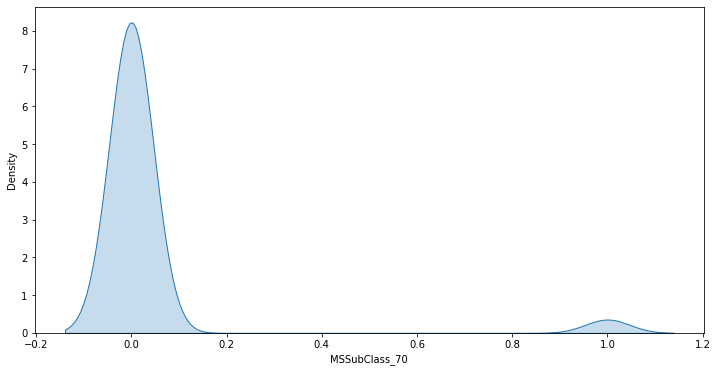

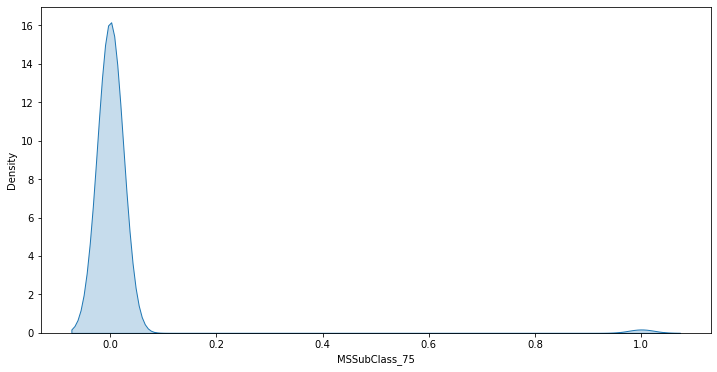

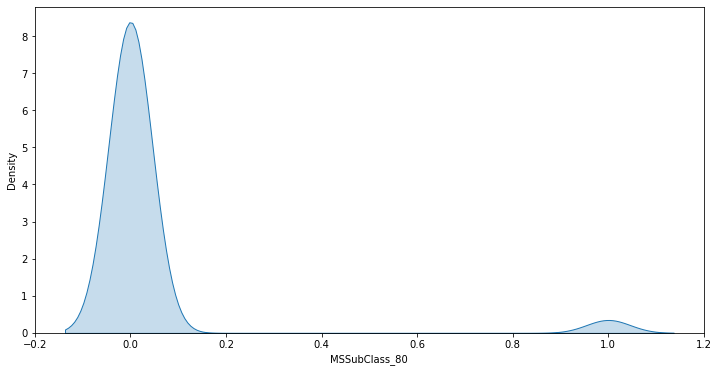

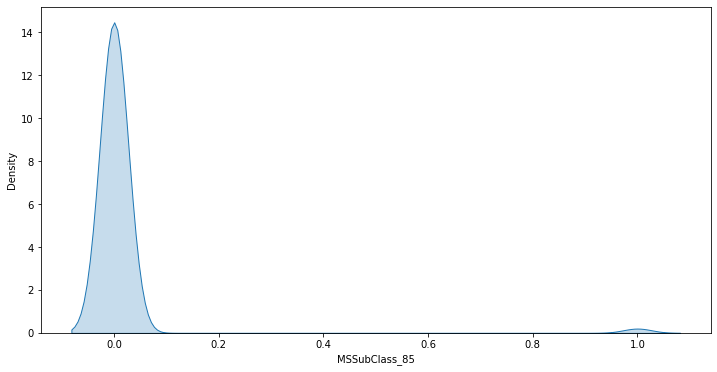

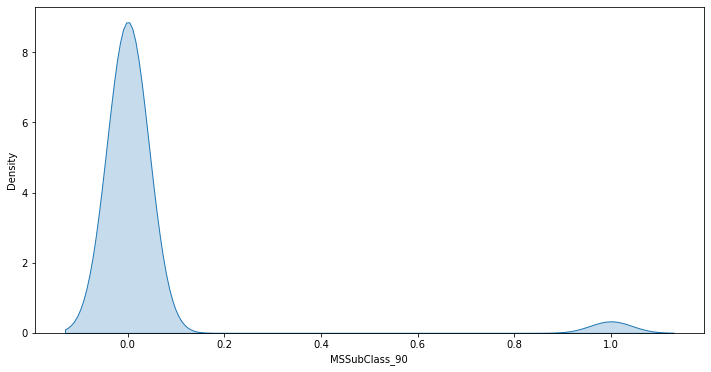

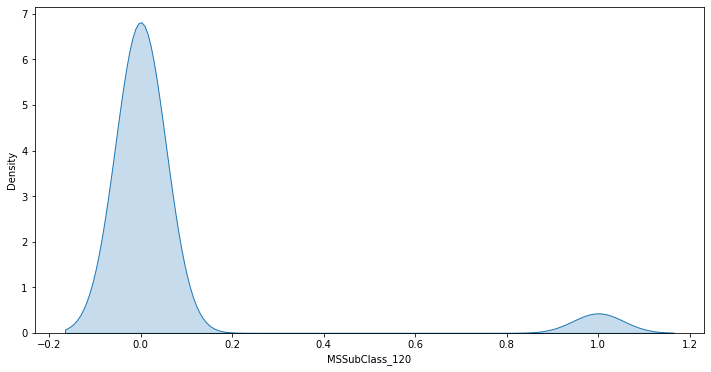

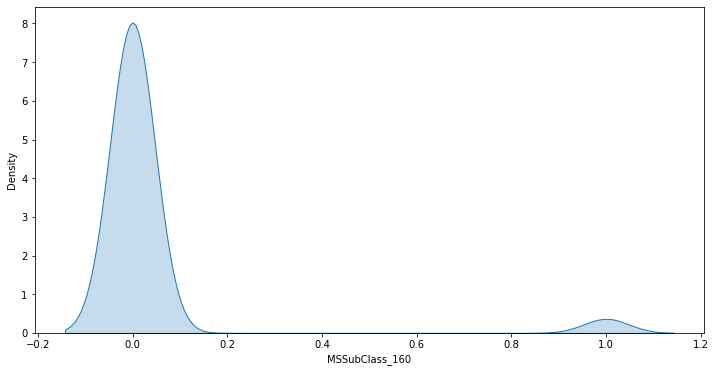

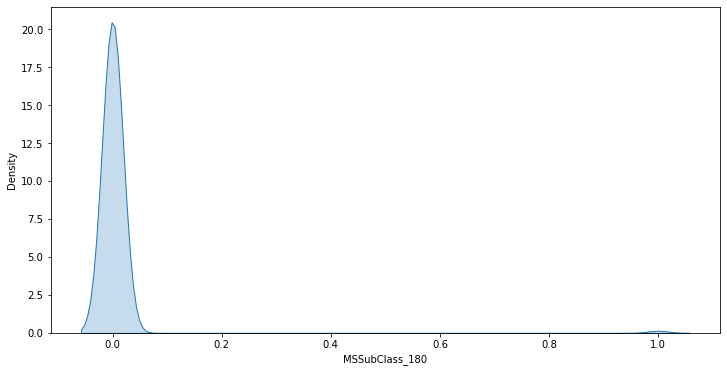

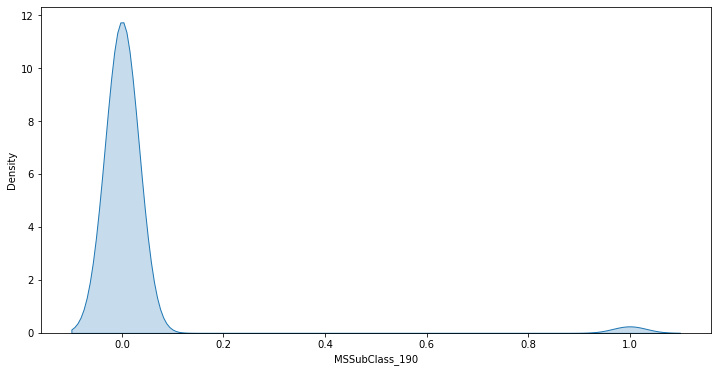

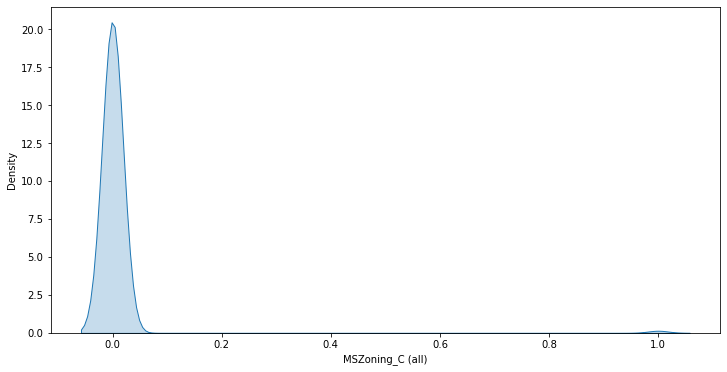

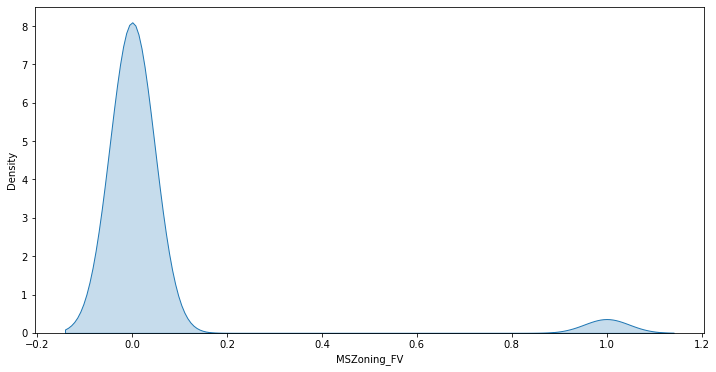

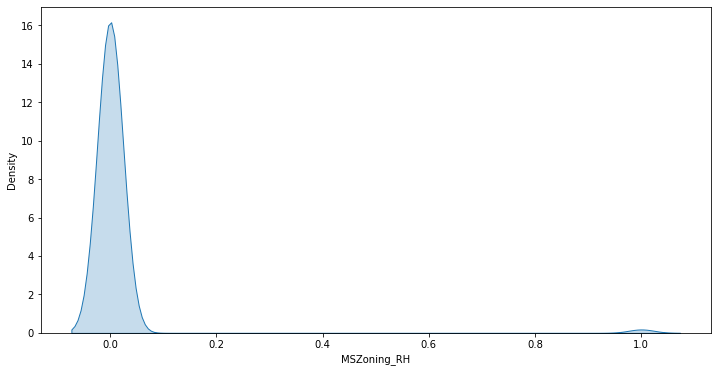

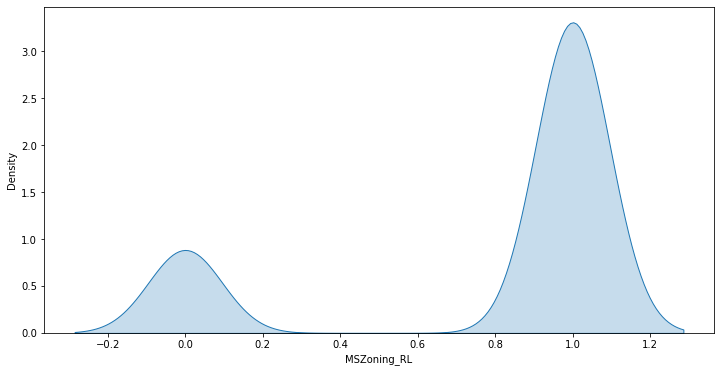

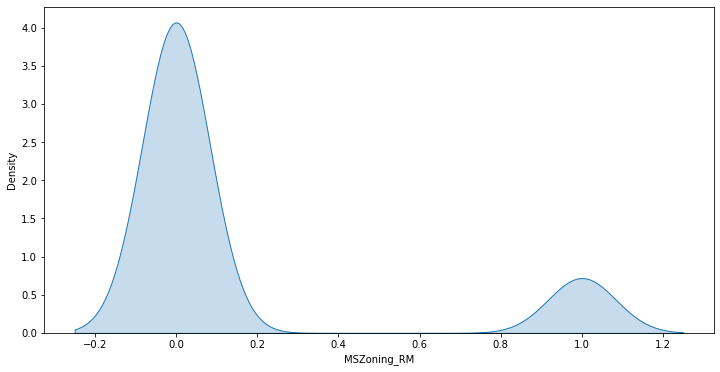

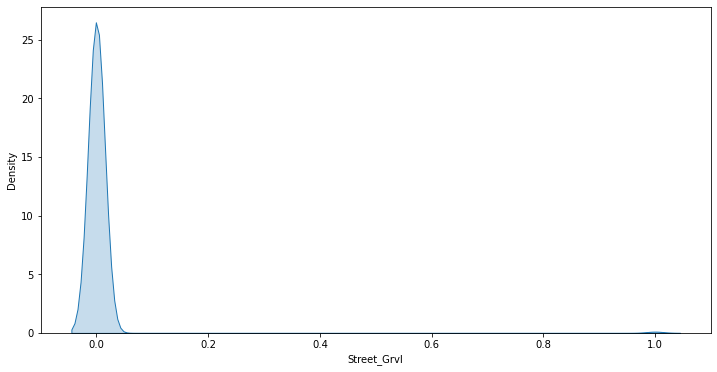

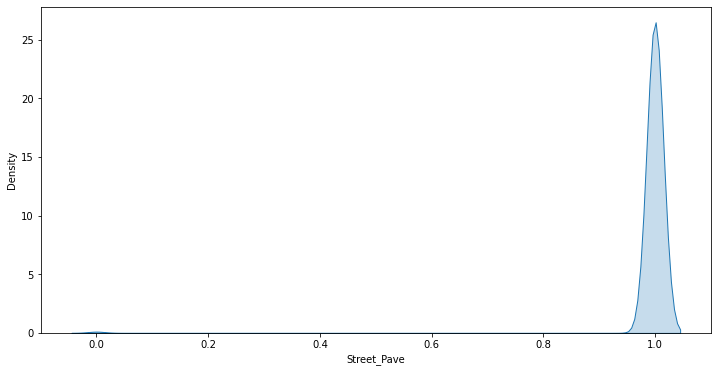

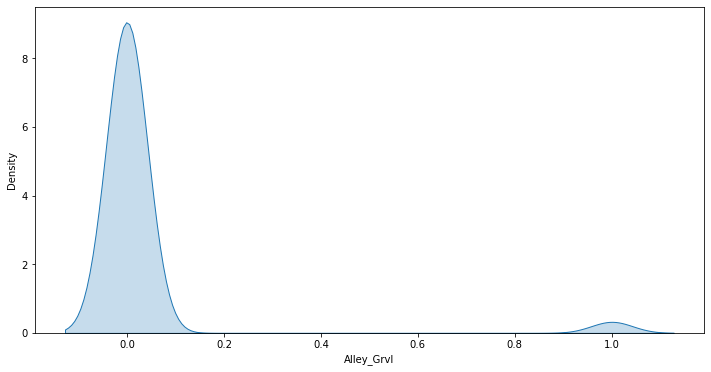

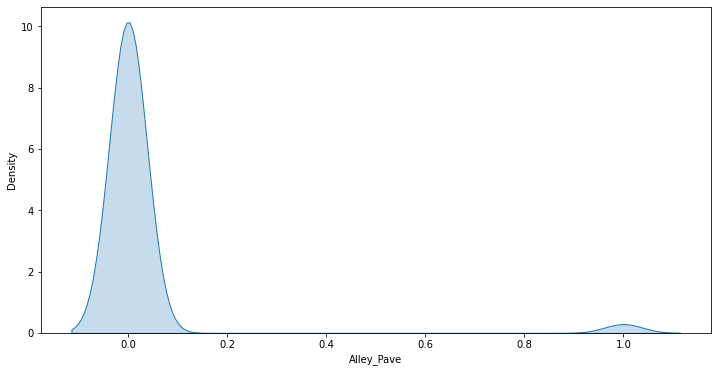

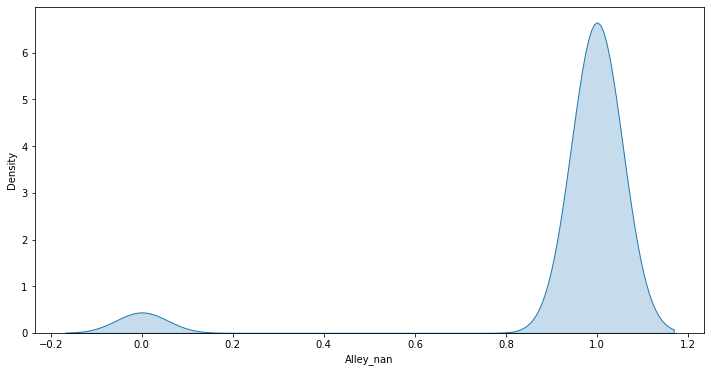

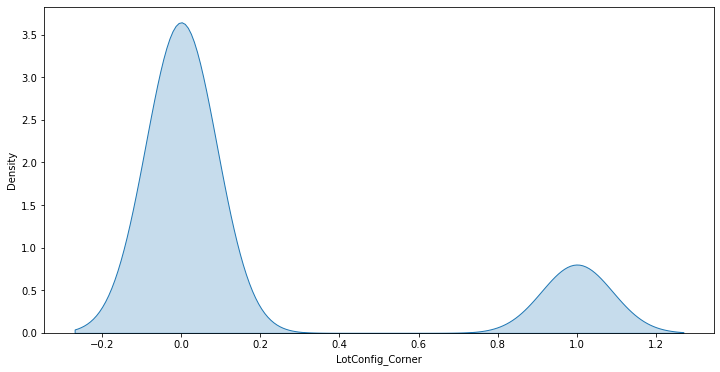

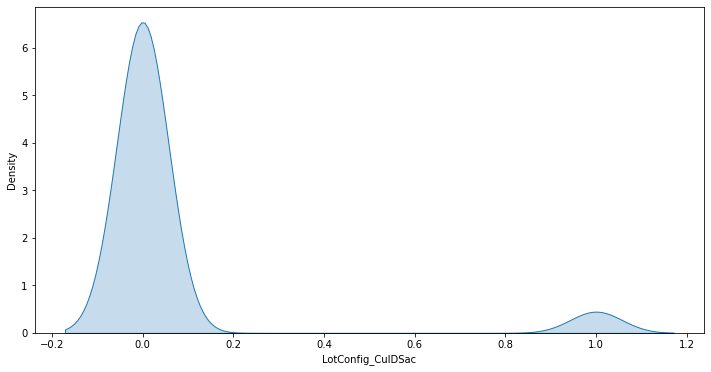

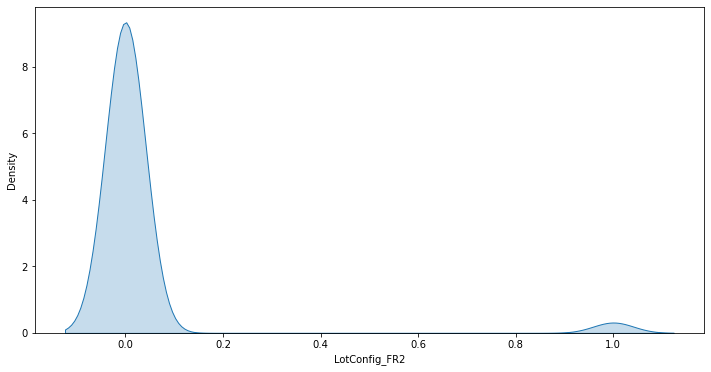

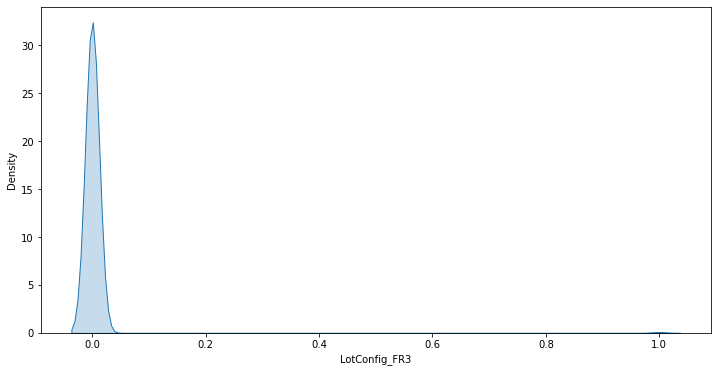

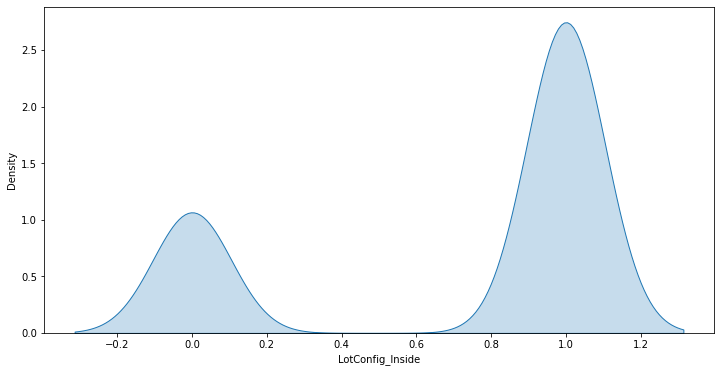

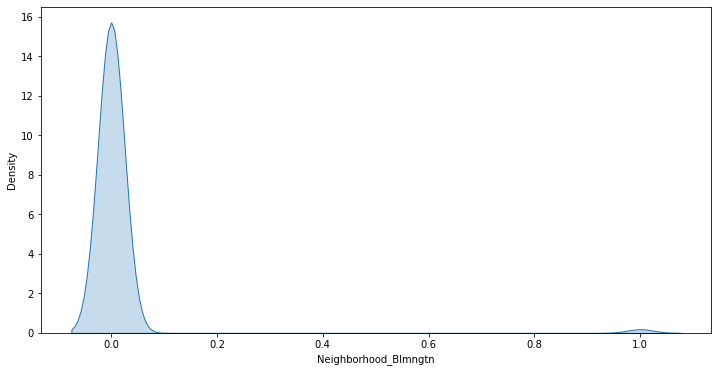

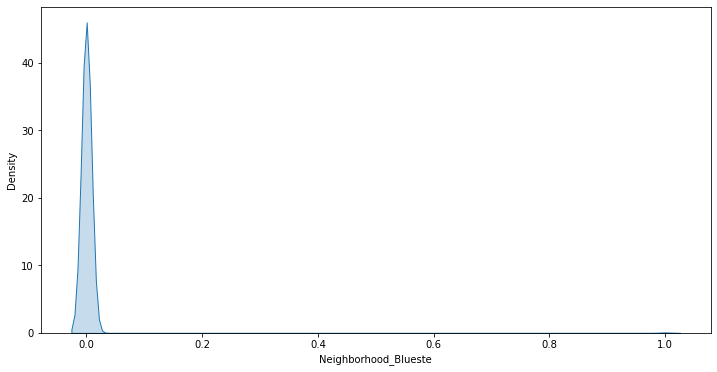

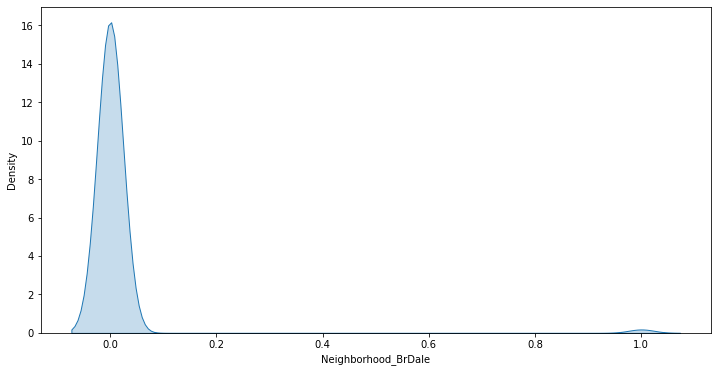

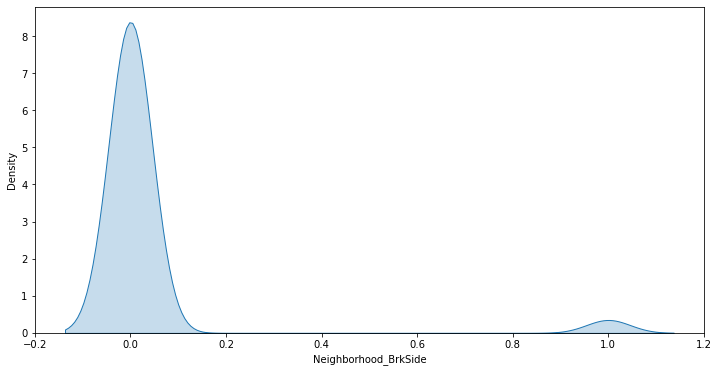

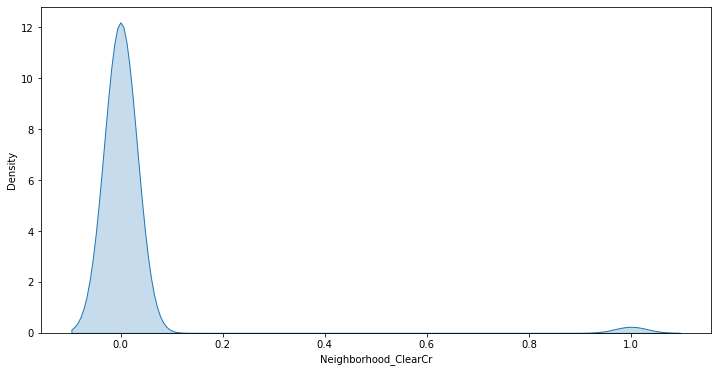

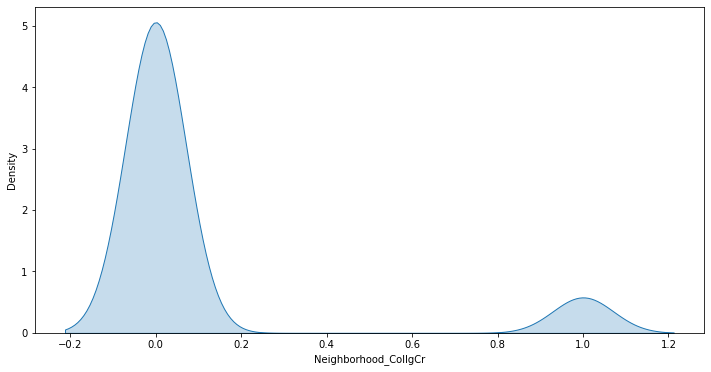

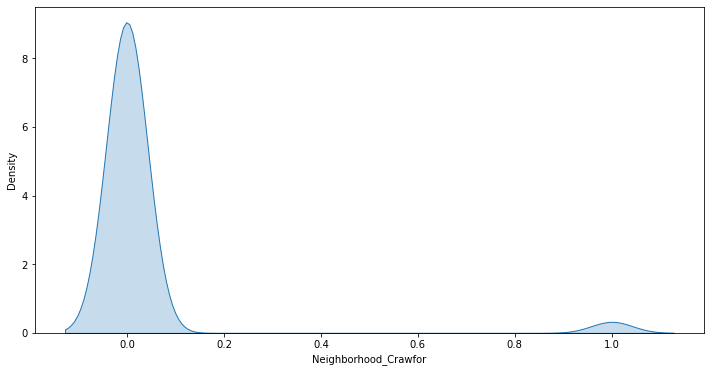

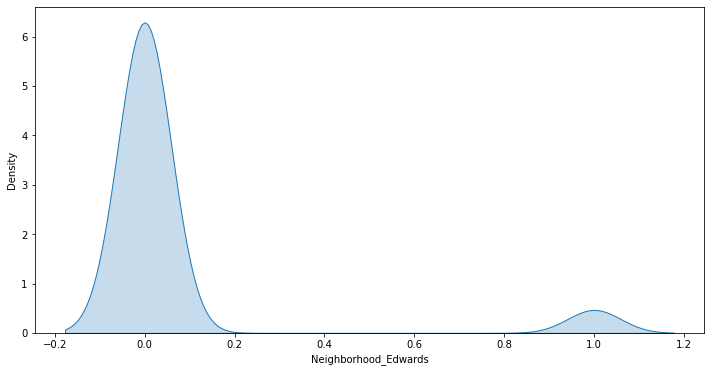

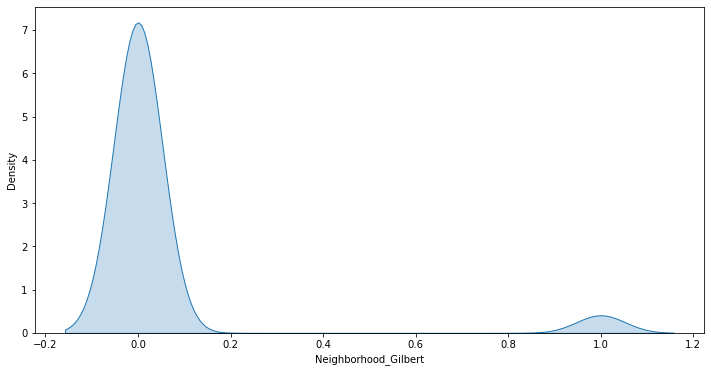

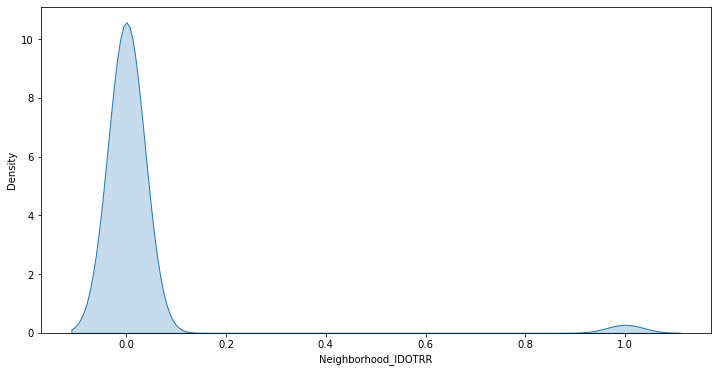

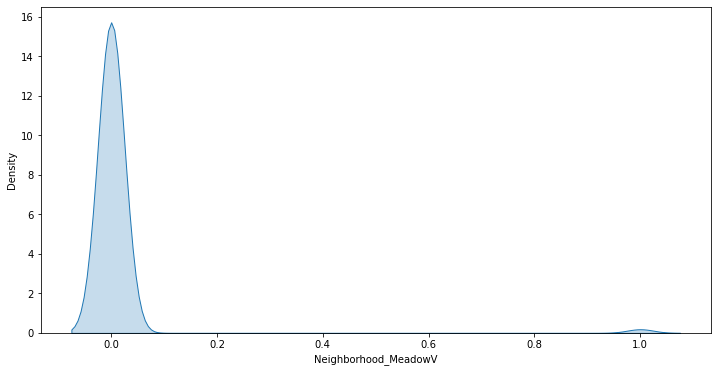

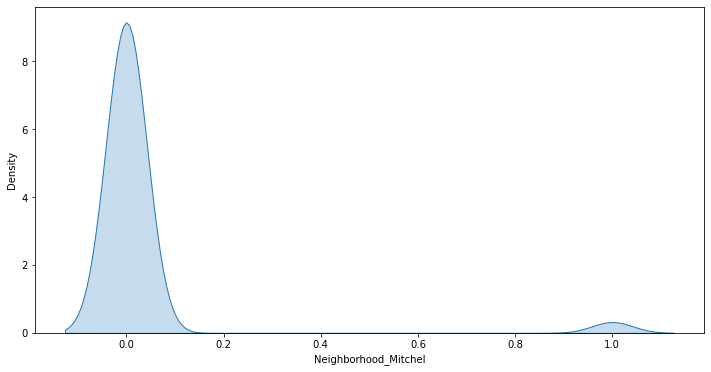

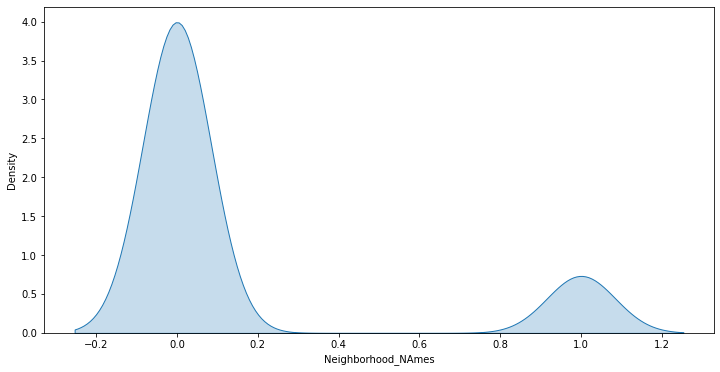

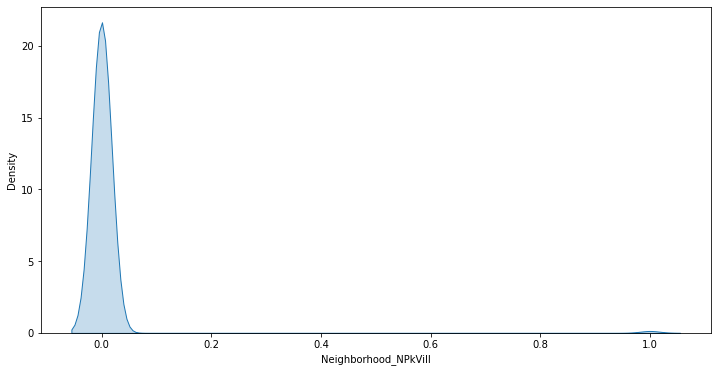

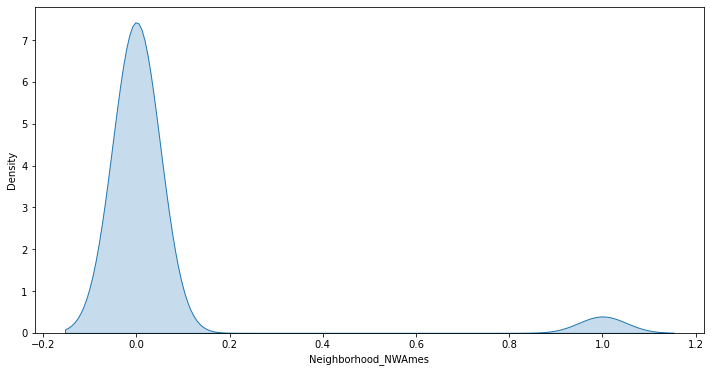

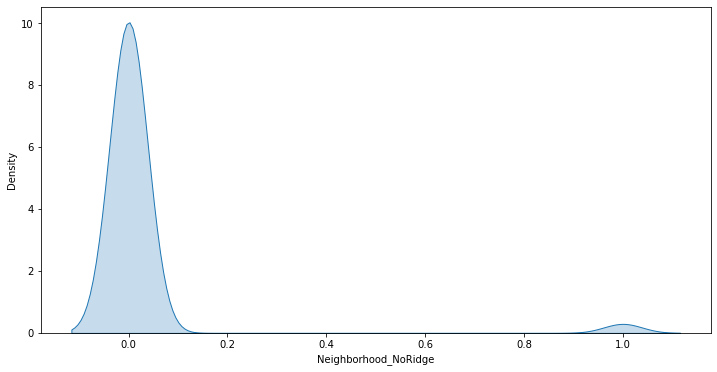

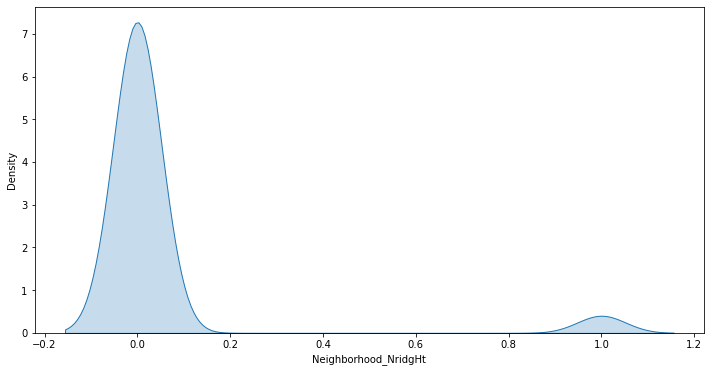

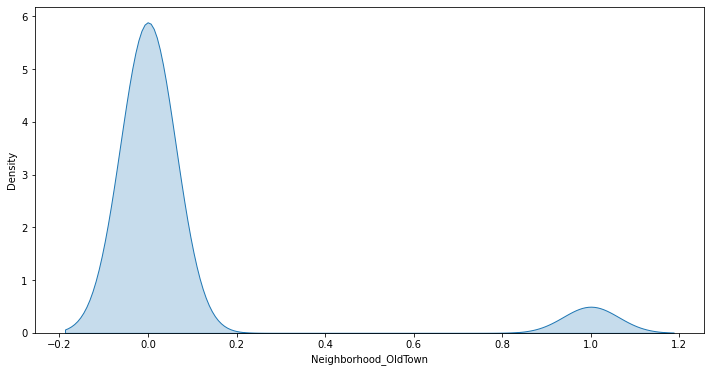

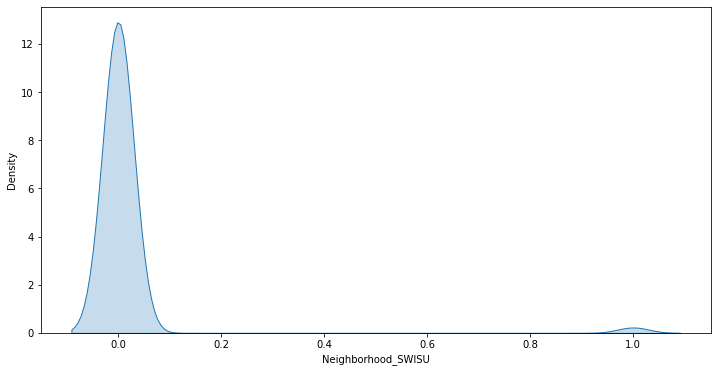

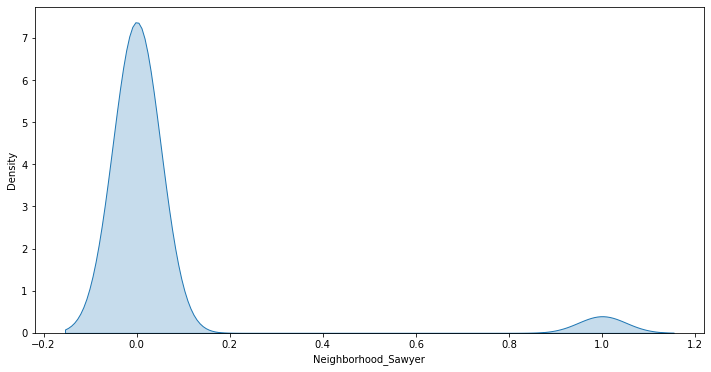

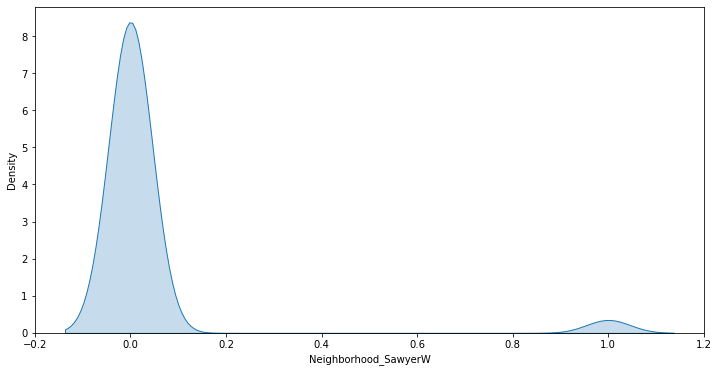

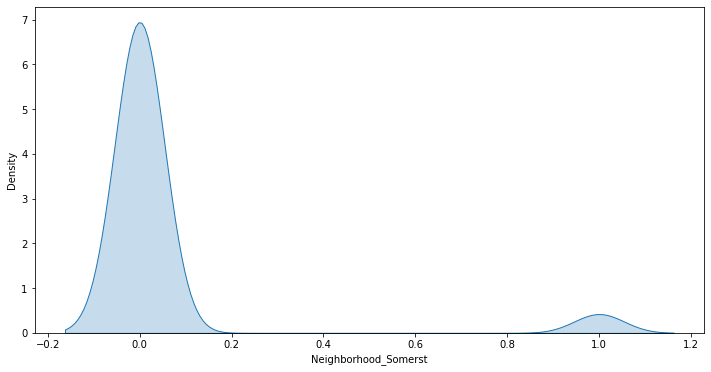

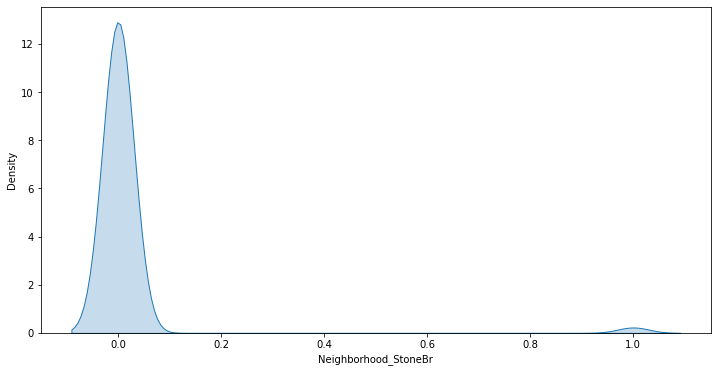

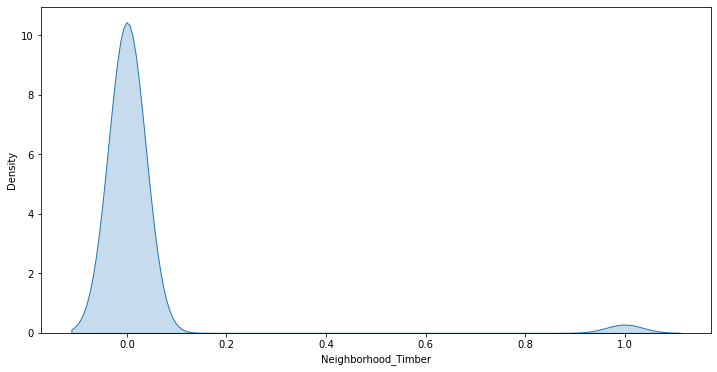

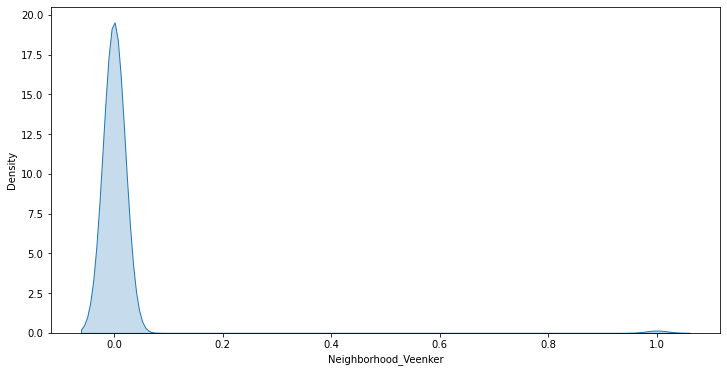

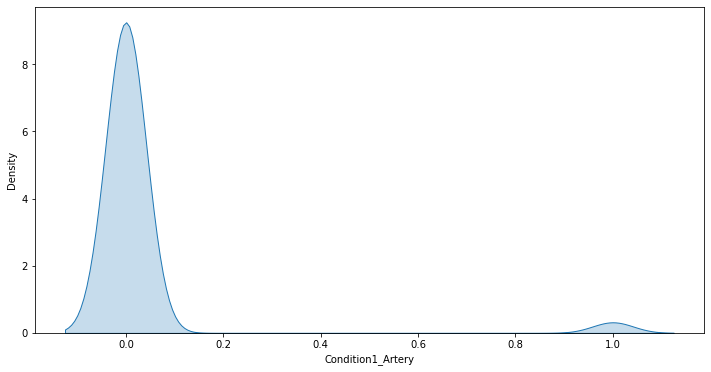

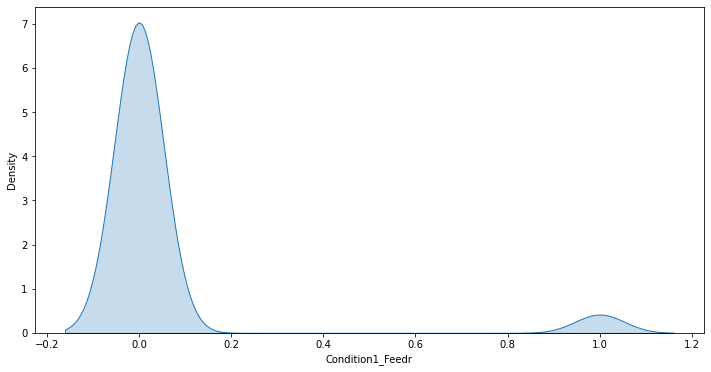

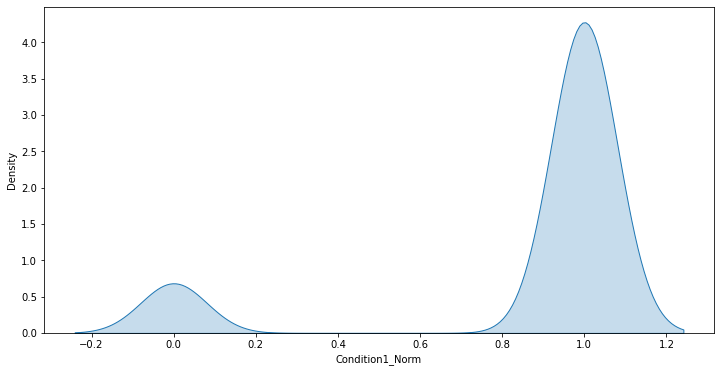

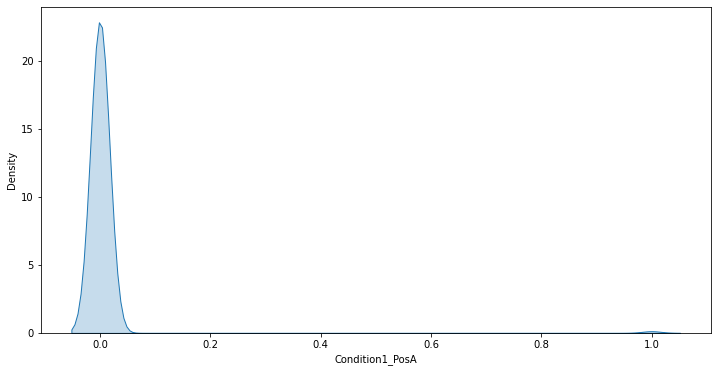

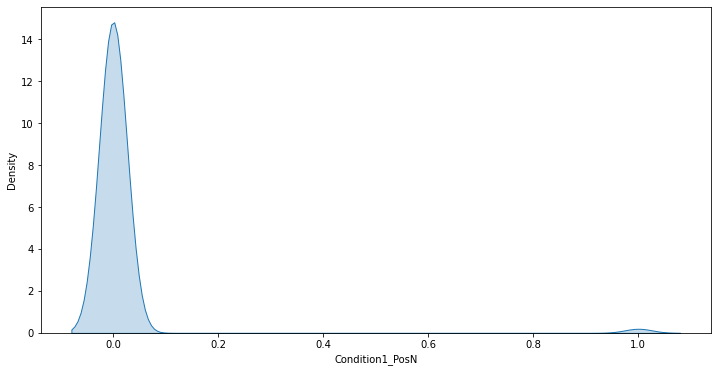

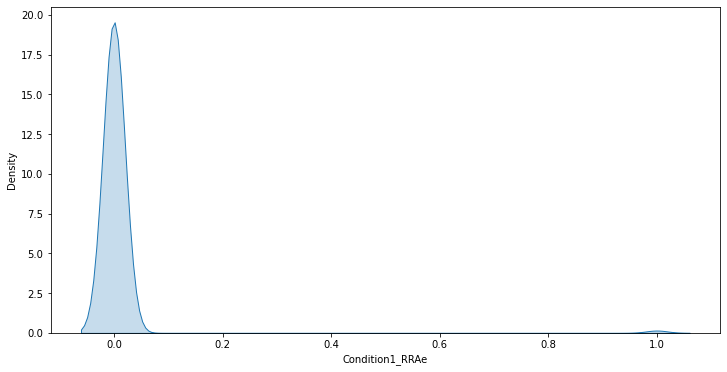

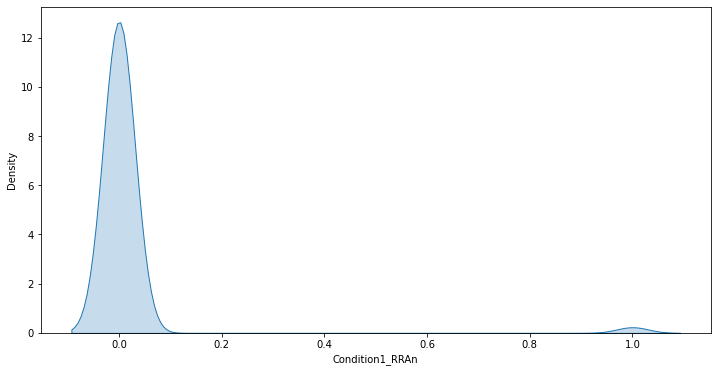

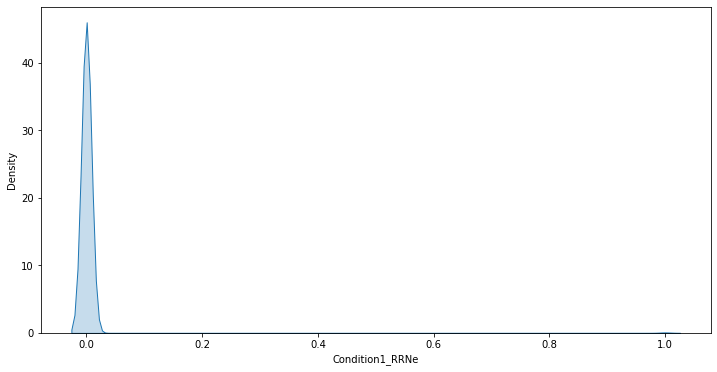

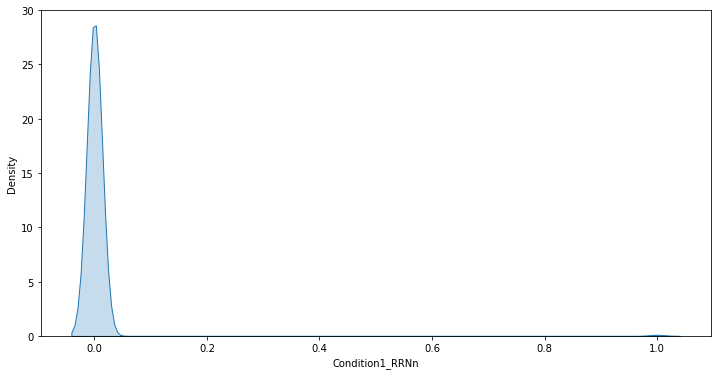

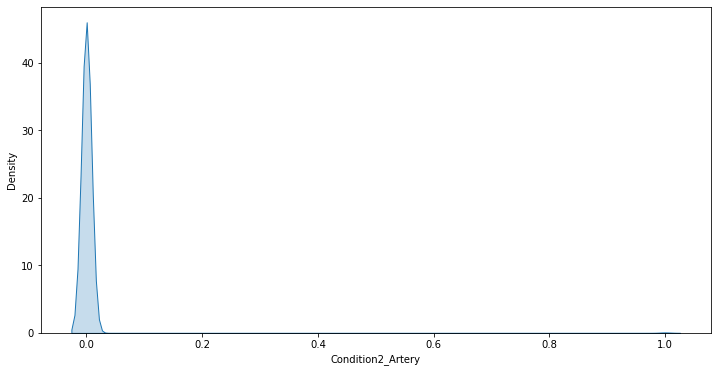

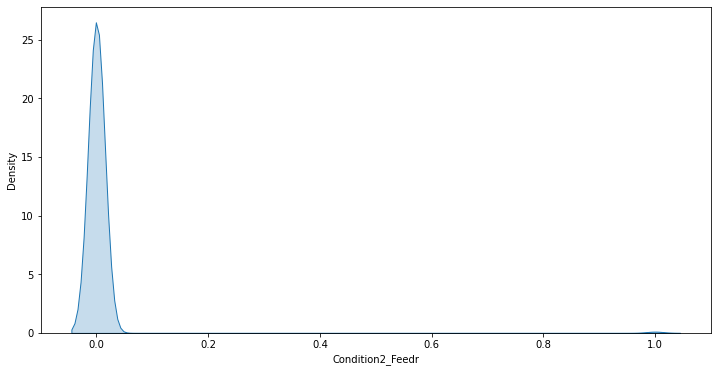

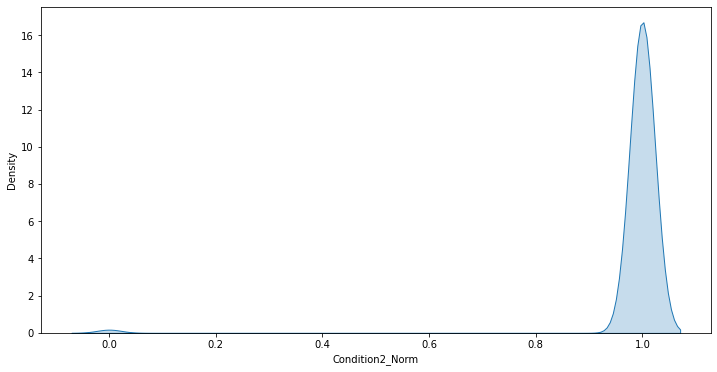

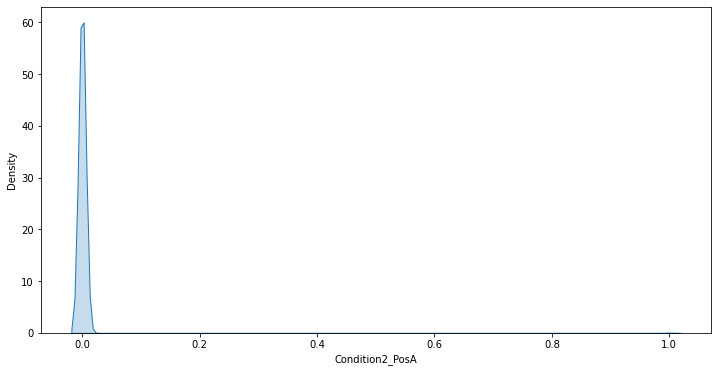

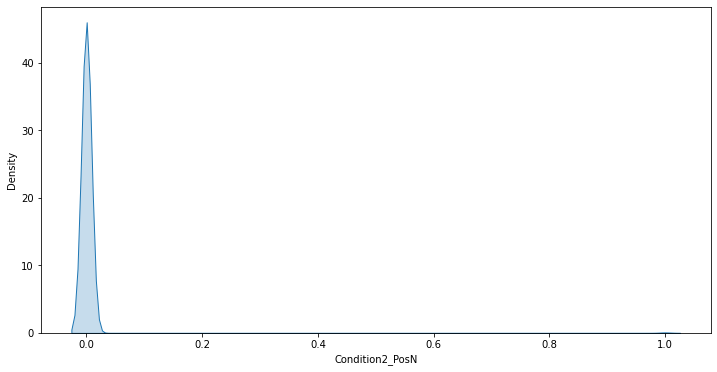

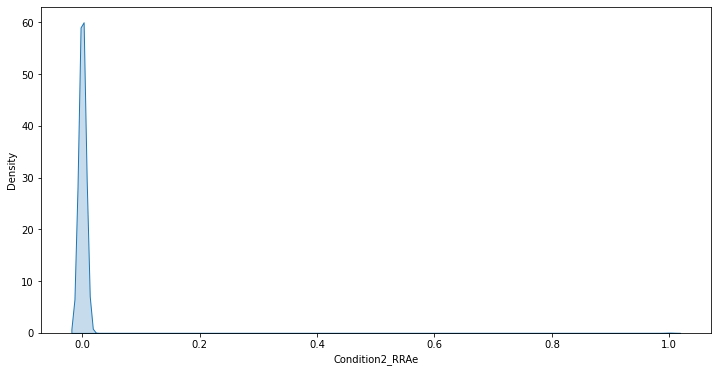

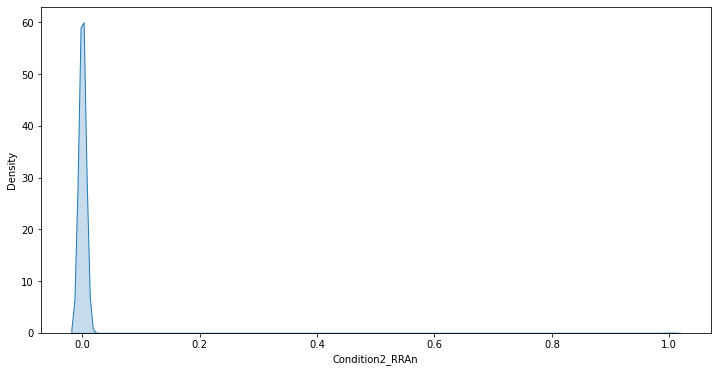

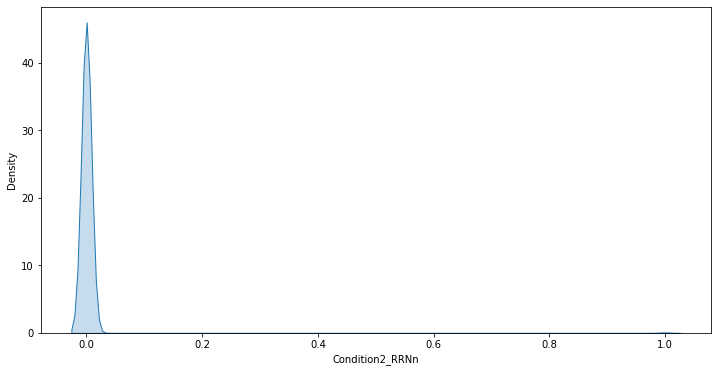

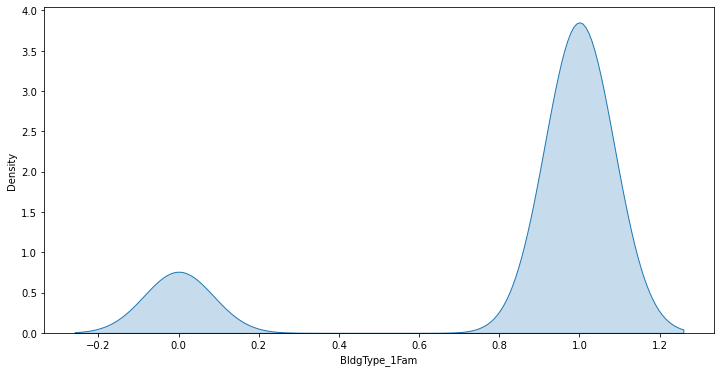

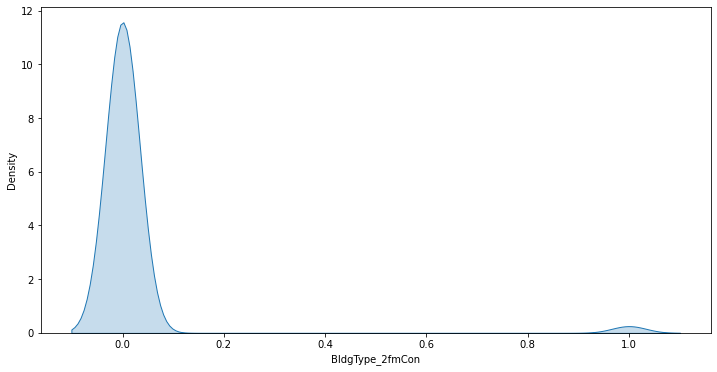

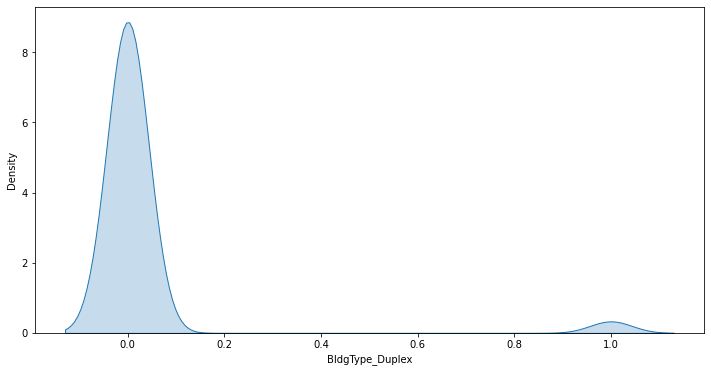

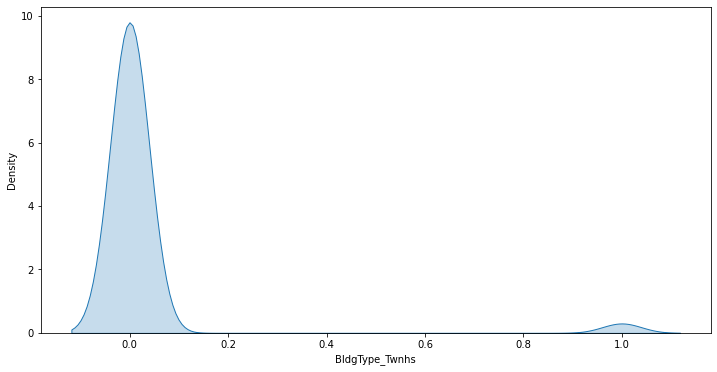

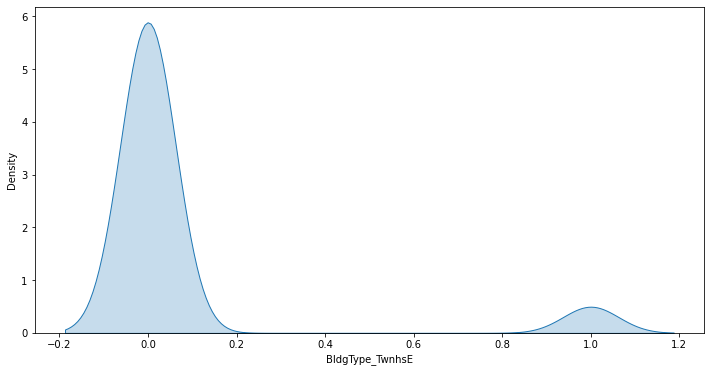

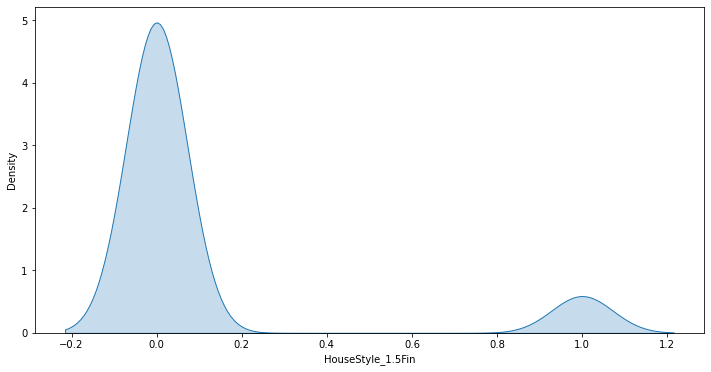

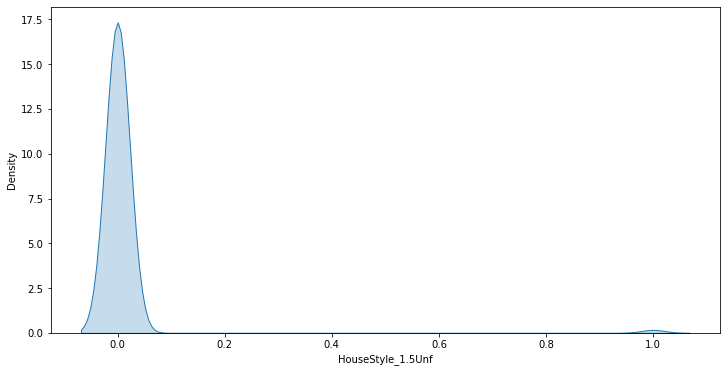

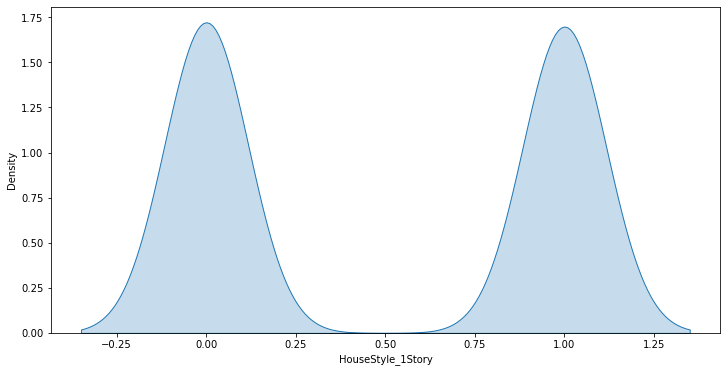

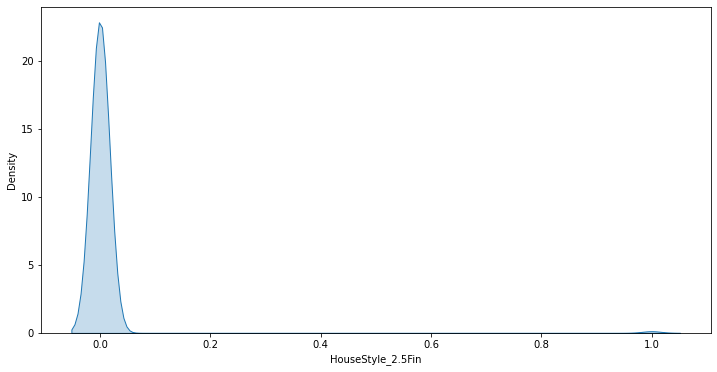

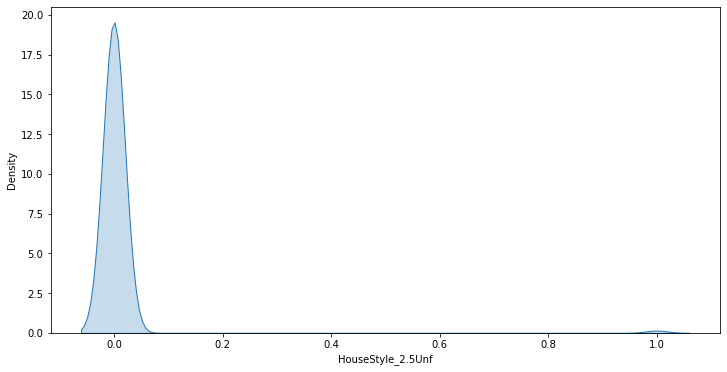

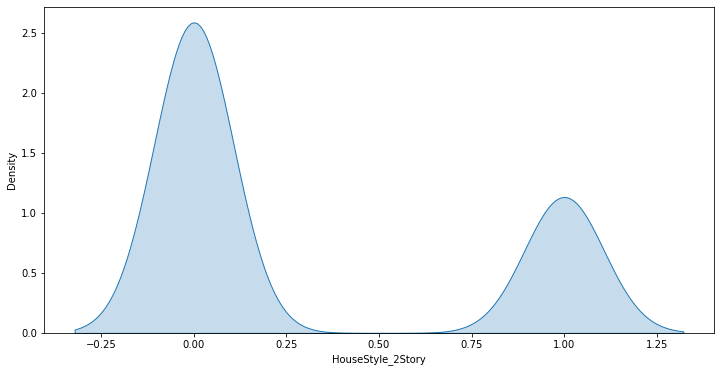

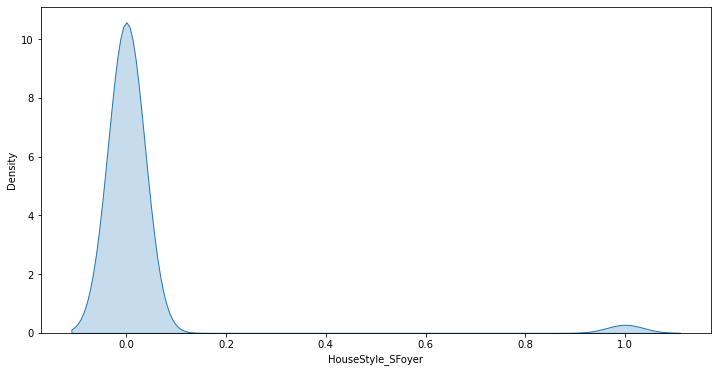

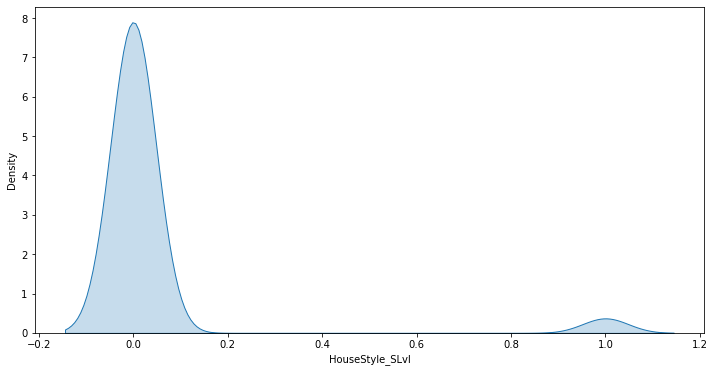

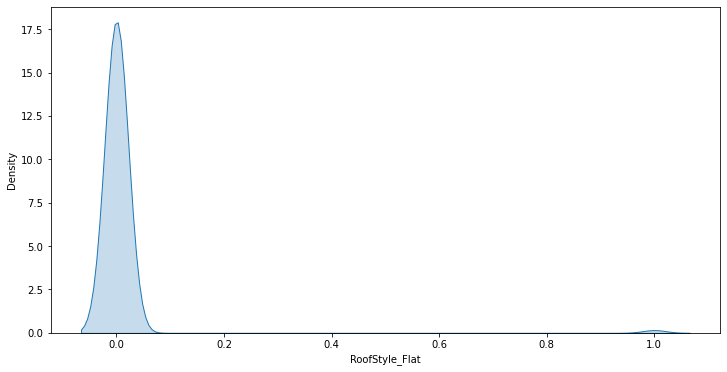

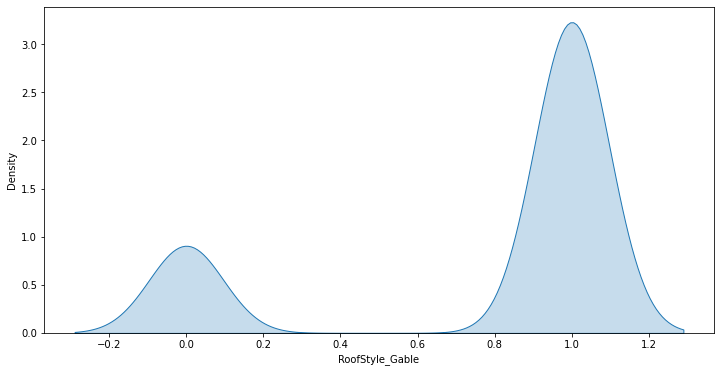

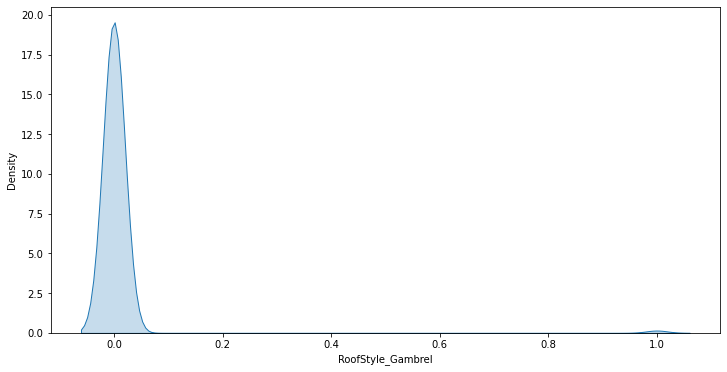

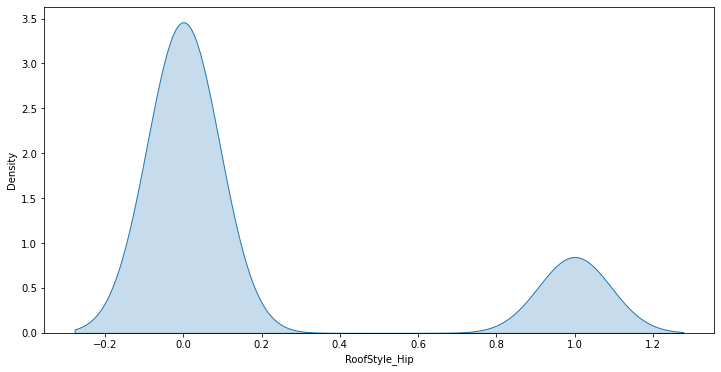

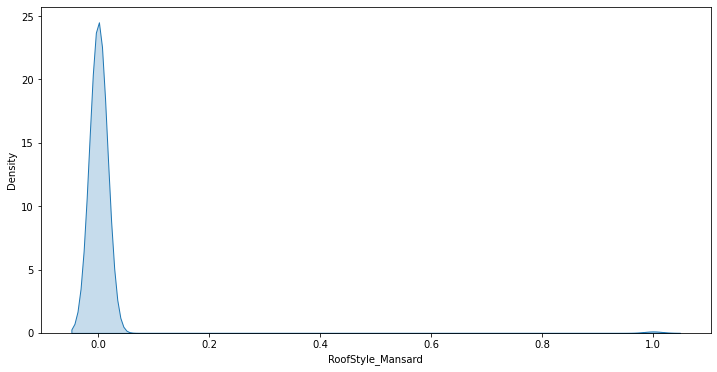

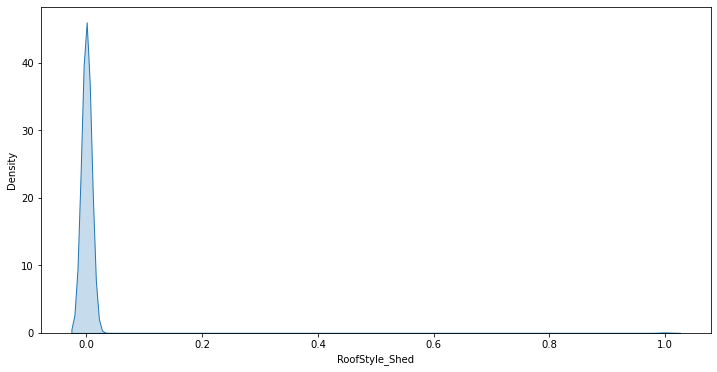

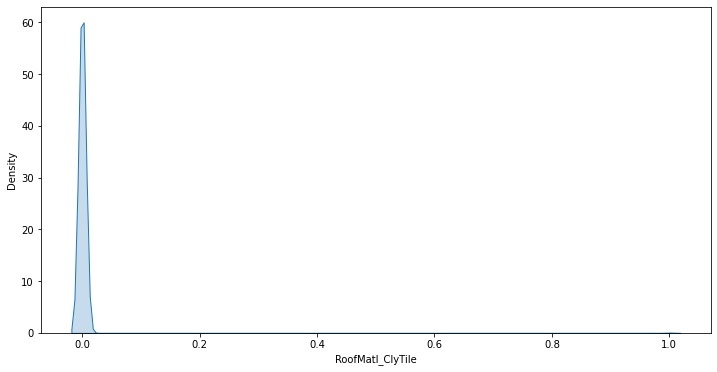

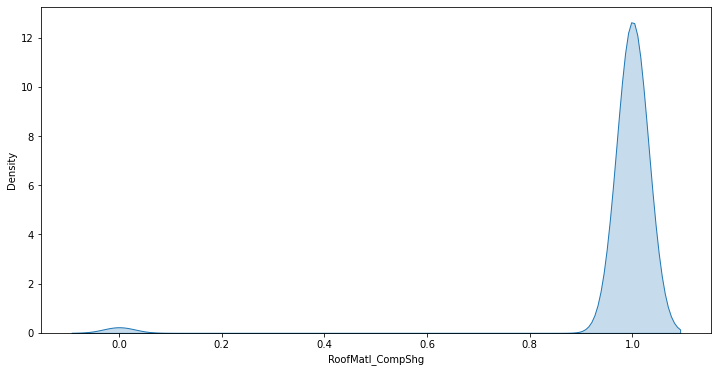

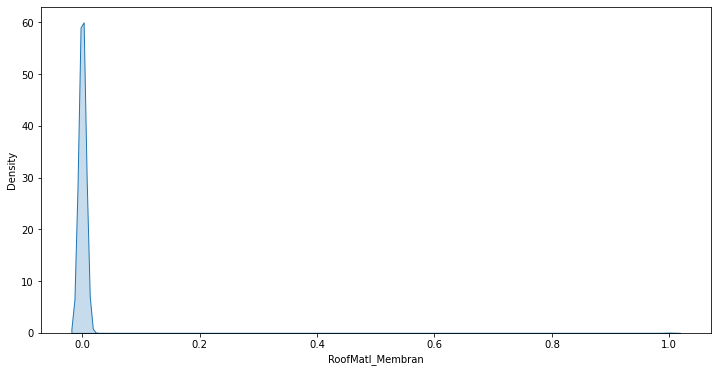

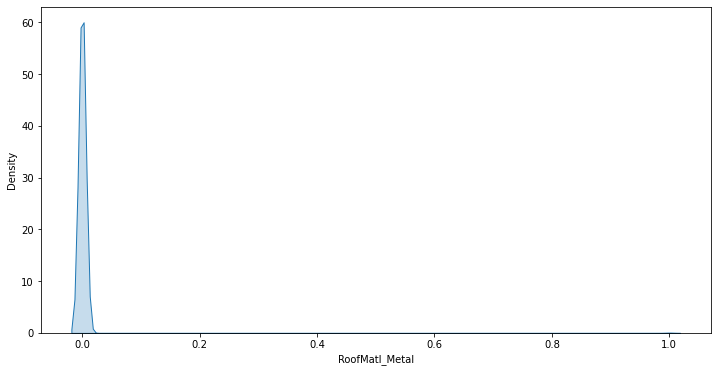

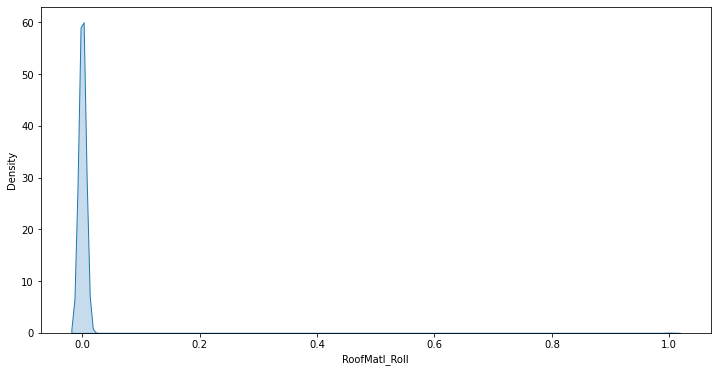

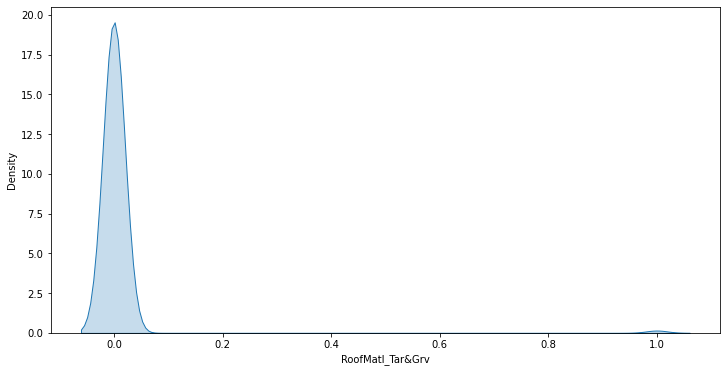

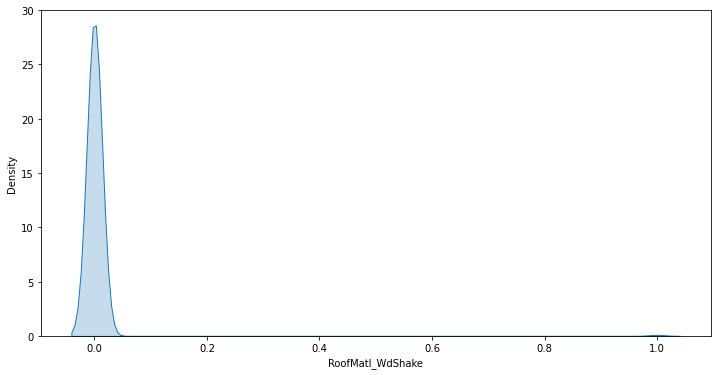

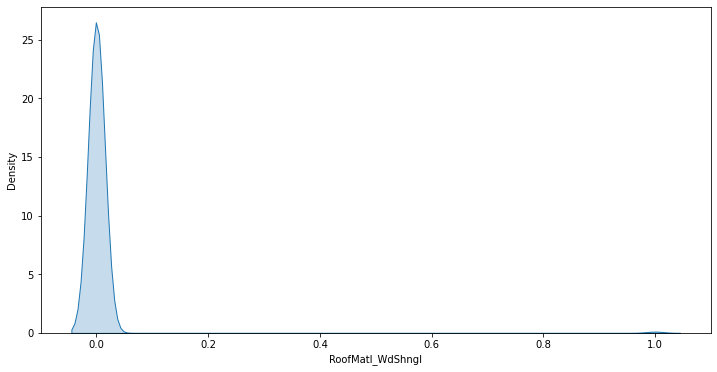

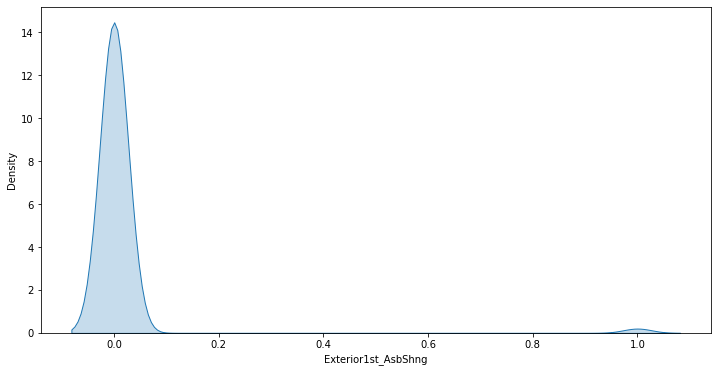

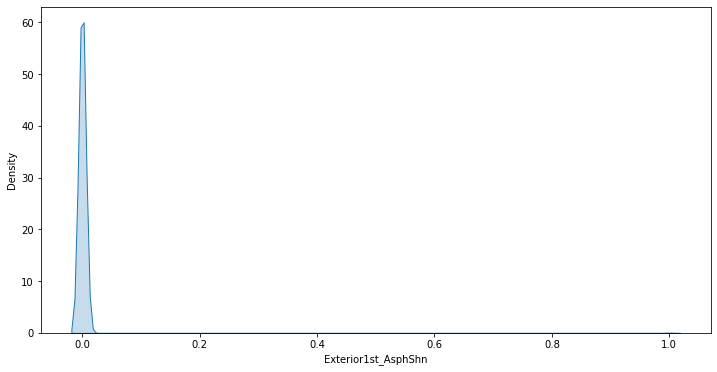

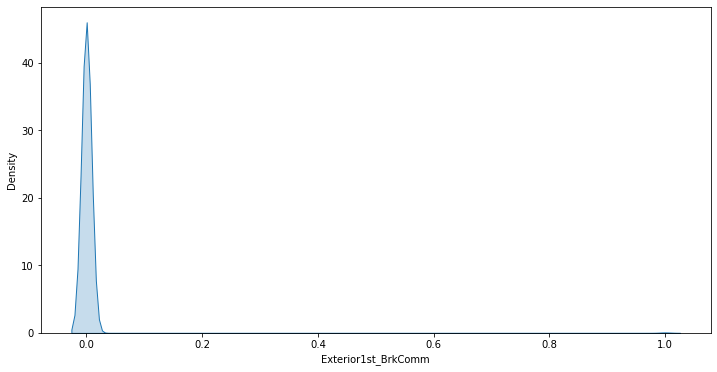

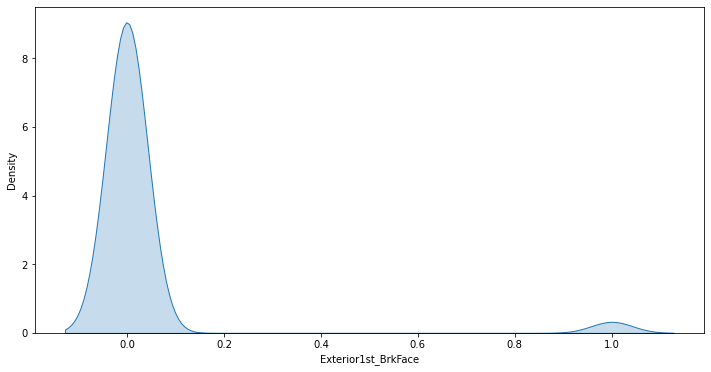

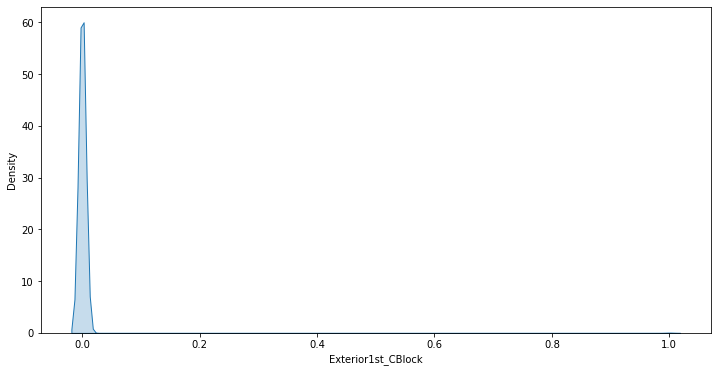

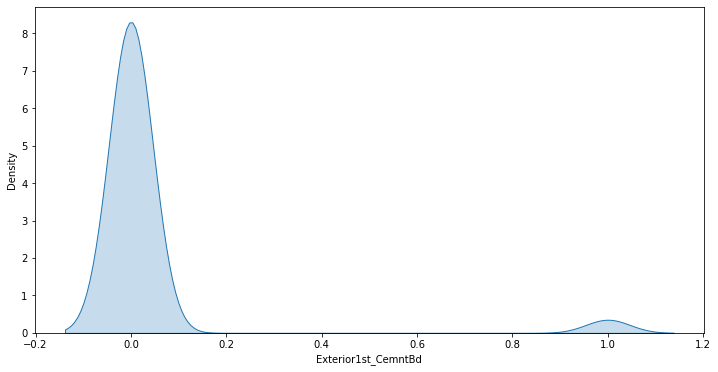

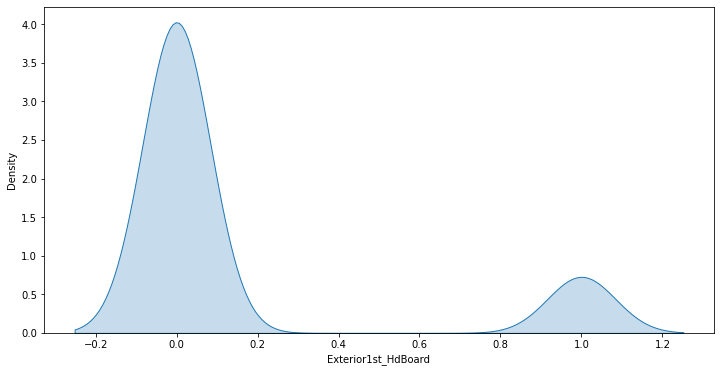

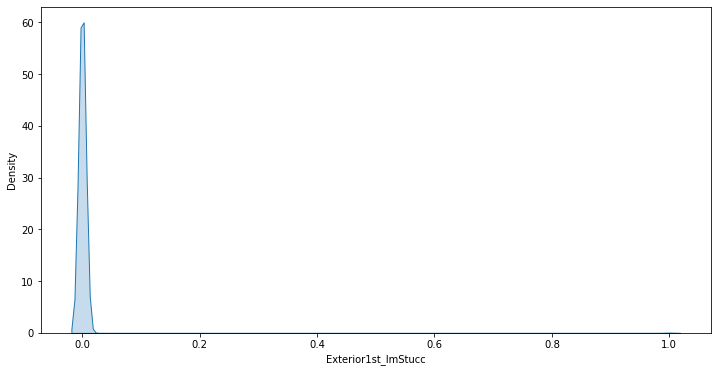

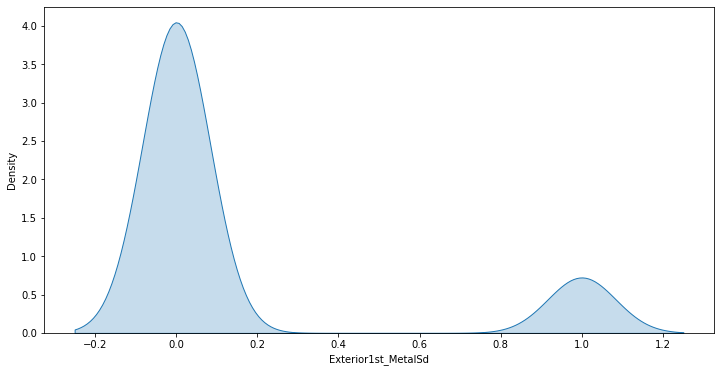

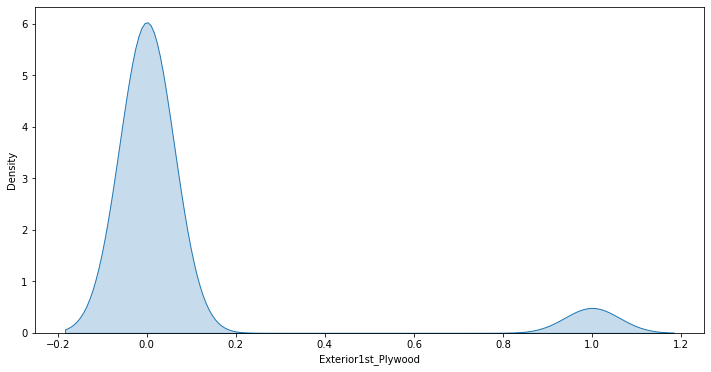

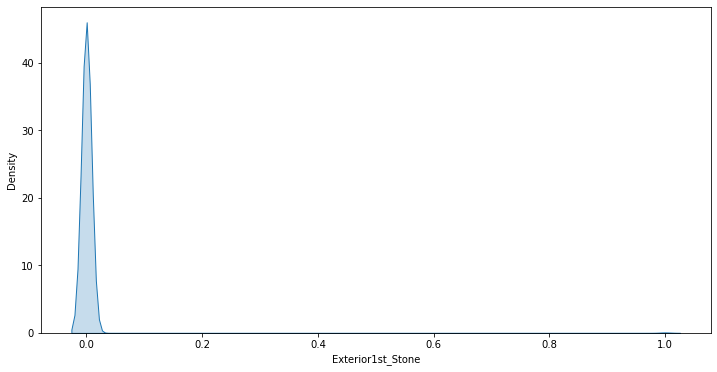

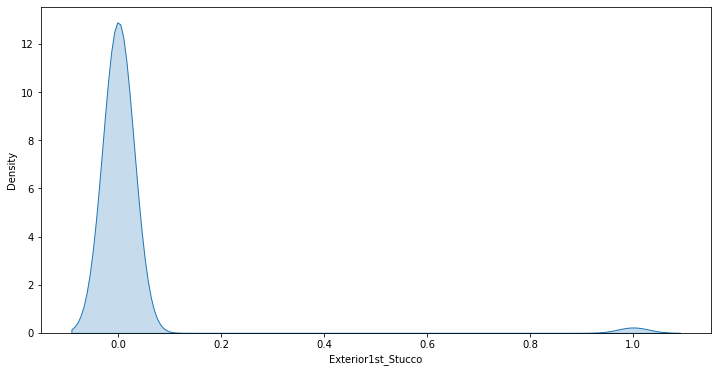

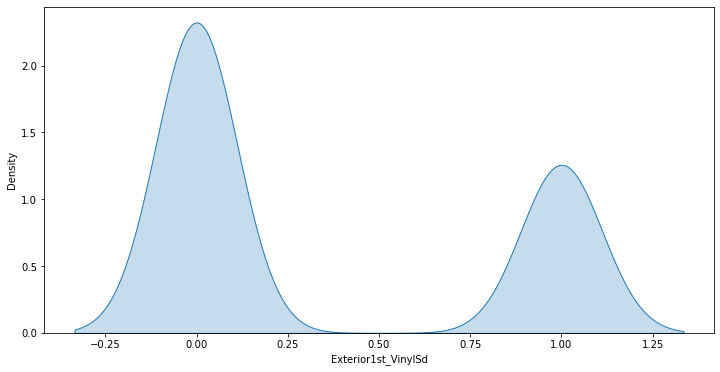

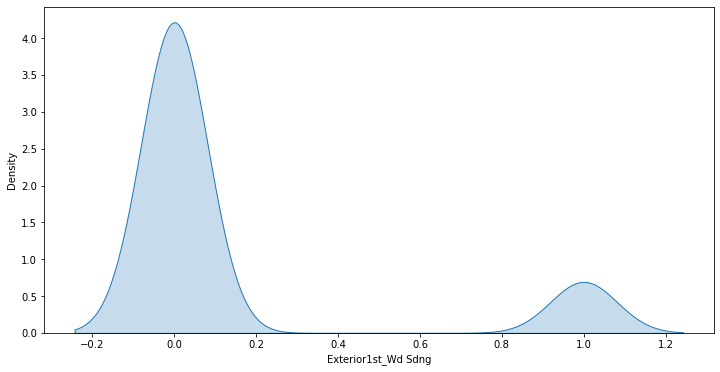

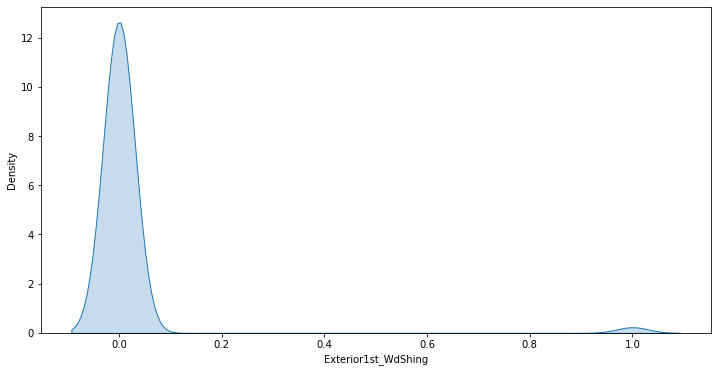

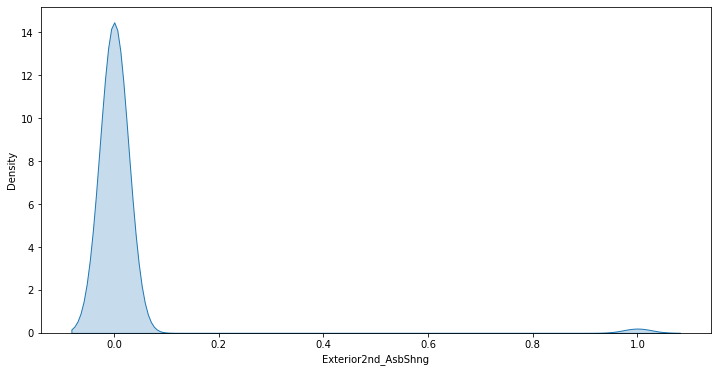

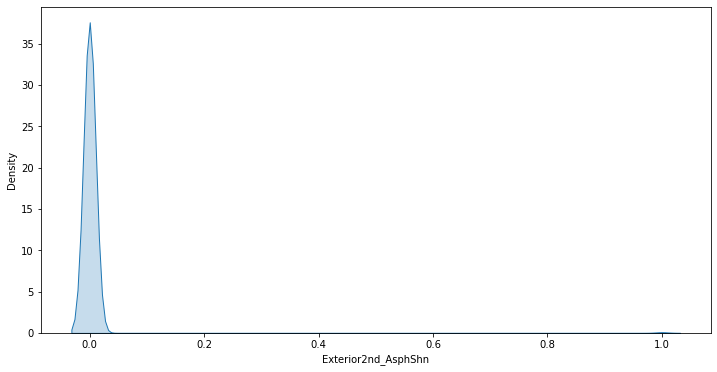

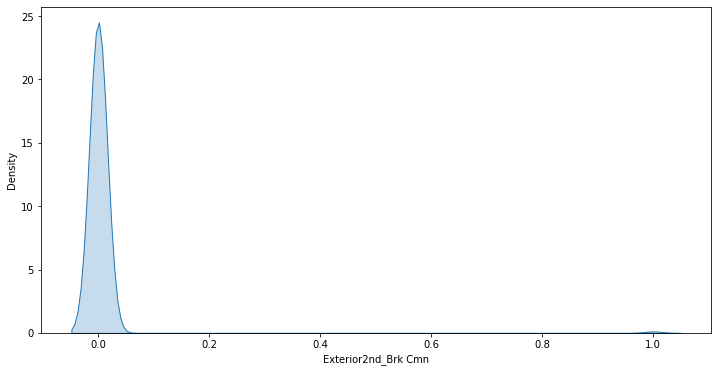

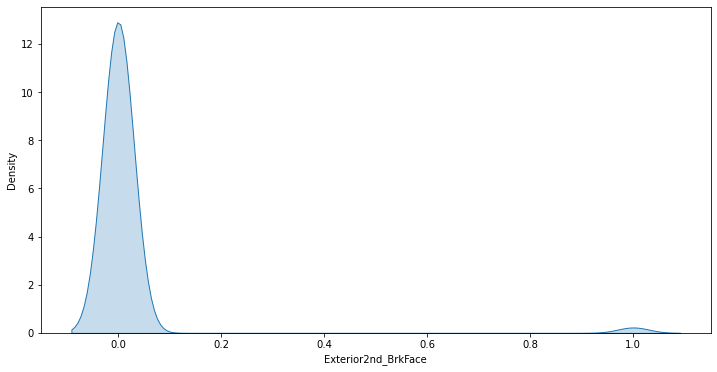

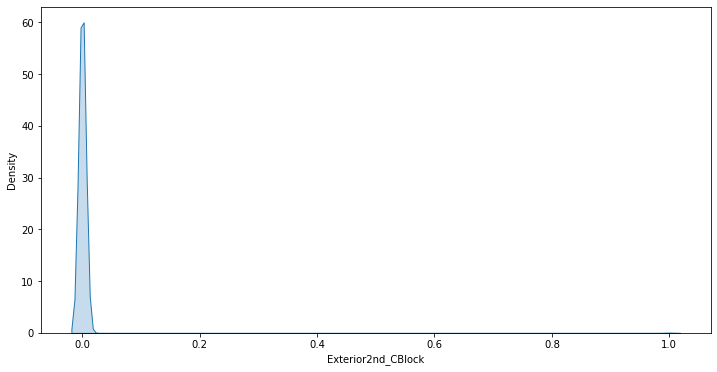

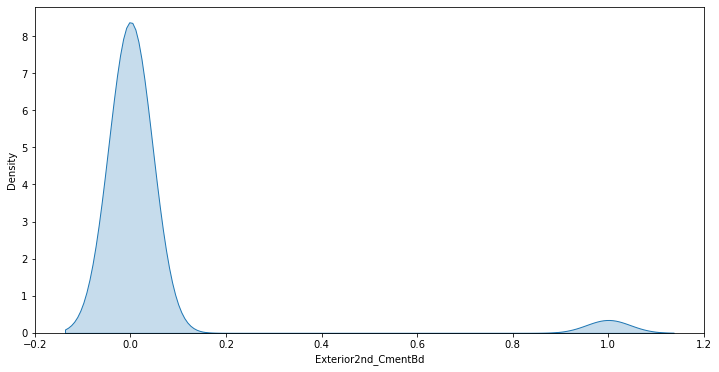

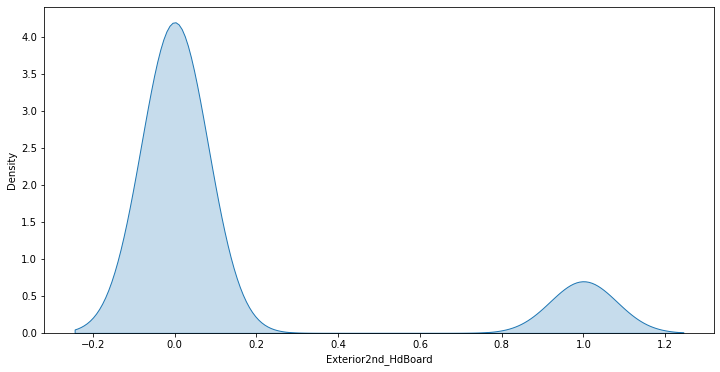

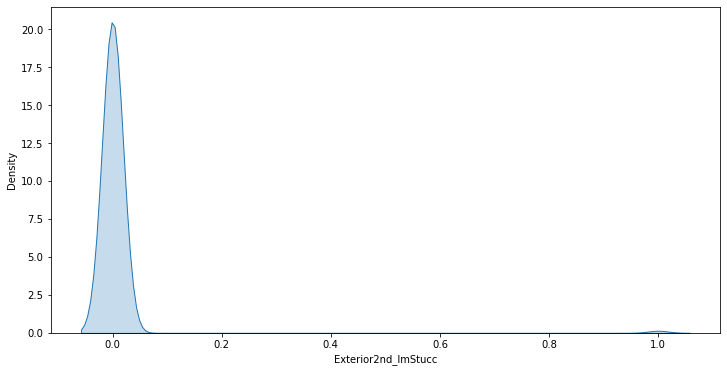

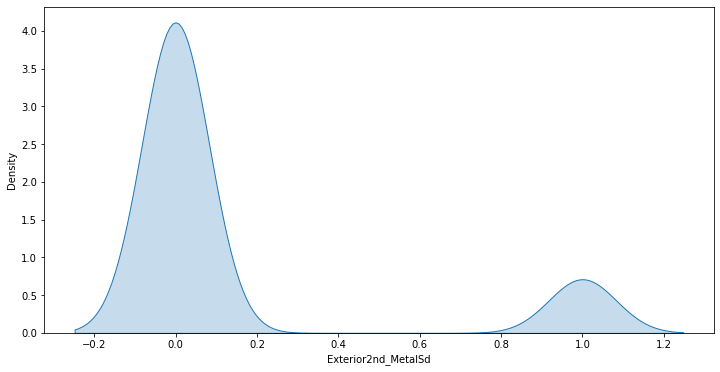

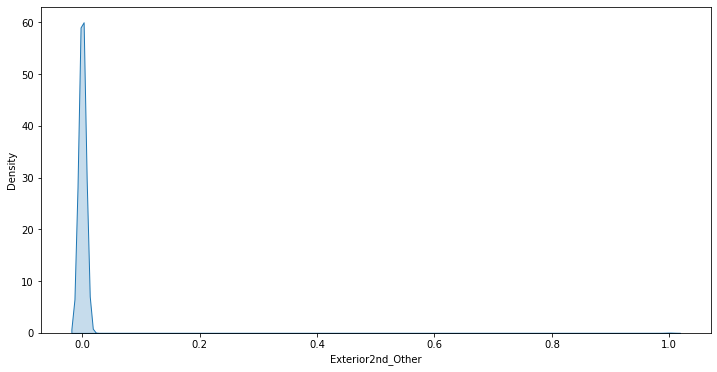

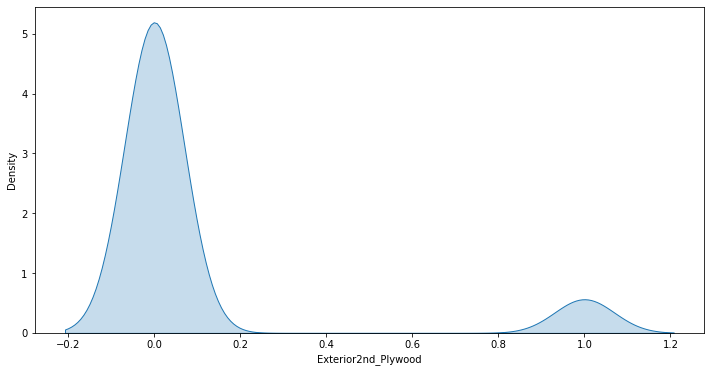

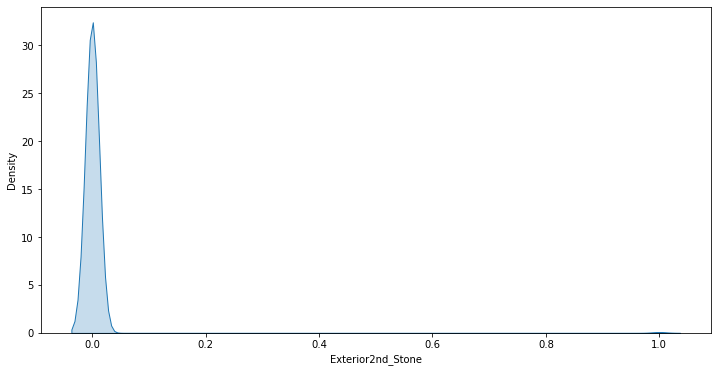

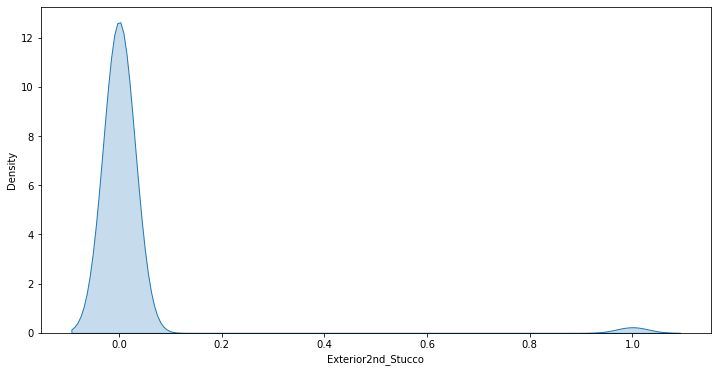

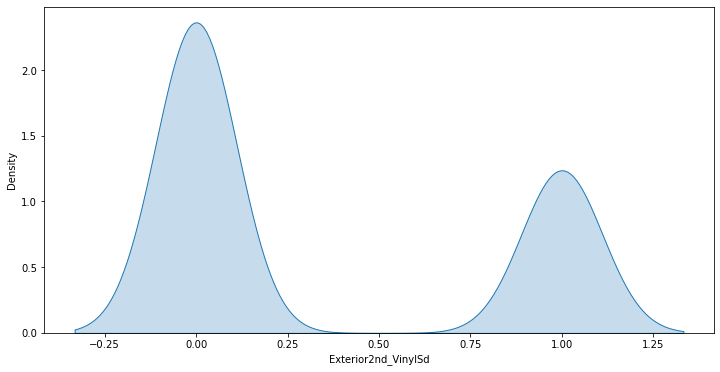

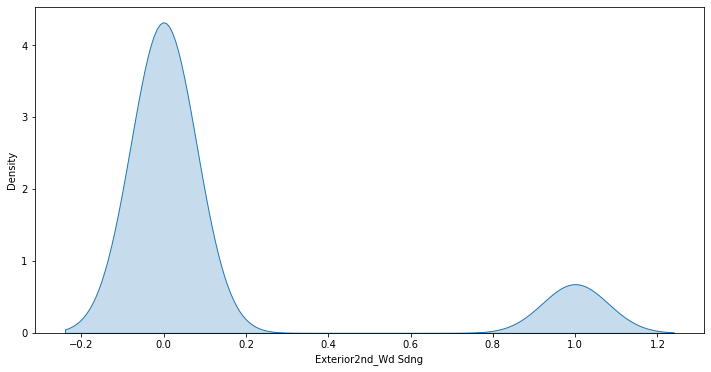

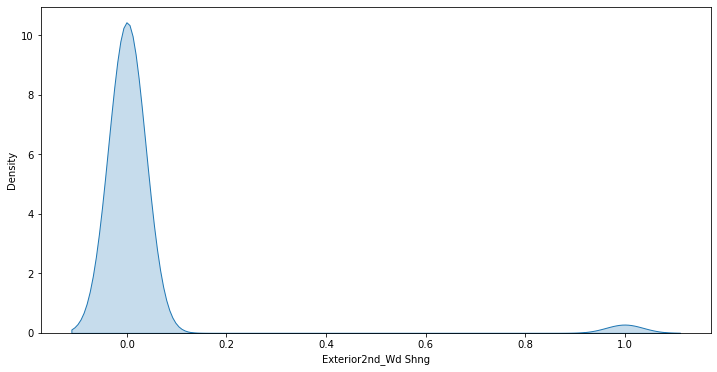

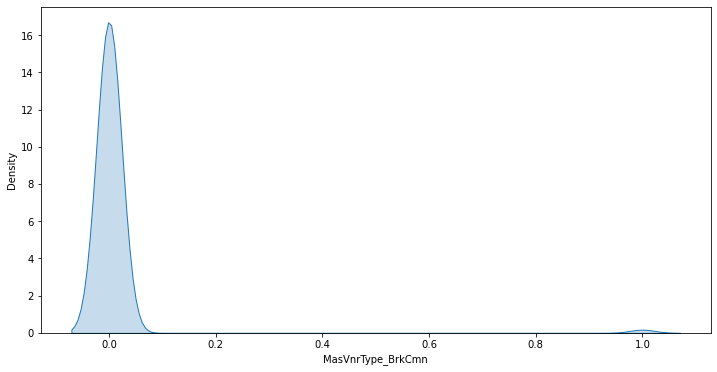

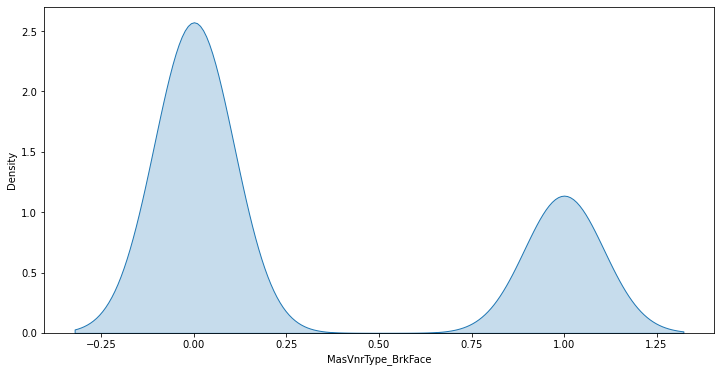

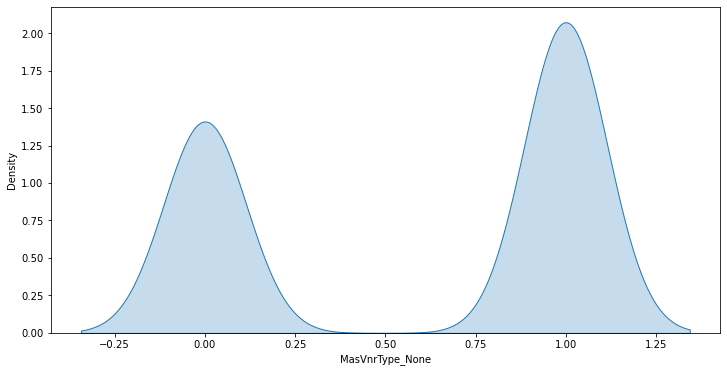

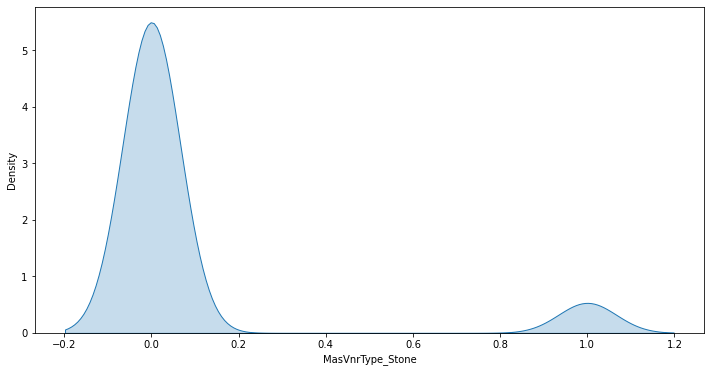

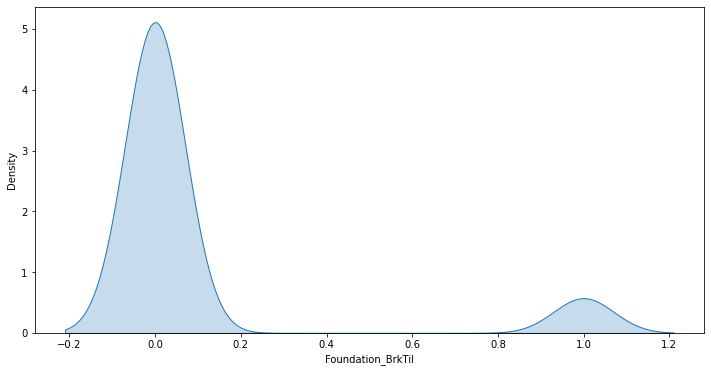

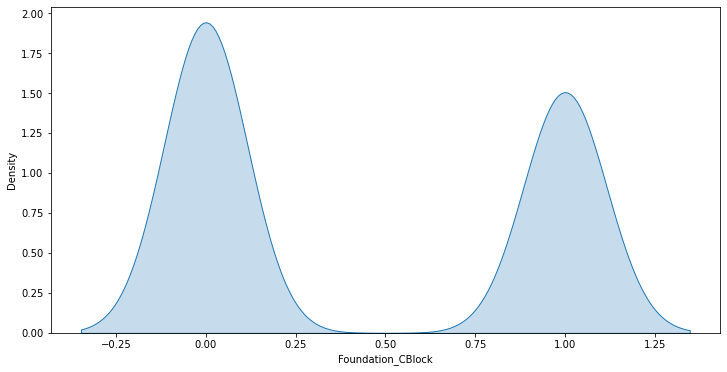

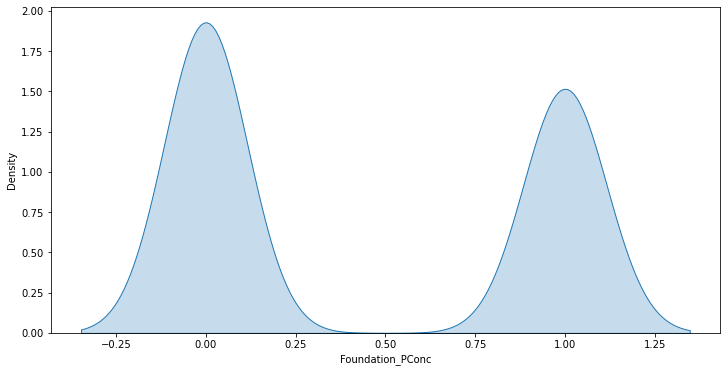

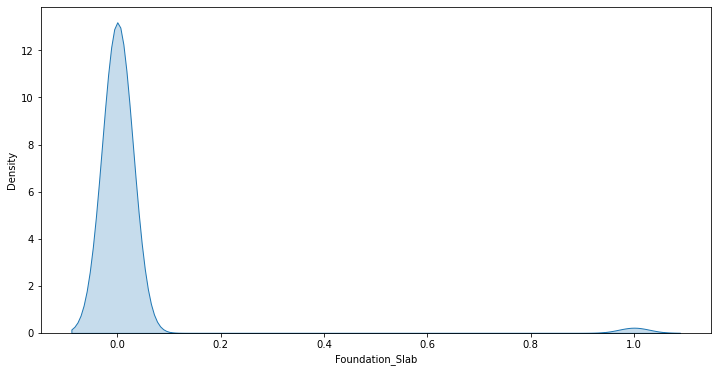

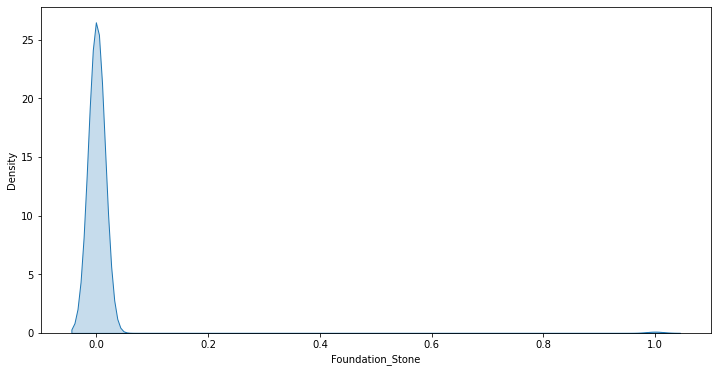

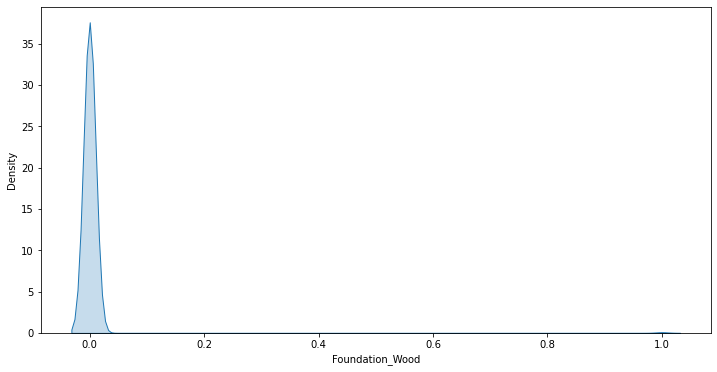

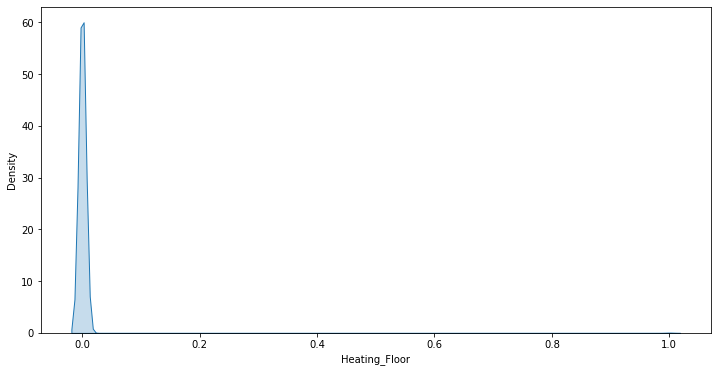

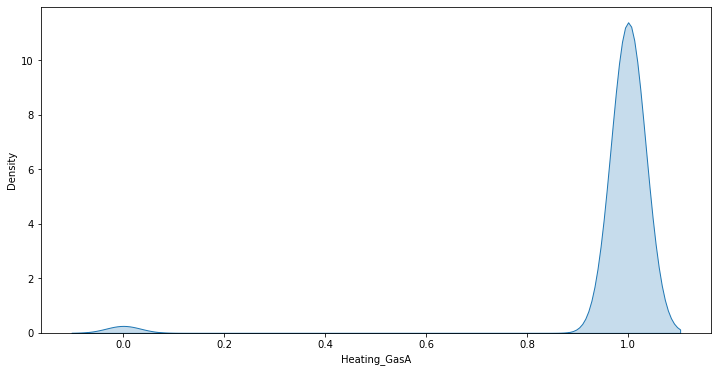

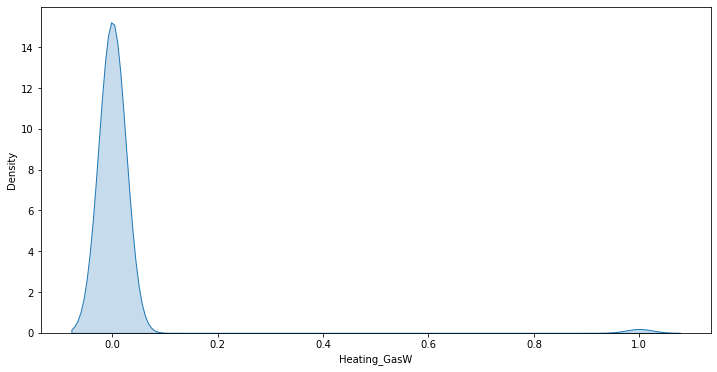

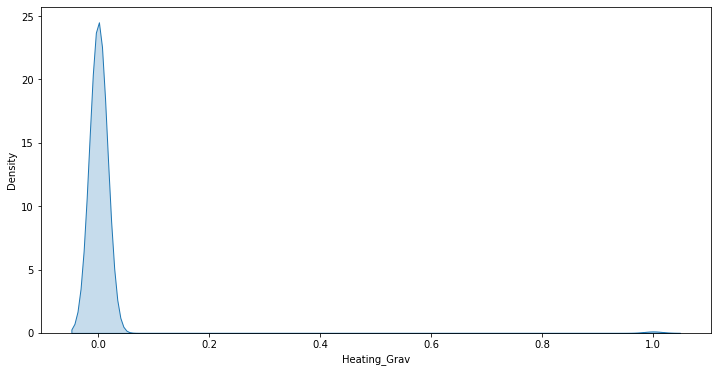

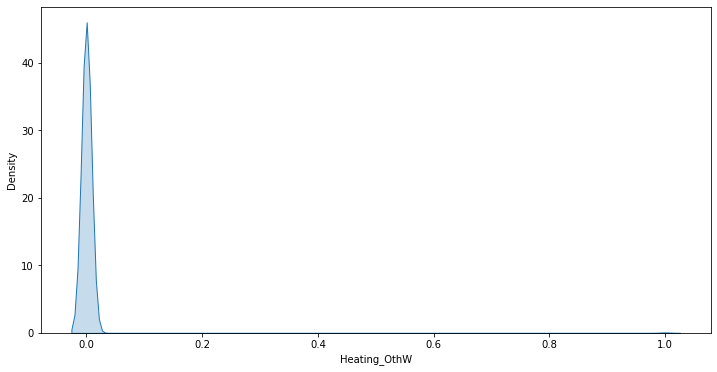

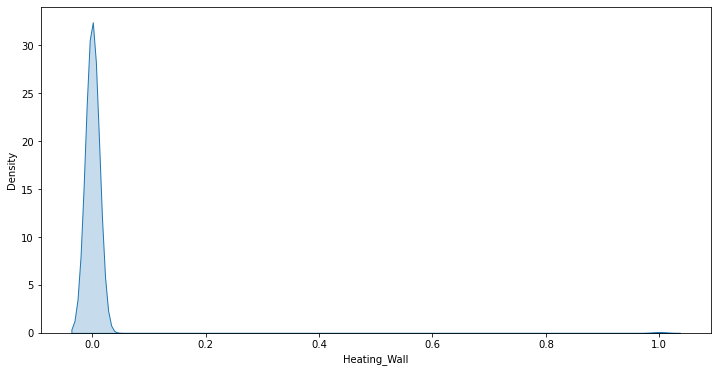

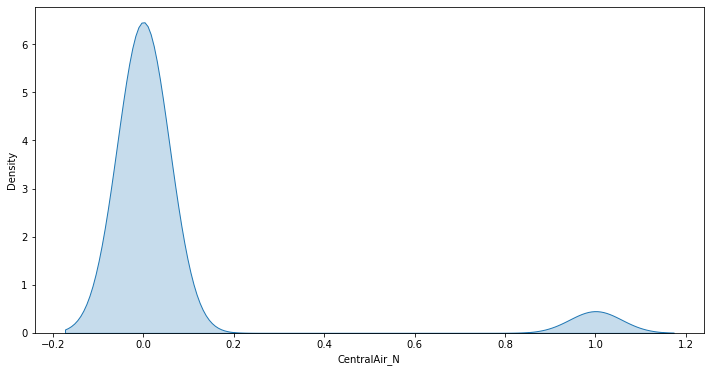

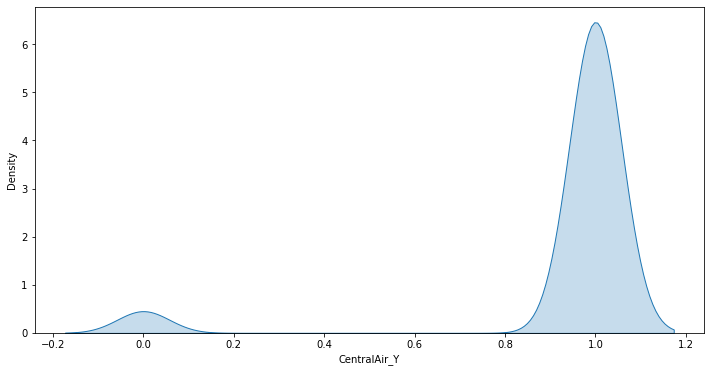

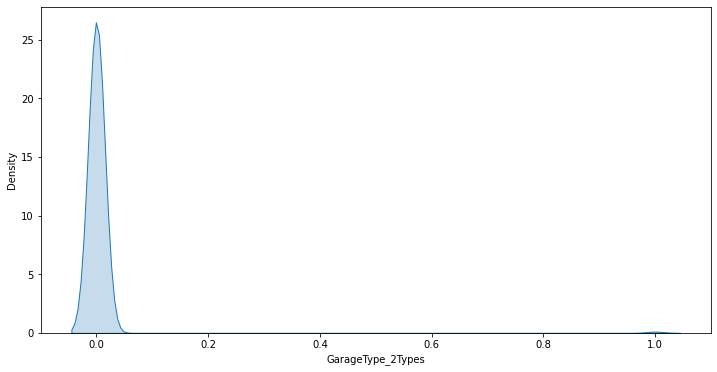

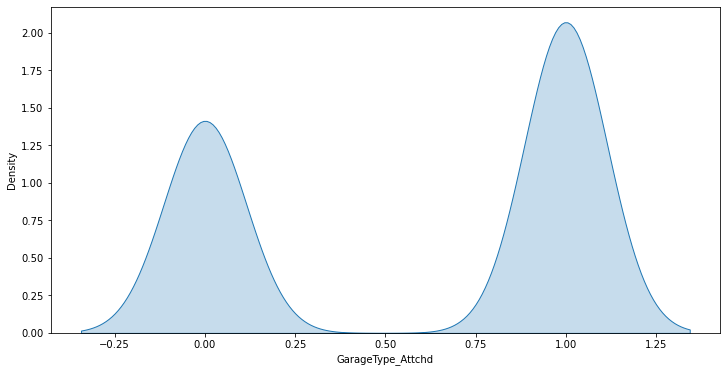

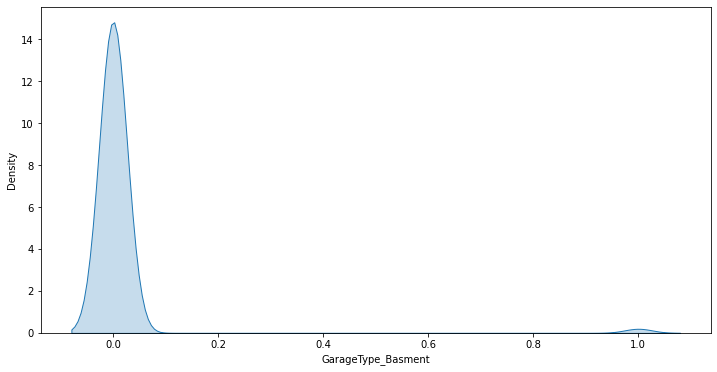

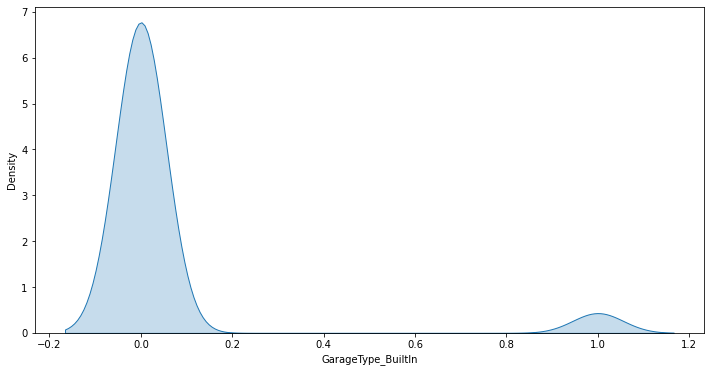

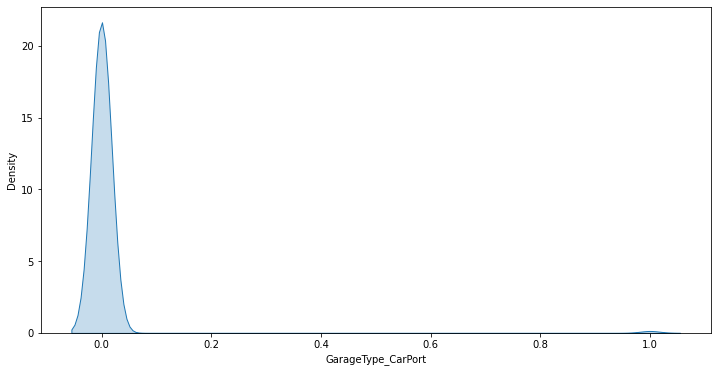

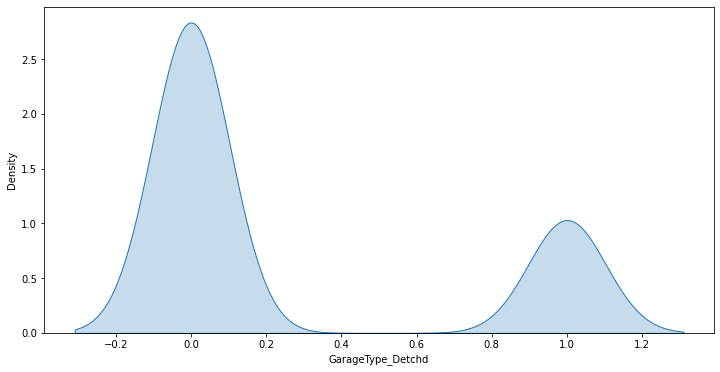

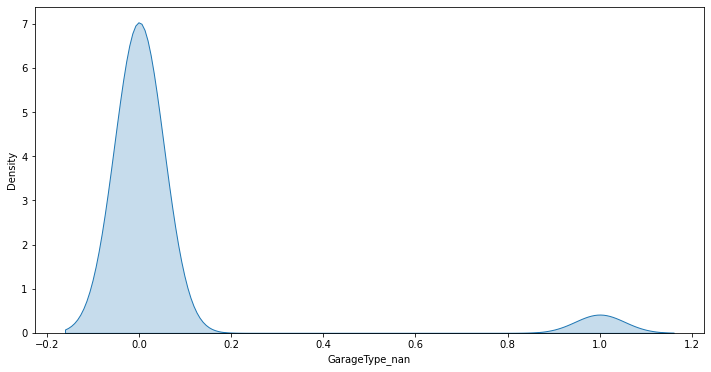

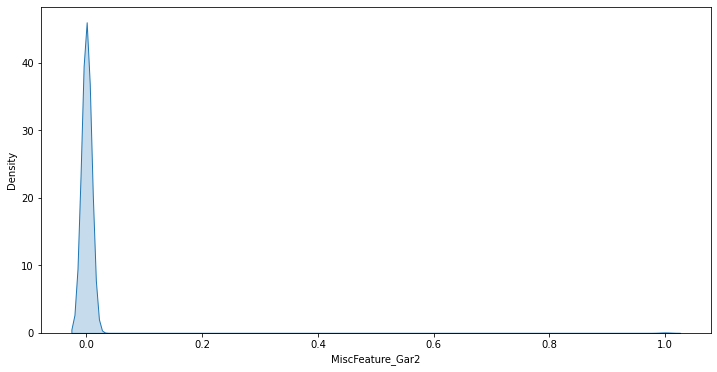

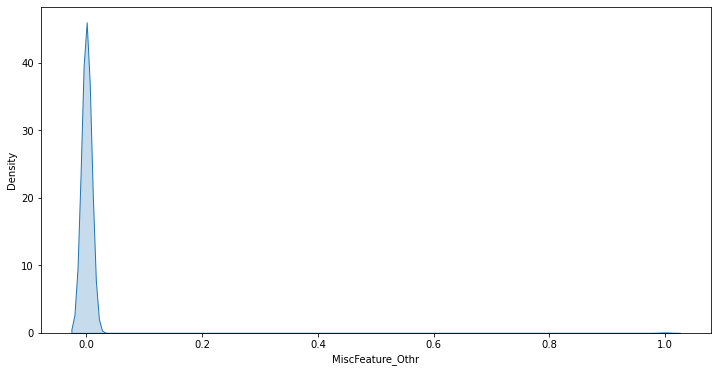

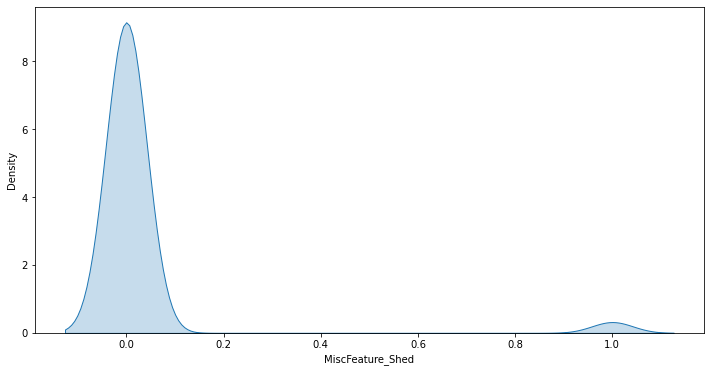

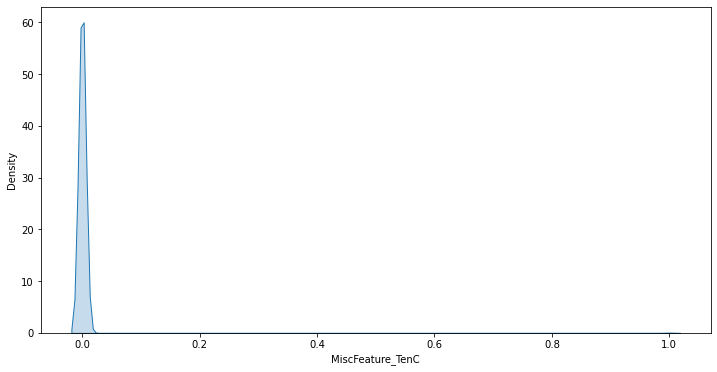

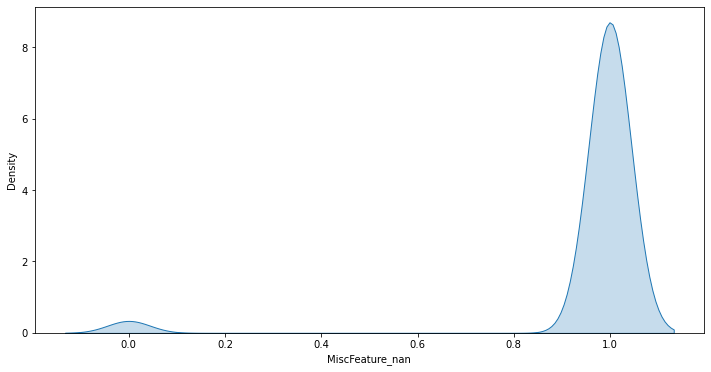

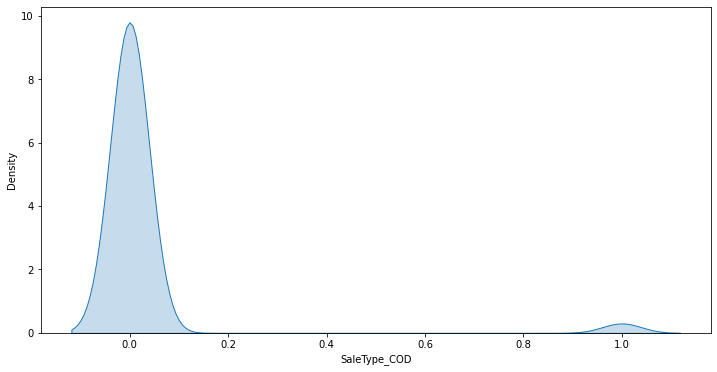

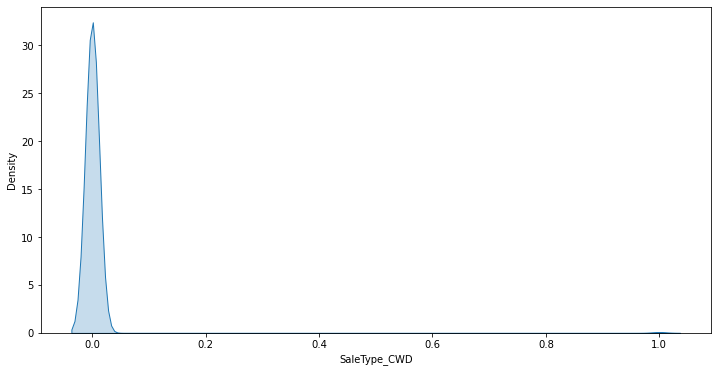

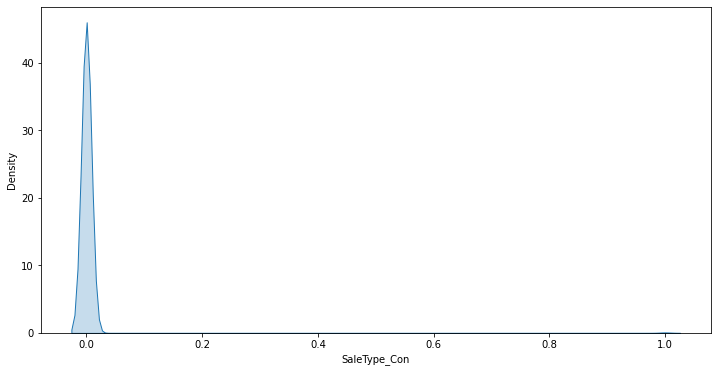

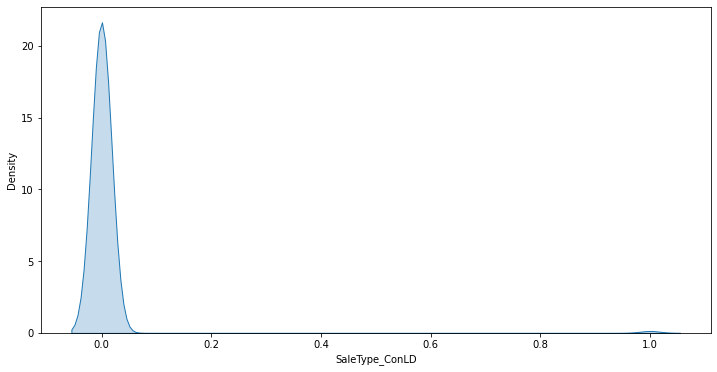

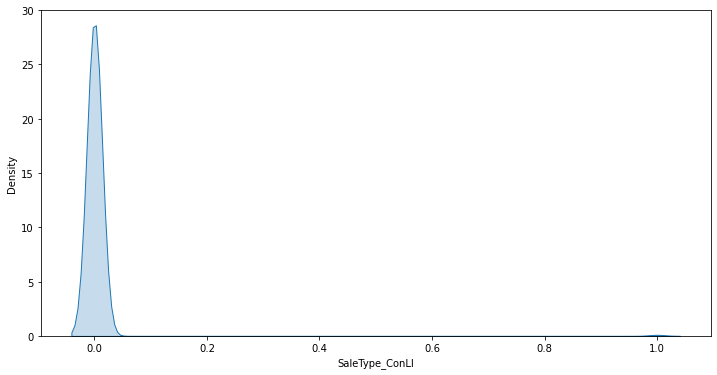

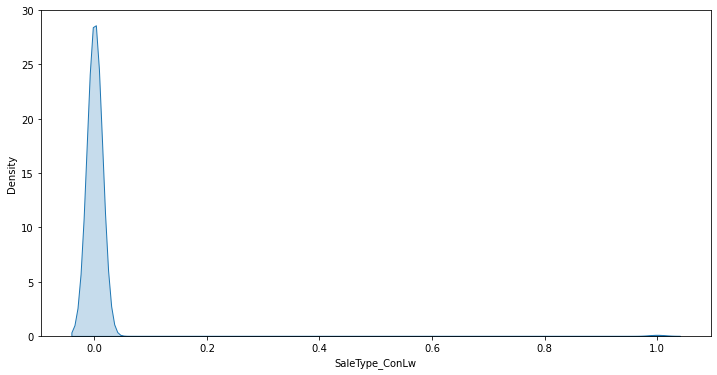

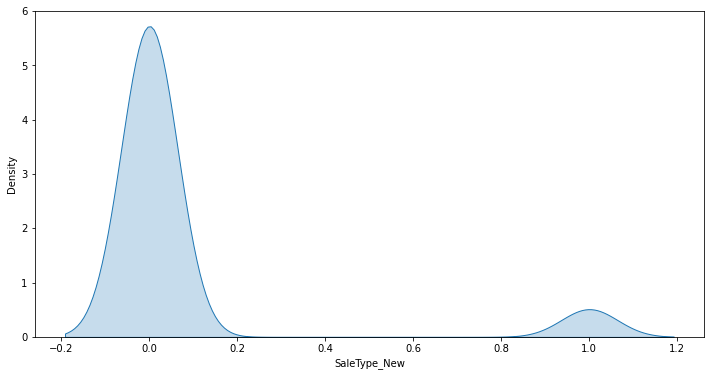

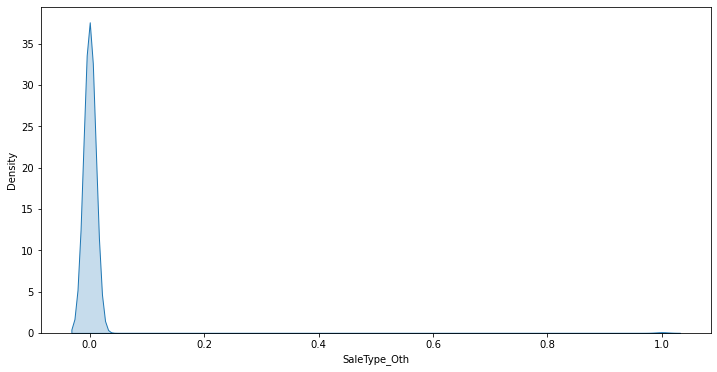

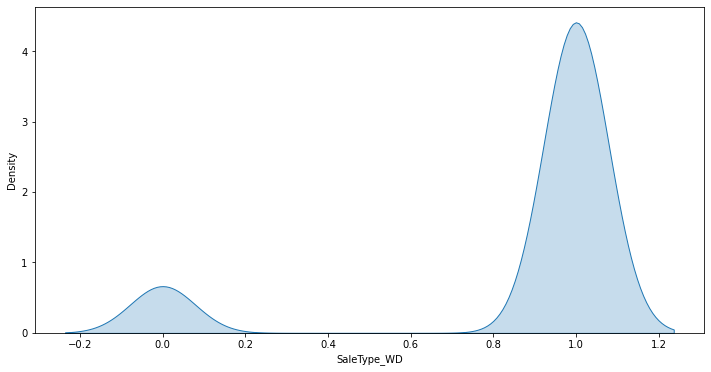

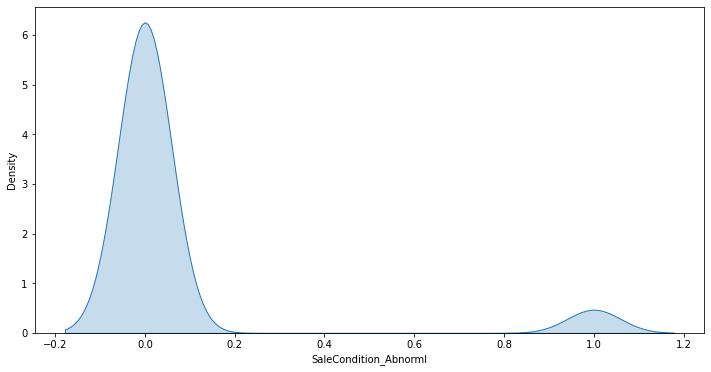

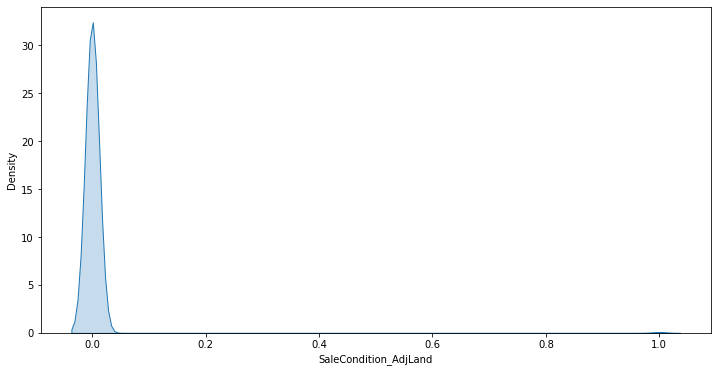

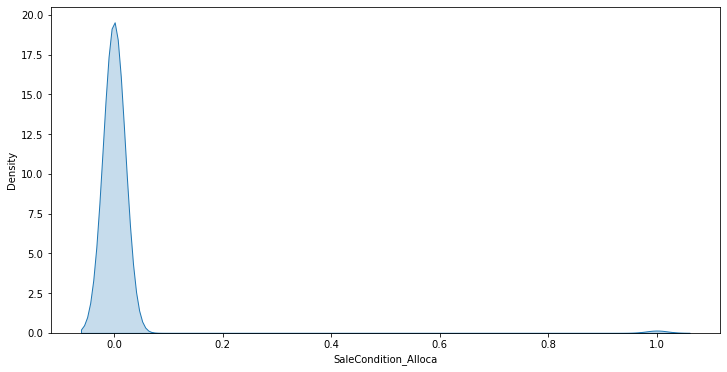

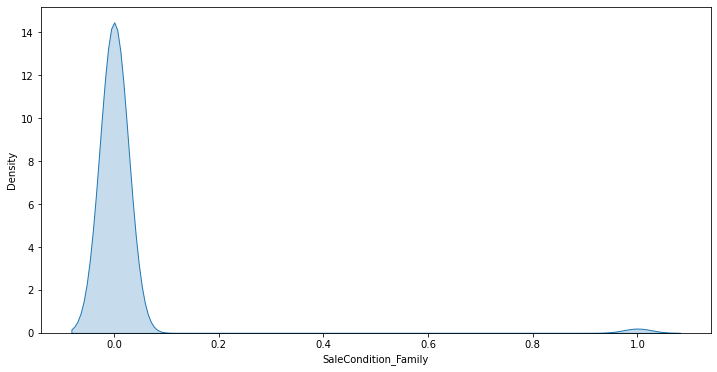

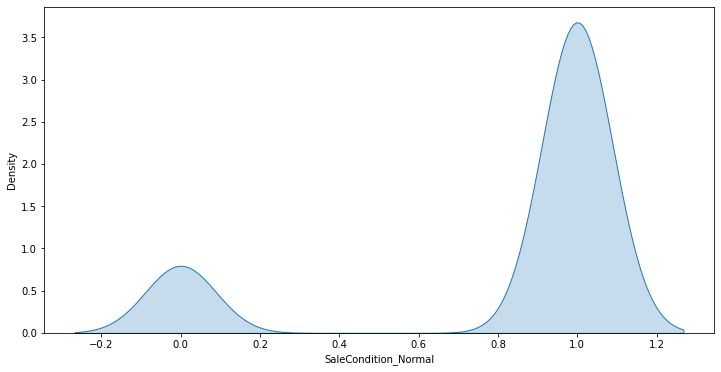

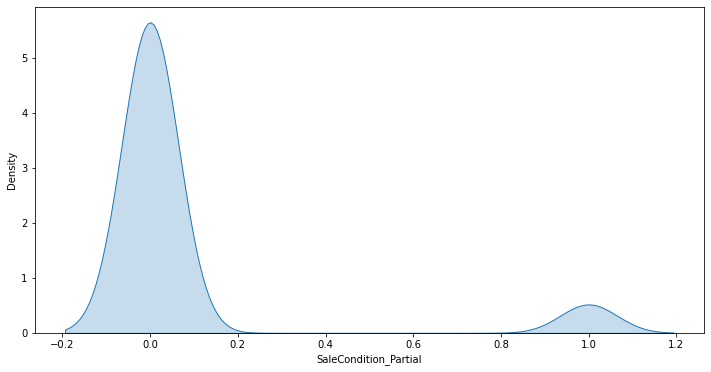

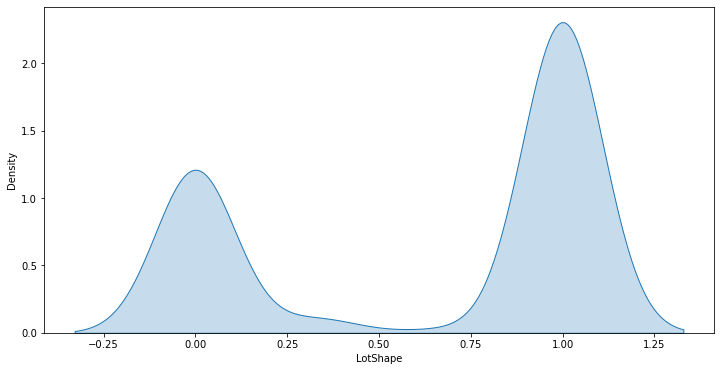

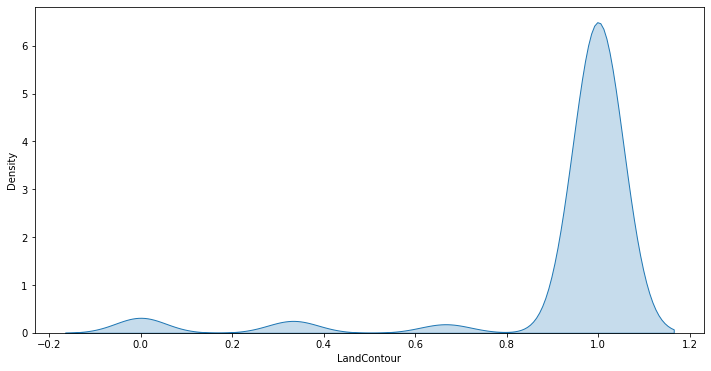

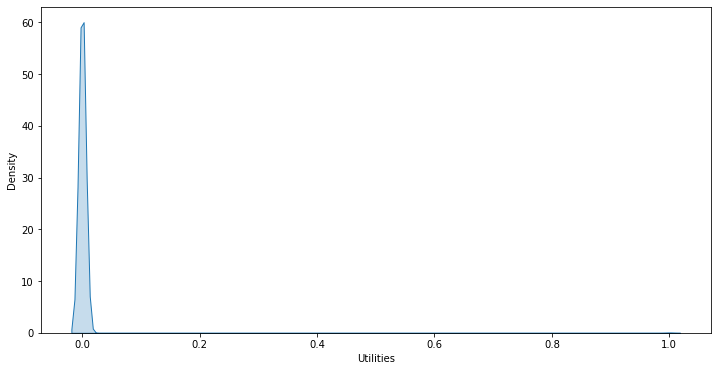

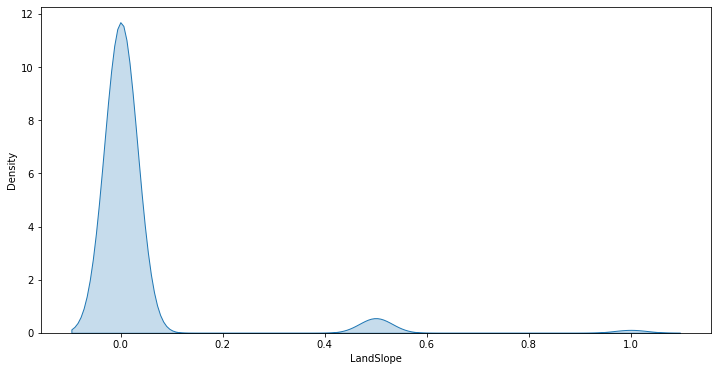

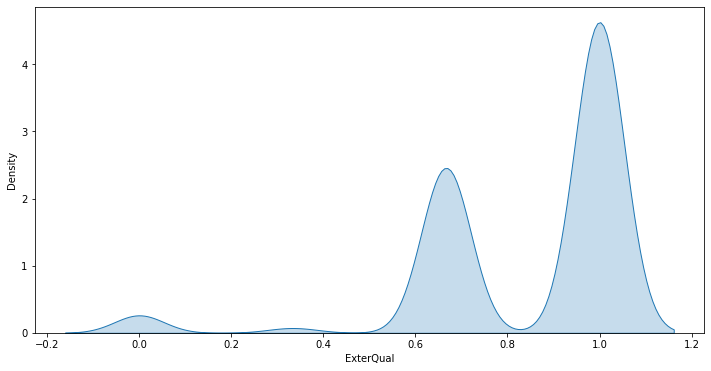

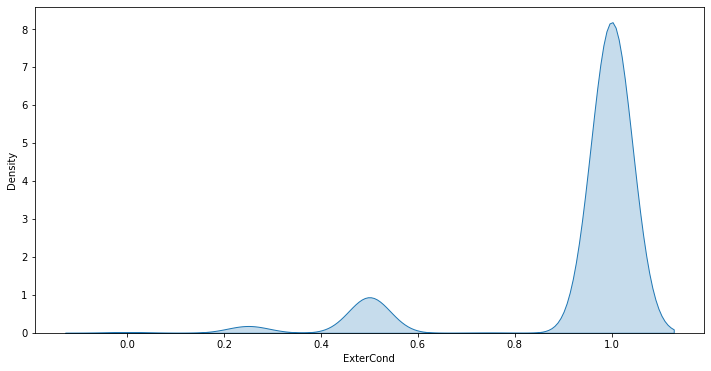

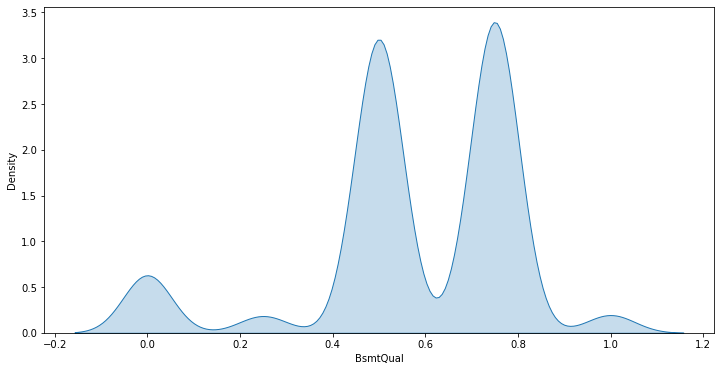

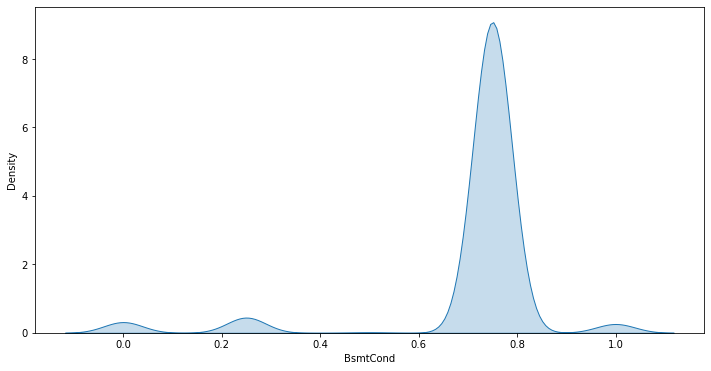

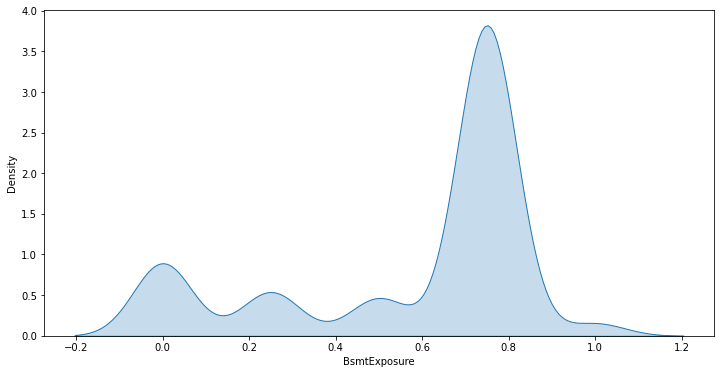

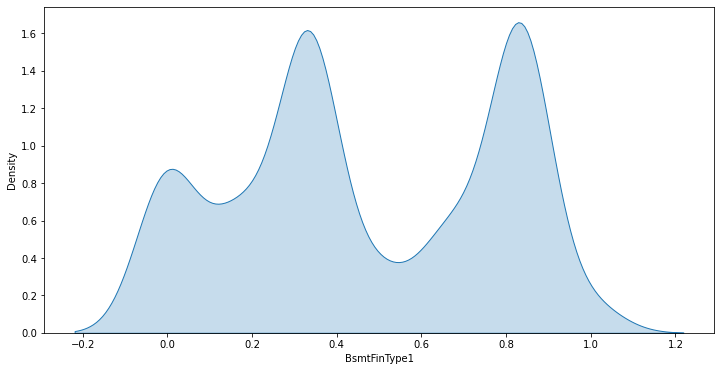

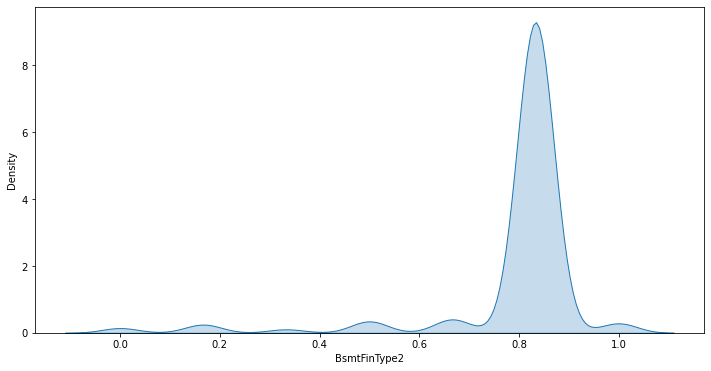

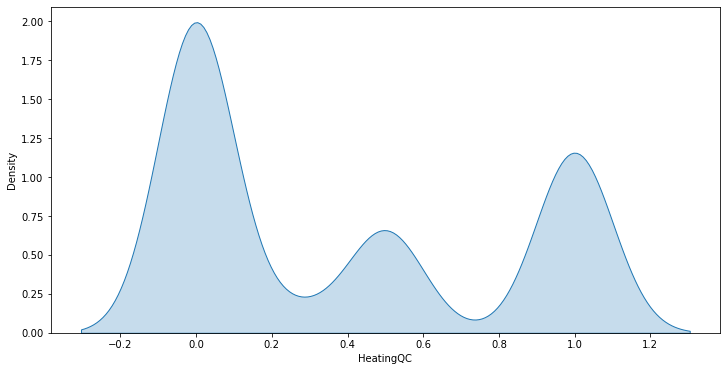

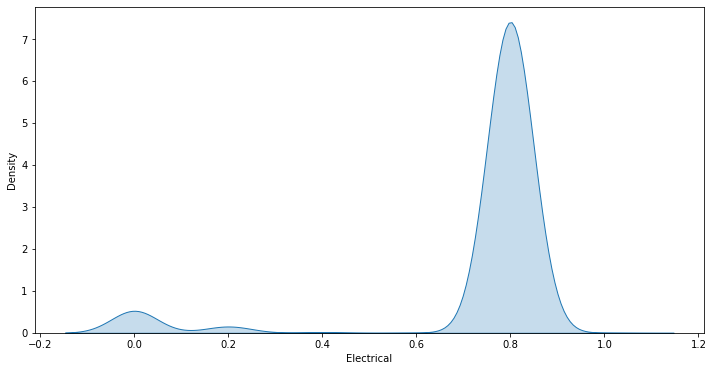

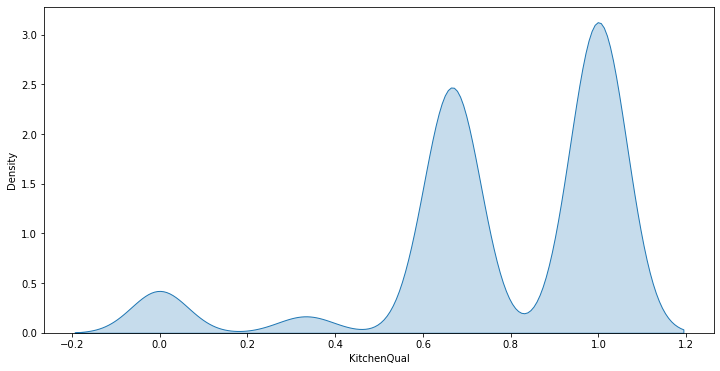

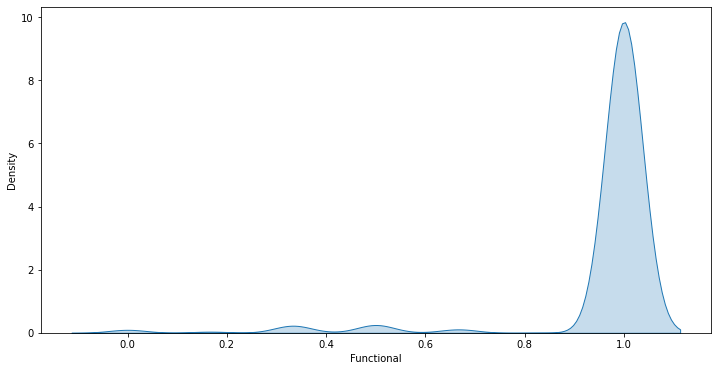

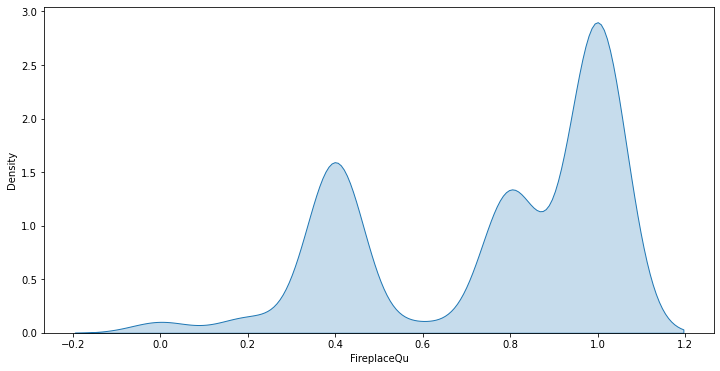

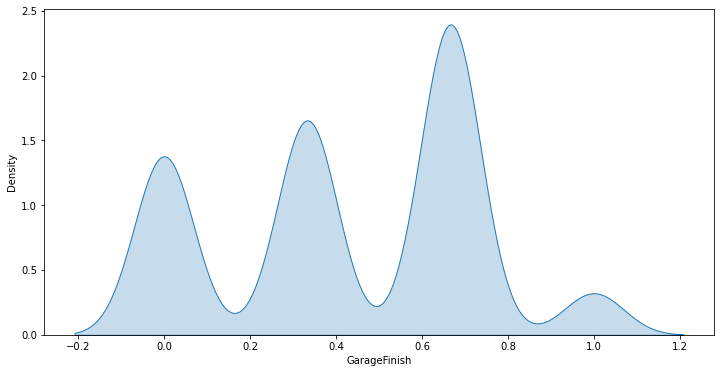

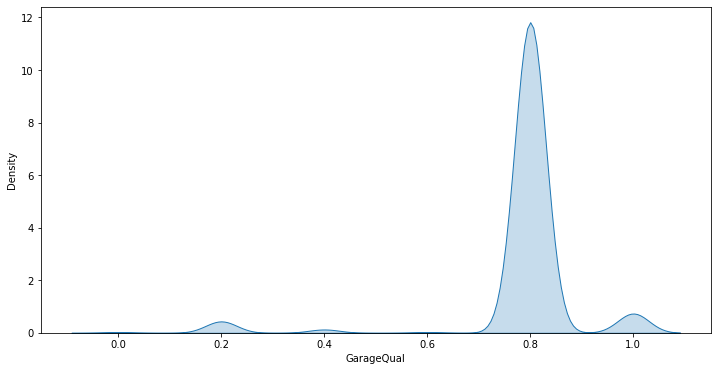

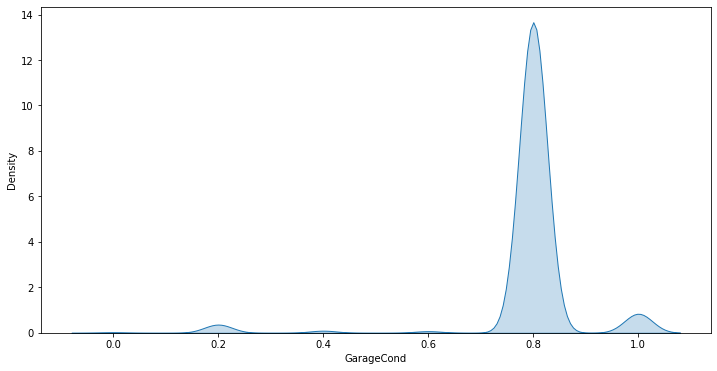

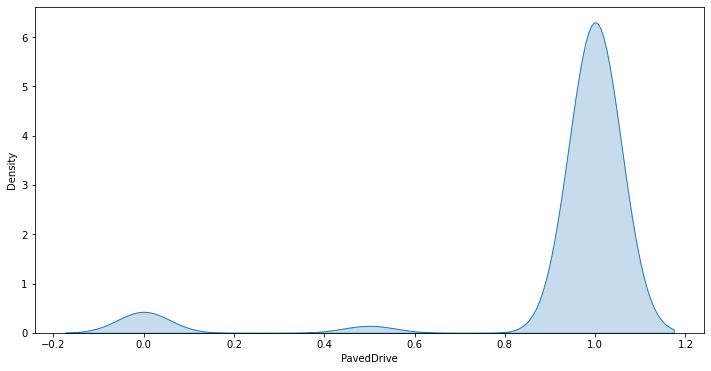

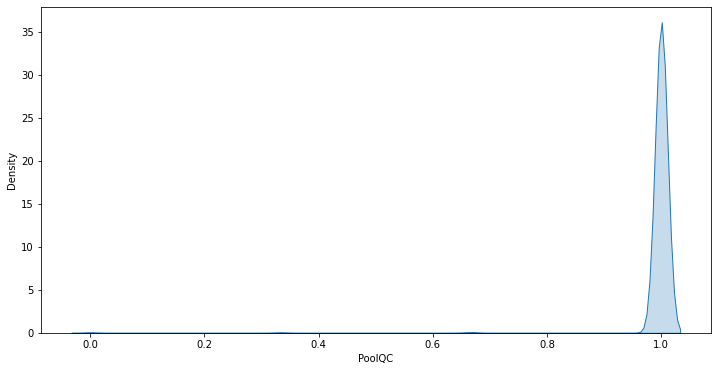

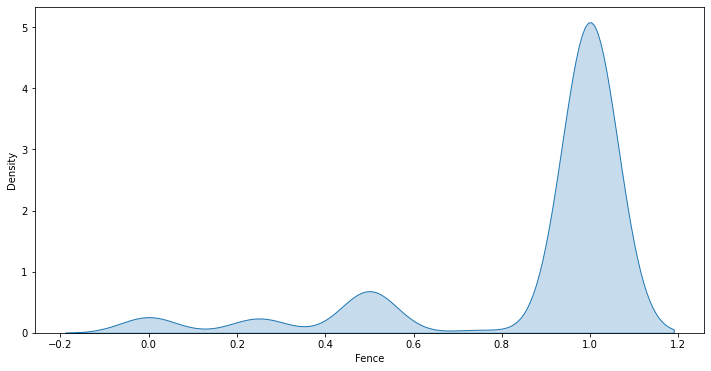

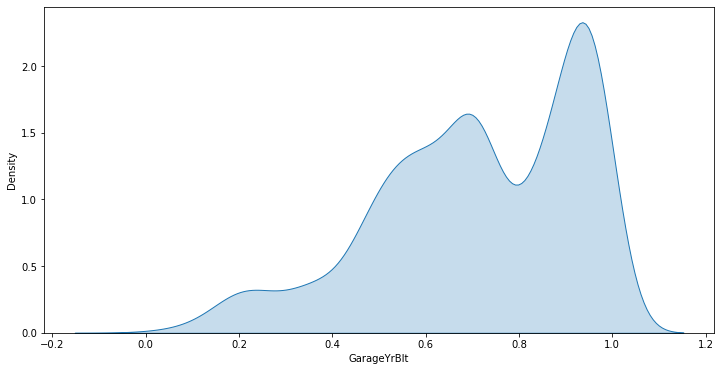

In [55]:
kolomdata=list(df_finalcleaning.columns)
n = len(kolomdata)
for i in kolomdata :
    plt.subplots(figsize=(12,6))
    sns.kdeplot(data=df_finalcleaning, x=i, shade=True)
    plt.show()

In [1]:
for i in range (1,9):
    print(i)

1
2
3
4
5
6
7
8


In [ ]:
kolomdata=list(df_finalcleaning.columns)
n = len(kolomdata)
plt.figure(figsize = (15, 30))
for i in range (0,n) :
    plt.subplot(100, 3, i+1)
    sns.kdeplot(data=df_finalcleaning, x=kolomdata[i], shade=True)
    plt.xticks(rotation = 45)

In [49]:
print(n)

232


# Modelling
X adalah df_bestfeatures dan Y adalah Yceper

In [47]:
Xmodel=df_bestfeatures.drop('SalePrice(100000)',axis=1)
Ymodel=pd.DataFrame(data=Yceper, columns=['SalePrice(100000)'])

In [48]:
Xmodel

OverallQual  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  GarageCars  \
0        0.666667     0.140098  0.119780   0.259231  0.666667        0.50   
1        0.555556     0.206547  0.212942   0.174830  0.666667        0.50   
2        0.666667     0.150573  0.134465   0.273549  0.666667        0.50   
3        0.666667     0.123732  0.143873   0.260550  0.333333        0.75   
4        0.777778     0.187398  0.186095   0.351168  0.666667        0.75   
...           ...          ...       ...        ...       ...         ...   
1447     0.555556     0.155974  0.142038   0.247362  0.666667        0.50   
1448     0.555556     0.252373  0.399036   0.327619  0.666667        0.50   
1449     0.666667     0.188543  0.195961   0.377920  0.666667        0.25   
1450     0.444444     0.176432  0.170721   0.140166  0.333333        0.25   
1451     0.444444     0.205565  0.211565   0.173700  0.333333        0.25   

      GarageArea  ExterQual  BsmtQual  KitchenQual  
0       0.386460   0.666667      0.50     0.666667  
1       0.324401   1.000000      0.50     1.000000  
2       0.428773   0.666667      0.50     0.666667  
3       0.452750   1.000000      0.75     0.666667  
4       0.589563   0.666667      0.50     0.666667  
...          ...        ...       ...          ...  
1447    0.324401   1.000000      0.50     1.000000  
1448    0.352609   1.000000      0.50     1.000000  
1449    0.177715   0.000000      0.75     0.666667  
1450    0.169252   1.000000      0.75     0.666667  
1451    0.194640   0.666667      0.75     1.000000  

[1452 rows x 10 columns]

In [49]:
Ymodel

SalePrice(100000)
0               2.08500
1               1.81500
2               2.23500
3               1.40000
4               2.50000
...                 ...
1447            1.75000
1448            2.10000
1449            2.66500
1450            1.42125
1451            1.47500

[1452 rows x 1 columns]

Split dataset menjadi data train dan data test dengan komposisi pembagian yang sering digunakan

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xmodel.values, Ymodel.values, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1161, 10), (291, 10), (1161, 1), (291, 1))

Import terlebih dahulu package yang akan digunakan untuk modelling

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

0.09601421122089472
0.8085562365717196


In [54]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.92093893 1.96      ]
 [1.63664027 1.35      ]
 [1.69199173 1.36905   ]
 [2.97194372 1.47      ]
 [1.68912514 1.28      ]
 [2.64926967 2.615     ]
 [2.75401588 2.68      ]
 [1.0596135  1.27      ]
 [1.01892076 0.935     ]
 [1.18403101 0.913     ]
 [1.52247469 1.68      ]
 [1.22883868 1.43      ]
 [1.20938995 1.29      ]
 [1.434551   1.48      ]
 [1.69394227 1.76      ]
 [2.14754247 2.5       ]
 [1.30328781 1.16      ]
 [1.20151649 1.28      ]
 [2.15600607 2.05      ]
 [1.80546176 2.2       ]
 [2.14960804 2.249     ]
 [2.43770337 2.39      ]
 [2.38029594 2.6       ]
 [1.50583314 1.749     ]
 [2.38331378 2.42      ]
 [2.19706703 2.37      ]
 [1.9282904  1.65      ]
 [1.01246142 0.95      ]
 [1.28084944 1.2       ]
 [3.28790892 2.66      ]
 [1.49492799 1.595     ]
 [1.83016177 1.87      ]
 [3.78305849 5.56581   ]
 [1.63016305 1.249     ]
 [0.88461943 1.3575    ]
 [2.10583934 2.07      ]
 [1.08939126 0.88      ]
 [3.66521656 3.785     ]
 [1.72446804 1.55      ]
 [1.72719562 1.81      ]


Membuat model dalam format .pkl dengan library joblib

In [56]:
import joblib
joblib.dump(lr,'model_lr_final.pkl')

['model_lr_final.pkl']